In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from google.colab import files
import matplotlib.pyplot as plt


In [ ]:
!python --version

Python 3.7.12


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# no2 = pd.read_csv("/content/drive/My Drive/COVID19_Cities/Data/no2_buffer_2015_2019/no_buff_0.csv")
# for i in range(1,31): 
#   no2 = no2.append(pd.read_csv("/content/drive/My Drive/COVID19_Cities/Data/no2_buffer_2015_2019/no_buff_"+str(i)+".csv"), ignore_index=True)
# no2['fips'] = no2['fips'].astype(int).astype(str).apply(lambda x: x.zfill(5)[0:5])
# groupedno2 = no2
# groupedno2['no2'] = groupedno2['no']

# ozone = pd.read_csv("/content/drive/My Drive/COVID19_Cities/Data/ozone_buffer_2015_2019/ozone_buff_0.csv")
# for i in range(1,31): 
#   ozone = ozone.append(pd.read_csv("/content/drive/My Drive/COVID19_Cities/Data/ozone_buffer_2015_2019/ozone_buff_"+str(i)+".csv"), ignore_index=True)
# ozone['fips'] = ozone['fips'].astype(int).astype(str).apply(lambda x: x.zfill(5)[0:5])
# groupedozone = ozone

# pm25 = pd.read_csv("/content/drive/My Drive/COVID19_Cities/Data/pm25_buffer_2015_2019/pm25_buff_0.csv")
# for i in range(1,3): 
#   pm25 = pm25.append(pd.read_csv("/content/drive/My Drive/COVID19_Cities/Data/pm25_buffer_2015_2019/pm25_buff_"+str(i)+".csv"), ignore_index=True)
# pm25['fips'] = pm25['fips'].astype(int).astype(str).apply(lambda x: x.zfill(5)[0:5])
# groupedpm25 = pm25

# so2 = pd.read_csv("/content/drive/My Drive/COVID19_Cities/Data/so2_buffer_2015_2019/so2_buff_0.csv")
# for i in range(1,3): 
#   so2 = so2.append(pd.read_csv("/content/drive/My Drive/COVID19_Cities/Data/so2_buffer_2015_2019/so2_buff_"+str(i)+".csv"), ignore_index=True)
# so2['fips'] = so2['fips'].astype(int).astype(str).apply(lambda x: x.zfill(5)[0:5])
# groupedso2 = so2

pol_data = pd.read_csv("/content/drive/My Drive/COVID19_Cities/Data/pollutant_data.csv")
pol_data['fips'] = pol_data['FIPS']
pol_data = pol_data[['fips', 'ozone', 'pm25', 'no2', 'so2']]
pol_data['fips'] = pol_data['fips'].astype(int).astype(str).apply(lambda x: x.zfill(5)[0:5])
pol_data

# Hopkins Population Center (HPC) 2018 https://github.com/QFL2020/COVID_DataHub
eth = pd.read_csv("/content/drive/My Drive/COVID19_Cities/Data/Prepandemic_v2.csv", encoding = "ISO-8859-1")
ethj = eth[['fips', 'popdensity_2018', 'tot_2018', 'male_2018', 'hispanic_2018', 'nhwhite_2018', 'nhblack_2018', 'nhindian_2018', 'nhasian_2018', 'povprop']]
ethj['ageab55'] = eth['ageg12_2018'] + eth['ageg13_2018'] + eth['ageg14_2018'] + eth['ageg15_2018'] + eth['ageg16_2018'] + eth['ageg17_2018'] + eth['ageg18_2018']
ethj['ageab65'] = eth['ageg14_2018'] + eth['ageg15_2018'] + eth['ageg16_2018'] + eth['ageg17_2018'] + eth['ageg18_2018']
ethj['fips'] = ethj['fips'].astype(int).astype(str).apply(lambda x: x.zfill(5)[0:5])
ethj = ethj.rename(columns = {'popdensity_2018' : 'popdense', 'tot_2018' : 'population'})

edu = pd.read_excel('/content/drive/MyDrive/07252021_Entrie_USA_Covid_Study_Chaya/Raw_Data/Education.xlsx')
edu['fips'] = edu['fips'].astype(int).astype(str).apply(lambda x: x.zfill(5)[0:5])
edu = edu[['fips', 'Percent of adults with less than a high school diploma, 2015-19', 'Percent of adults with a high school diploma only, 2015-19', "Percent of adults completing some college or associate's degree, 2015-19", "Percent of adults with a bachelor's degree or higher, 2015-19"]]
edu.rename(columns={"Percent of adults with less than a high school diploma, 2015-19" : 'AR',
                    "Percent of adults with a high school diploma only, 2015-19" : 'AS',
                    "Percent of adults completing some college or associate's degree, 2015-19" : 'AT',
                    "Percent of adults with a bachelor's degree or higher, 2015-19" : 'AU'}, inplace = True)
edu['pct_highschool_or_less'] = edu['AR'] + edu['AS']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
covid = pd.read_csv('/content/drive/My Drive/COVID19_Cities/Data/us-counties.csv')
covid = covid[covid['date'] == '2020-06-30']
covid = covid.drop(['date', 'county', 'state'], axis = 1)
covid = covid.dropna()
covid['fips'] = covid['fips'].astype(int).astype(str).apply(lambda x: x.zfill(5)[0:5])
covid['fips'].nunique()

data = covid.merge(ethj, on='fips')
data = data.merge(edu, on='fips').drop_duplicates().reset_index(drop=True)
data['cases rate 10k'] = data['cases'] / data['population'] * 10000
data['deaths rate 10k'] = data['deaths'] / data['population'] * 10000
data['deaths cases 10k'] = data['deaths'] / data['cases'] * 10000
data['ageab55'] = data['ageab55'] * 100
data['pctpov'] = data['povprop'] * 100
data['pctmale'] = data['male_2018'] * 100
data['pctwhite'] = data['nhwhite_2018'] * 100
data['pctblack'] = data['nhblack_2018'] * 100
data['pctindian'] = data['nhindian_2018'] * 100
data['pctasian'] = data['nhasian_2018'] * 100
data['pcthispanic'] = data['hispanic_2018'] * 100
data = data.drop(['povprop','male_2018','nhwhite_2018','nhblack_2018','nhindian_2018','nhasian_2018','hispanic_2018'], axis=1)
data = data.sort_values('cases rate 10k', ascending=False)[data['population'] > 100000]
epifips = data.iloc[0:200]['fips'].tolist()
data['type'] = data['fips'].apply(lambda x: 0 if x in epifips else 1)
cdata = data

cdata = cdata.merge(pol_data, on='fips').drop_duplicates().reset_index(drop=True)

wave1_data = cdata
wave1_data.to_csv('wave1_data.csv')

wave1_data['type'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


0    64
1    54
Name: type, dtype: int64

In [ ]:
covid1 = pd.read_csv('/content/drive/My Drive/COVID19_Cities/Data/us-counties.csv')
covid1 = covid1[covid1['date'] == '2020-12-31']
covid1 = covid1.drop(['date', 'county', 'state'], axis = 1)
covid1 = covid1.dropna()
covid1['fips'] = covid1['fips'].astype(int).astype(str).apply(lambda x: x.zfill(5)[0:5])

covid2 = pd.read_csv('/content/drive/My Drive/COVID19_Cities/Data/us-counties.csv')
covid2 = covid2[covid2['date'] == '2020-06-30']
covid2 = covid2.drop(['date', 'county', 'state'], axis = 1)
covid2 = covid2.dropna()
covid2['fips'] = covid2['fips'].astype(int).astype(str).apply(lambda x: x.zfill(5)[0:5])

covid = covid1.merge(covid2, on="fips")
covid['cases'] = covid['cases_x'] - covid['cases_y']
covid['deaths'] = covid['deaths_x'] - covid['deaths_y']
covid = covid.drop(['cases_x', 'cases_y', 'deaths_x', 'deaths_y'], axis = 1)
covid = covid.dropna()
covid['fips'].nunique()

data = covid.merge(ethj, on='fips')
data = data.merge(edu, on='fips').drop_duplicates().reset_index(drop=True)
data['cases rate 10k'] = data['cases'] / data['population'] * 10000
data['deaths rate 10k'] = data['deaths'] / data['population'] * 10000
data['deaths cases 10k'] = data['deaths'] / data['cases'] * 10000
data['ageab55'] = data['ageab55'] * 100
data['pctpov'] = data['povprop'] * 100
data['pctmale'] = data['male_2018'] * 100
data['pctwhite'] = data['nhwhite_2018'] * 100
data['pctblack'] = data['nhblack_2018'] * 100
data['pctindian'] = data['nhindian_2018'] * 100
data['pctasian'] = data['nhasian_2018'] * 100
data['pcthispanic'] = data['hispanic_2018'] * 100
data = data.drop(['povprop','male_2018','nhwhite_2018','nhblack_2018','nhindian_2018','nhasian_2018','hispanic_2018'], axis=1)
data = data.sort_values('cases rate 10k', ascending=False)[data['population'] > 100000]
epifips = data.iloc[0:200]['fips'].tolist()
data['type'] = data['fips'].apply(lambda x: 0 if x in epifips else 1)
cdata = data

cdata = cdata.merge(pol_data, on='fips').drop_duplicates().reset_index(drop=True)

wave2_data = cdata
wave2_data.to_csv('wave2_data.csv')

wave2_data['type'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


1    76
0    42
Name: type, dtype: int64

In [ ]:
covid = pd.read_csv('/content/drive/My Drive/COVID19_Cities/Data/us-counties.csv')
covid = covid[covid['date'] == '2020-12-31']
covid = covid.drop(['date', 'county', 'state'], axis = 1)
covid = covid.dropna()
covid['fips'] = covid['fips'].astype(int).astype(str).apply(lambda x: x.zfill(5)[0:5])

data = covid.merge(ethj, on='fips')
data = data.merge(edu, on='fips').drop_duplicates().reset_index(drop=True)
data['cases rate 10k'] = data['cases'] / data['population'] * 10000
data['deaths rate 10k'] = data['deaths'] / data['population'] * 10000
data['deaths cases 10k'] = data['deaths'] / data['cases'] * 10000
data['ageab55'] = data['ageab55'] * 100
data['pctpov'] = data['povprop'] * 100
data['pctmale'] = data['male_2018'] * 100
data['pctwhite'] = data['nhwhite_2018'] * 100
data['pctblack'] = data['nhblack_2018'] * 100
data['pctindian'] = data['nhindian_2018'] * 100
data['pctasian'] = data['nhasian_2018'] * 100
data['pcthispanic'] = data['hispanic_2018'] * 100
data = data.drop(['povprop','male_2018','nhwhite_2018','nhblack_2018','nhindian_2018','nhasian_2018','hispanic_2018'], axis=1)
data = data.sort_values('cases rate 10k', ascending=False)[data['population'] > 100000]
epifips = data.iloc[0:200]['fips'].tolist()
data['type'] = data['fips'].apply(lambda x: 0 if x in epifips else 1)
cdata = data

cdata = cdata.merge(pol_data, on='fips').drop_duplicates().reset_index(drop=True)

whole_data = cdata
whole_data.to_csv('whole_data.csv')

whole_data['type'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


1    73
0    45
Name: type, dtype: int64

### Response Variable Plots

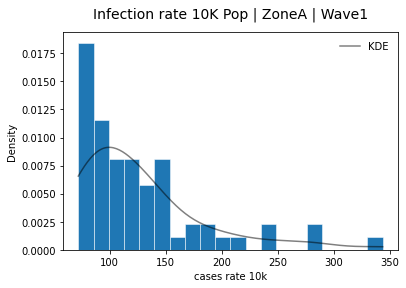

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns    

# Plot seaborn histogram overlaid with KDE
ax = sns.histplot(data=wave1_data[wave1_data['type'] == 0]['cases rate 10k'], bins=20, stat='density', alpha= 1, kde=True,
                  edgecolor='white', linewidth=0.5,
                  line_kws=dict(color='black', alpha=0.5, linewidth=1.5, label='KDE'))
ax.get_lines()[0].set_color('black') # edit line color due to bug in sns v 0.11.0

# Edit legemd and add title
ax.legend(frameon=False)
ax.set_title('Infection rate 10K Pop | ZoneA | Wave1', fontsize=14, pad=15)

plt.show()


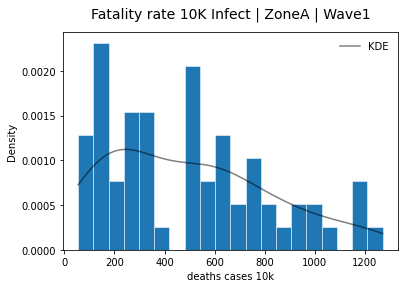

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns    

# Plot seaborn histogram overlaid with KDE
ax = sns.histplot(data=wave1_data[wave1_data['type'] == 0]['deaths cases 10k'], bins=20, stat='density', alpha= 1, kde=True,
                  edgecolor='white', linewidth=0.5,
                  line_kws=dict(color='black', alpha=0.5, linewidth=1.5, label='KDE'))
ax.get_lines()[0].set_color('black') # edit line color due to bug in sns v 0.11.0

# Edit legemd and add title
ax.legend(frameon=False)
ax.set_title('Fatality rate 10K Infect | ZoneA | Wave1', fontsize=14, pad=15)

plt.show()


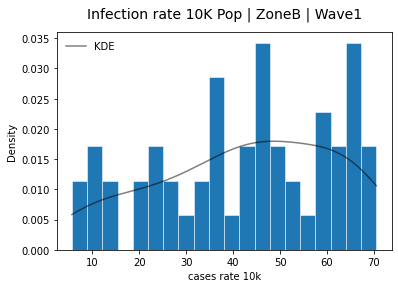

In [ ]:
# Plot seaborn histogram overlaid with KDE
ax = sns.histplot(data=wave1_data[wave1_data['type'] == 1]['cases rate 10k'], bins=20, stat='density', alpha= 1, kde=True,
                  edgecolor='white', linewidth=0.5,
                  line_kws=dict(color='black', alpha=0.5, linewidth=1.5, label='KDE'))
ax.get_lines()[0].set_color('black') # edit line color due to bug in sns v 0.11.0

# Edit legemd and add title
ax.legend(frameon=False)
ax.set_title('Infection rate 10K Pop | ZoneB | Wave1', fontsize=14, pad=15)

plt.show()

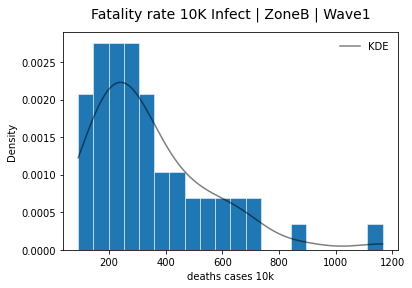

In [ ]:
# Plot seaborn histogram overlaid with KDE
ax = sns.histplot(data=wave1_data[wave1_data['type'] == 1]['deaths cases 10k'], bins=20, stat='density', alpha= 1, kde=True,
                  edgecolor='white', linewidth=0.5,
                  line_kws=dict(color='black', alpha=0.5, linewidth=1.5, label='KDE'))
ax.get_lines()[0].set_color('black') # edit line color due to bug in sns v 0.11.0

# Edit legemd and add title
ax.legend(frameon=False)
ax.set_title('Fatality rate 10K Infect | ZoneB | Wave1', fontsize=14, pad=15)

plt.show()


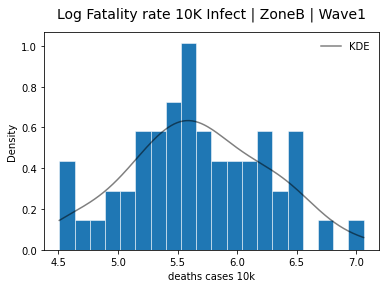

In [ ]:
# Plot seaborn histogram overlaid with KDE
ax = sns.histplot(data=np.log(wave1_data[wave1_data['type'] == 1]['deaths cases 10k']), bins=20, stat='density', alpha= 1, kde=True,
                  edgecolor='white', linewidth=0.5,
                  line_kws=dict(color='black', alpha=0.5, linewidth=1.5, label='KDE'))
ax.get_lines()[0].set_color('black') # edit line color due to bug in sns v 0.11.0

# Edit legemd and add title
ax.legend(frameon=False)
ax.set_title('Log Fatality rate 10K Infect | ZoneB | Wave1', fontsize=14, pad=15)

plt.show()


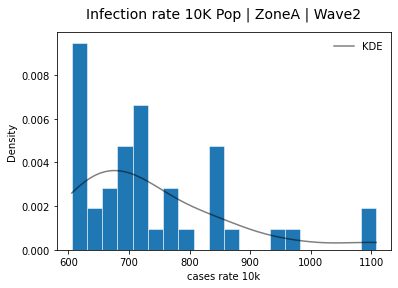

In [ ]:
# Plot seaborn histogram overlaid with KDE
ax = sns.histplot(data=wave2_data[wave2_data['type'] == 0]['cases rate 10k'], bins=20, stat='density', alpha= 1, kde=True,
                  edgecolor='white', linewidth=0.5,
                  line_kws=dict(color='black', alpha=0.5, linewidth=1.5, label='KDE'))
ax.get_lines()[0].set_color('black') # edit line color due to bug in sns v 0.11.0

# Edit legemd and add title
ax.legend(frameon=False)
ax.set_title('Infection rate 10K Pop | ZoneA | Wave2', fontsize=14, pad=15)

plt.show()

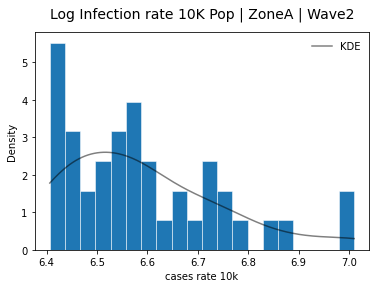

In [ ]:
# Plot seaborn histogram overlaid with KDE
ax = sns.histplot(data=np.log(wave2_data[wave2_data['type'] == 0]['cases rate 10k']), bins=20, stat='density', alpha= 1, kde=True,
                  edgecolor='white', linewidth=0.5,
                  line_kws=dict(color='black', alpha=0.5, linewidth=1.5, label='KDE'))
ax.get_lines()[0].set_color('black') # edit line color due to bug in sns v 0.11.0

# Edit legemd and add title
ax.legend(frameon=False)
ax.set_title('Log Infection rate 10K Pop | ZoneA | Wave2', fontsize=14, pad=15)

plt.show()

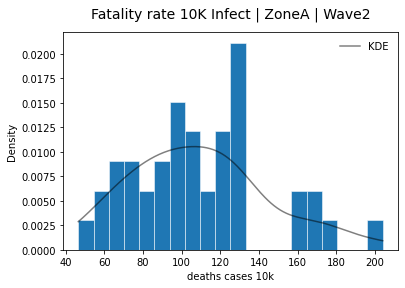

In [ ]:
# Plot seaborn histogram overlaid with KDE
ax = sns.histplot(data=wave2_data[wave2_data['type'] == 0]['deaths cases 10k'], bins=20, stat='density', alpha= 1, kde=True,
                  edgecolor='white', linewidth=0.5,
                  line_kws=dict(color='black', alpha=0.5, linewidth=1.5, label='KDE'))
ax.get_lines()[0].set_color('black') # edit line color due to bug in sns v 0.11.0

# Edit legemd and add title
ax.legend(frameon=False)
ax.set_title('Fatality rate 10K Infect | ZoneA | Wave2', fontsize=14, pad=15)

plt.show()

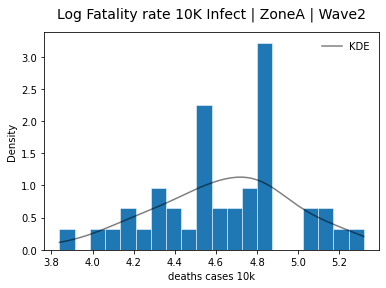

In [ ]:
# Plot seaborn histogram overlaid with KDE
ax = sns.histplot(data=np.log(wave2_data[wave2_data['type'] == 0]['deaths cases 10k']), bins=20, stat='density', alpha= 1, kde=True,
                  edgecolor='white', linewidth=0.5,
                  line_kws=dict(color='black', alpha=0.5, linewidth=1.5, label='KDE'))
ax.get_lines()[0].set_color('black') # edit line color due to bug in sns v 0.11.0

# Edit legemd and add title
ax.legend(frameon=False)
ax.set_title('Log Fatality rate 10K Infect | ZoneA | Wave2', fontsize=14, pad=15)

plt.show()

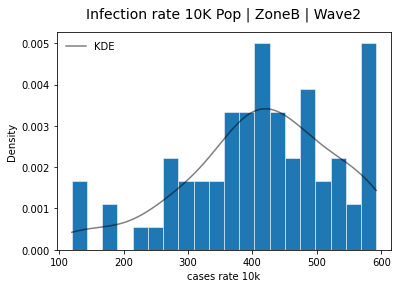

In [ ]:
# Plot seaborn histogram overlaid with KDE
ax = sns.histplot(data=wave2_data[wave2_data['type'] == 1]['cases rate 10k'], bins=20, stat='density', alpha= 1, kde=True,
                  edgecolor='white', linewidth=0.5,
                  line_kws=dict(color='black', alpha=0.5, linewidth=1.5, label='KDE'))
ax.get_lines()[0].set_color('black') # edit line color due to bug in sns v 0.11.0

# Edit legemd and add title
ax.legend(frameon=False)
ax.set_title('Infection rate 10K Pop | ZoneB | Wave2', fontsize=14, pad=15)

plt.show()

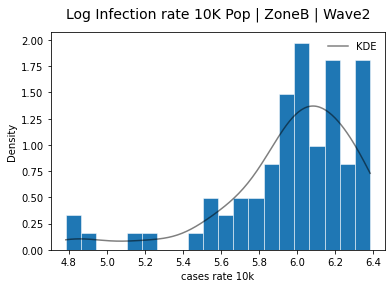

In [ ]:
# Plot seaborn histogram overlaid with KDE
ax = sns.histplot(data=np.log(wave2_data[wave2_data['type'] == 1]['cases rate 10k']), bins=20, stat='density', alpha= 1, kde=True,
                  edgecolor='white', linewidth=0.5,
                  line_kws=dict(color='black', alpha=0.5, linewidth=1.5, label='KDE'))
ax.get_lines()[0].set_color('black') # edit line color due to bug in sns v 0.11.0

# Edit legemd and add title
ax.legend(frameon=False)
ax.set_title('Log Infection rate 10K Pop | ZoneB | Wave2', fontsize=14, pad=15)

plt.show()

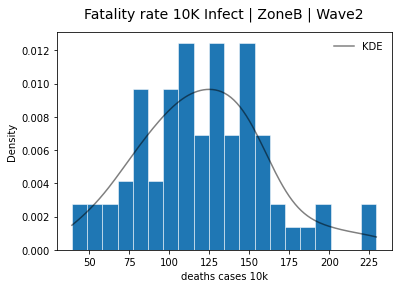

In [ ]:
# Plot seaborn histogram overlaid with KDE
ax = sns.histplot(data=wave2_data[wave2_data['type'] == 1]['deaths cases 10k'], bins=20, stat='density', alpha= 1, kde=True,
                  edgecolor='white', linewidth=0.5,
                  line_kws=dict(color='black', alpha=0.5, linewidth=1.5, label='KDE'))
ax.get_lines()[0].set_color('black') # edit line color due to bug in sns v 0.11.0

# Edit legemd and add title
ax.legend(frameon=False)
ax.set_title('Fatality rate 10K Infect | ZoneB | Wave2', fontsize=14, pad=15)

plt.show()


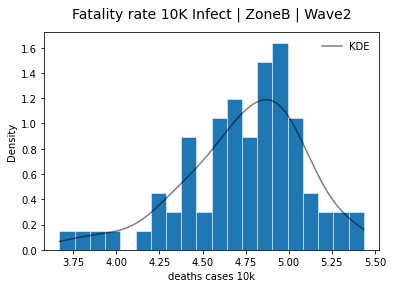

In [ ]:
# Plot seaborn histogram overlaid with KDE
ax = sns.histplot(data=np.log(wave2_data[wave2_data['type'] == 1]['deaths cases 10k']), bins=20, stat='density', alpha= 1, kde=True,
                  edgecolor='white', linewidth=0.5,
                  line_kws=dict(color='black', alpha=0.5, linewidth=1.5, label='KDE'))
ax.get_lines()[0].set_color('black') # edit line color due to bug in sns v 0.11.0

# Edit legemd and add title
ax.legend(frameon=False)
ax.set_title('Fatality rate 10K Infect | ZoneB | Wave2', fontsize=14, pad=15)

plt.show()


### Visualize

cases rate 10k Wave 1 Ttest_indResult(statistic=10.580063210692225, pvalue=1.0108380919663058e-18)
cases rate 10k Wave 1mean Zone A 127.6274531359137,mean Zone B 42.66053571916572
cases rate 10k Wave 1std Zone A 56.40781575968891,std Zone B 18.763363132241867
cases rate 10k Wave 2 Ttest_indResult(statistic=14.260064833048212, pvalue=2.8565177998822072e-27)
cases rate 10k Wave 2mean Zone A 738.7364060886093,mean Zone B 412.76959968771547
cases rate 10k Wave 2std Zone A 125.01645980217917,std Zone B 115.40214082234995
cases rate 10k All Year Ttest_indResult(statistic=12.648408134719514, pvalue=1.419086267754138e-23)
cases rate 10k All Yearmean Zone A 821.7300114037332,mean Zone B 491.6629321692244
cases rate 10k All Yearstd Zone A 152.49305287236294,std Zone B 127.79722695324664


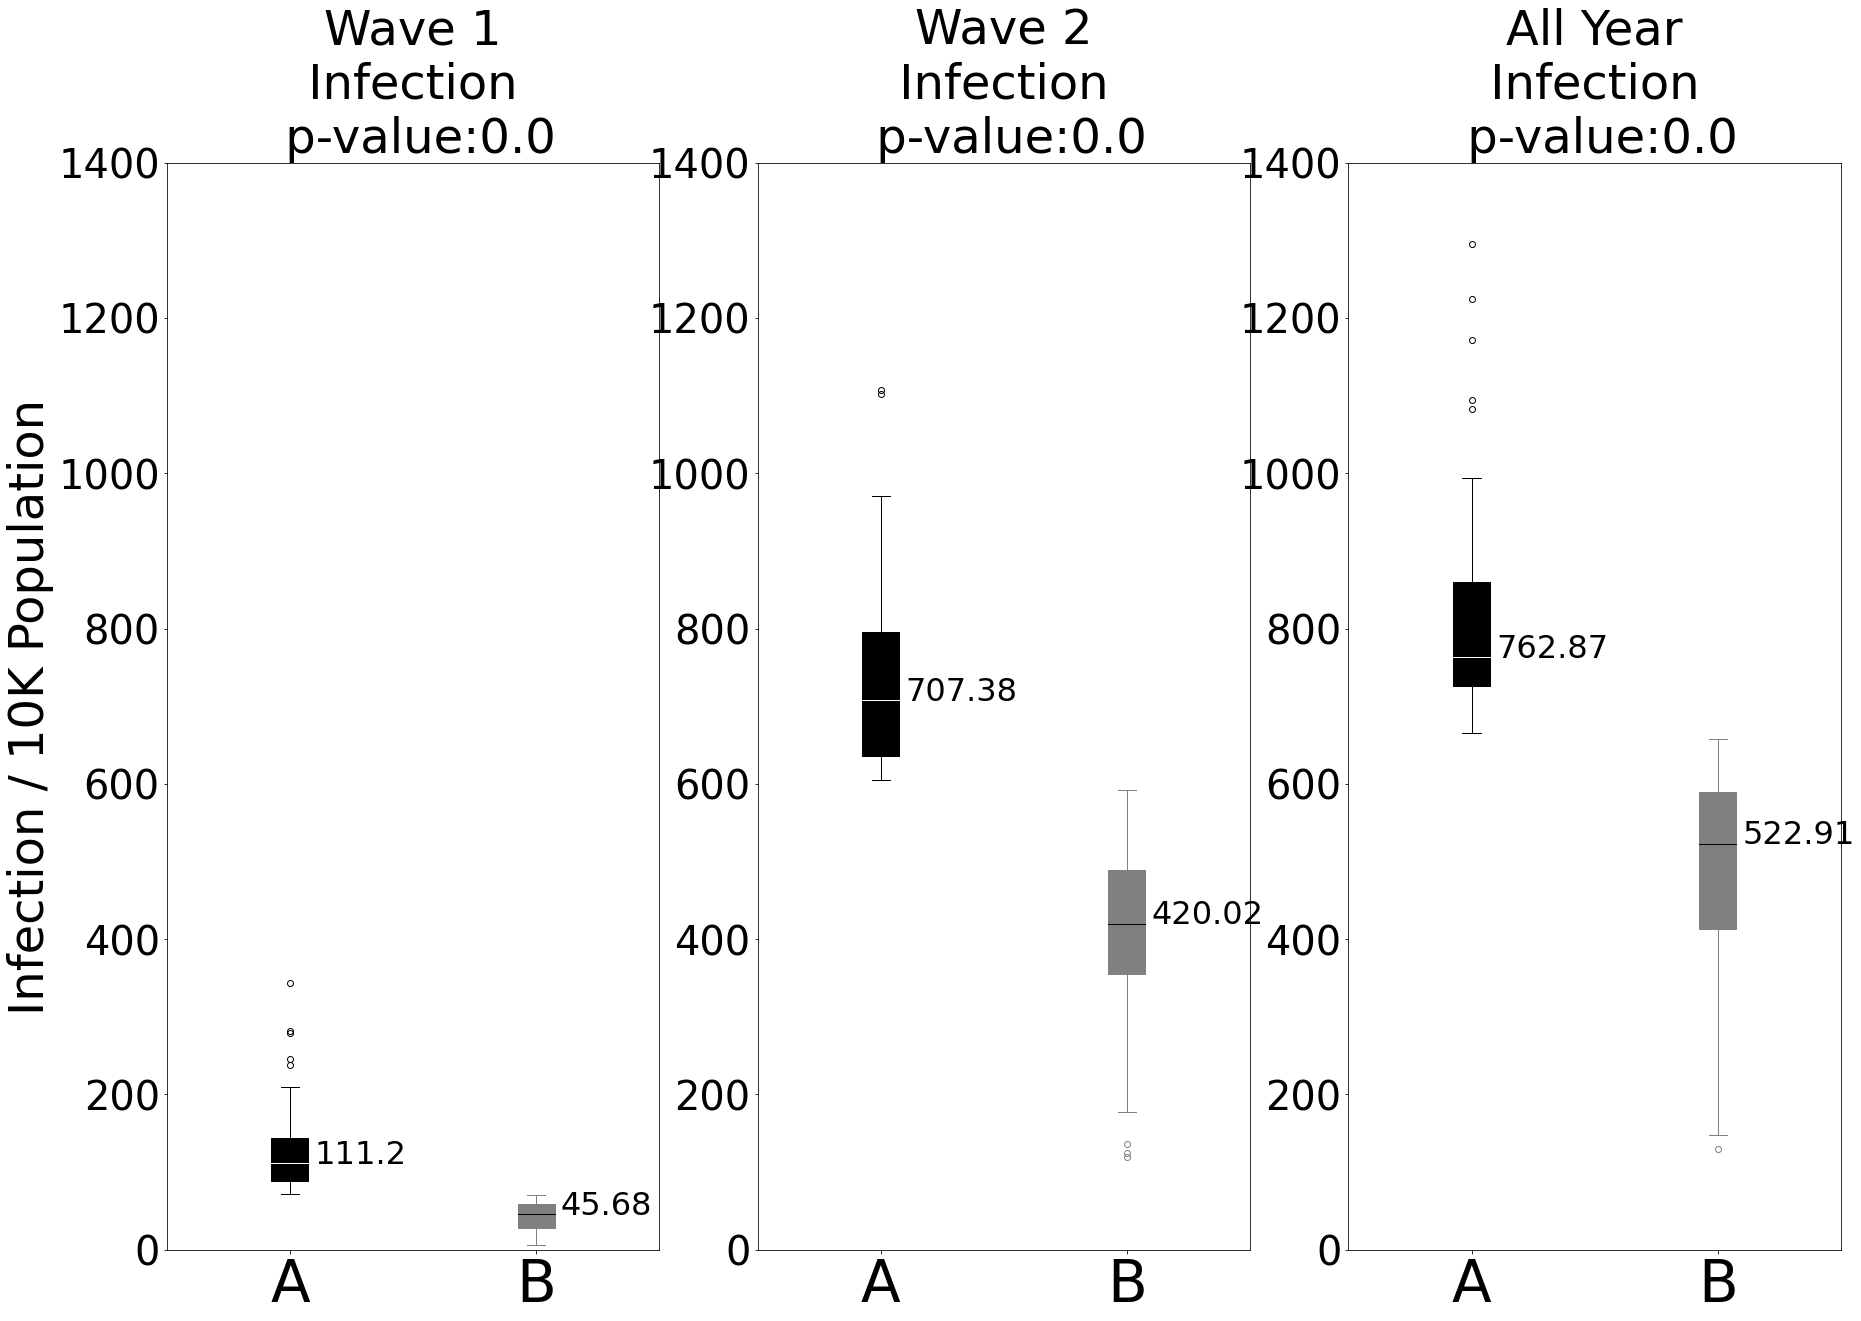

In [ ]:
stats_result = pd.DataFrame(columns=['Name', 'T-test Statistics', 'T-Test p-value', 'Mann-Whitney U test Statistics', 'Mann-Whitney U test p-value'])

rindex = [1, 2, 3]
region = ['Wave 1', 'Wave 2', 'All Year']

fig, ax = plt.subplots(1, 3,figsize=(30,20))

for i in rindex:
  if i == 1:
    rdata = wave1_data
  elif i == 2:
    rdata = wave2_data
  else:
    rdata = whole_data

  para = 'cases rate 10k'

  maincount = rdata[rdata['type'] == 0]
  buf100count = rdata[rdata['type'] == 1]

  q1cust1 = [np.quantile(maincount[para].to_list(), 0.25)]
  q1cust2 = [np.quantile(buf100count[para].to_list(), 0.25)]
  q2cust1 = [np.quantile(maincount[para].to_list(), 0.5)]
  q2cust2 = [np.quantile(buf100count[para].to_list(), 0.5)]
  q3cust1 = [np.quantile(maincount[para].to_list(), 0.75)]
  q3cust2 = [np.quantile(buf100count[para].to_list(), 0.75)]

  pdata = []
  pdata.append(maincount[para].tolist())
  pdata.append(buf100count[para].tolist())
  c = 'black'
  ax[i-1].boxplot(pdata[0], labels = ['A'], positions = [1], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='white'))
  
  c = 'grey'
  ax[i-1].boxplot(pdata[1], labels = ['B'], positions = [2], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black'))

  ax[i-1].text(1+0.1, q2cust1[0], str(round(q2cust1[0],2)), fontsize = 32)
  ax[i-1].text(2+0.1, q2cust2[0], str(round(q2cust2[0],2)), fontsize = 32)

  ax[i-1].tick_params(axis='y', which='major', labelsize=40)
  ax[i-1].tick_params(axis='x', which='major', labelsize=58)

  ax[i-1].margins(x=0.5, y=0.1)
  # ax[i-1].set_yscale('log')
  if i == 1: 
    ax[i-1].set_ylabel('Infection / 10K Population', fontsize = 48)
  ax[i-1].set_title(region[i-1], fontsize = 48)
  ax[i-1].set_ylim(0, 1400)
  
  ax[i-1].set_title( region[i-1] + '\n Infection \n p-value:' + str(np.round(ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1], 4)), fontsize = 48)

  # ax[i-1].show()
  # print('Zone A ' + region[i], stats.normaltest(maincount[para].to_list()))
  # print('Zone B ' + region[i], stats.normaltest(buf100count[para].to_list()))
  print(para + ' ' + region[i-1], ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para]))
  print(para + ' ' + region[i-1] + 'mean Zone A ' + str(rdata[rdata['type'] == 0][para].mean()) + ',mean Zone B ' +  str(rdata[rdata['type'] == 1][para].mean()))
  print(para + ' ' + region[i-1] + 'std Zone A ' + str(rdata[rdata['type'] == 0][para].std()) + ',std Zone B ' +  str(rdata[rdata['type'] == 1][para].std()))
  stats_result = stats_result.append({'Name': para+' '+region[i-1], 'T-test Statistics': ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[0], 'T-test p-value': ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1], 'Mann-Whitney U test Statistics': mannwhitneyu(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[0], 'Mann-Whitney U test p-value': mannwhitneyu(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1]}, ignore_index=True)

plt.savefig("infect.svg", format="svg")
# files.download("infect.svg")

deaths cases 10k Wave 1 Ttest_indResult(statistic=3.0595007971311565, pvalue=0.0027541639024024505)
deaths cases 10k Wave 1mean Zone A 501.20249617075154,mean Zone B 343.41861609584697
deaths cases 10k Wave 1std Zone A 324.38490084380163,std Zone B 213.09665888246855
deaths cases 10k Wave 2 Ttest_indResult(statistic=-1.679320057974125, pvalue=0.09578129356527779)
deaths cases 10k Wave 2mean Zone A 109.21277889147466,mean Zone B 121.45635625993818
deaths cases 10k Wave 2std Zone A 35.38440085432806,std Zone B 39.236520627626625
deaths cases 10k All Year Ttest_indResult(statistic=-3.7510677721398533, pvalue=0.0002764078171766405)
deaths cases 10k All Yearmean Zone A 138.03230425833726,mean Zone B 200.3551723877092
deaths cases 10k All Yearstd Zone A 49.14045209934761,std Zone B 104.42955410516889


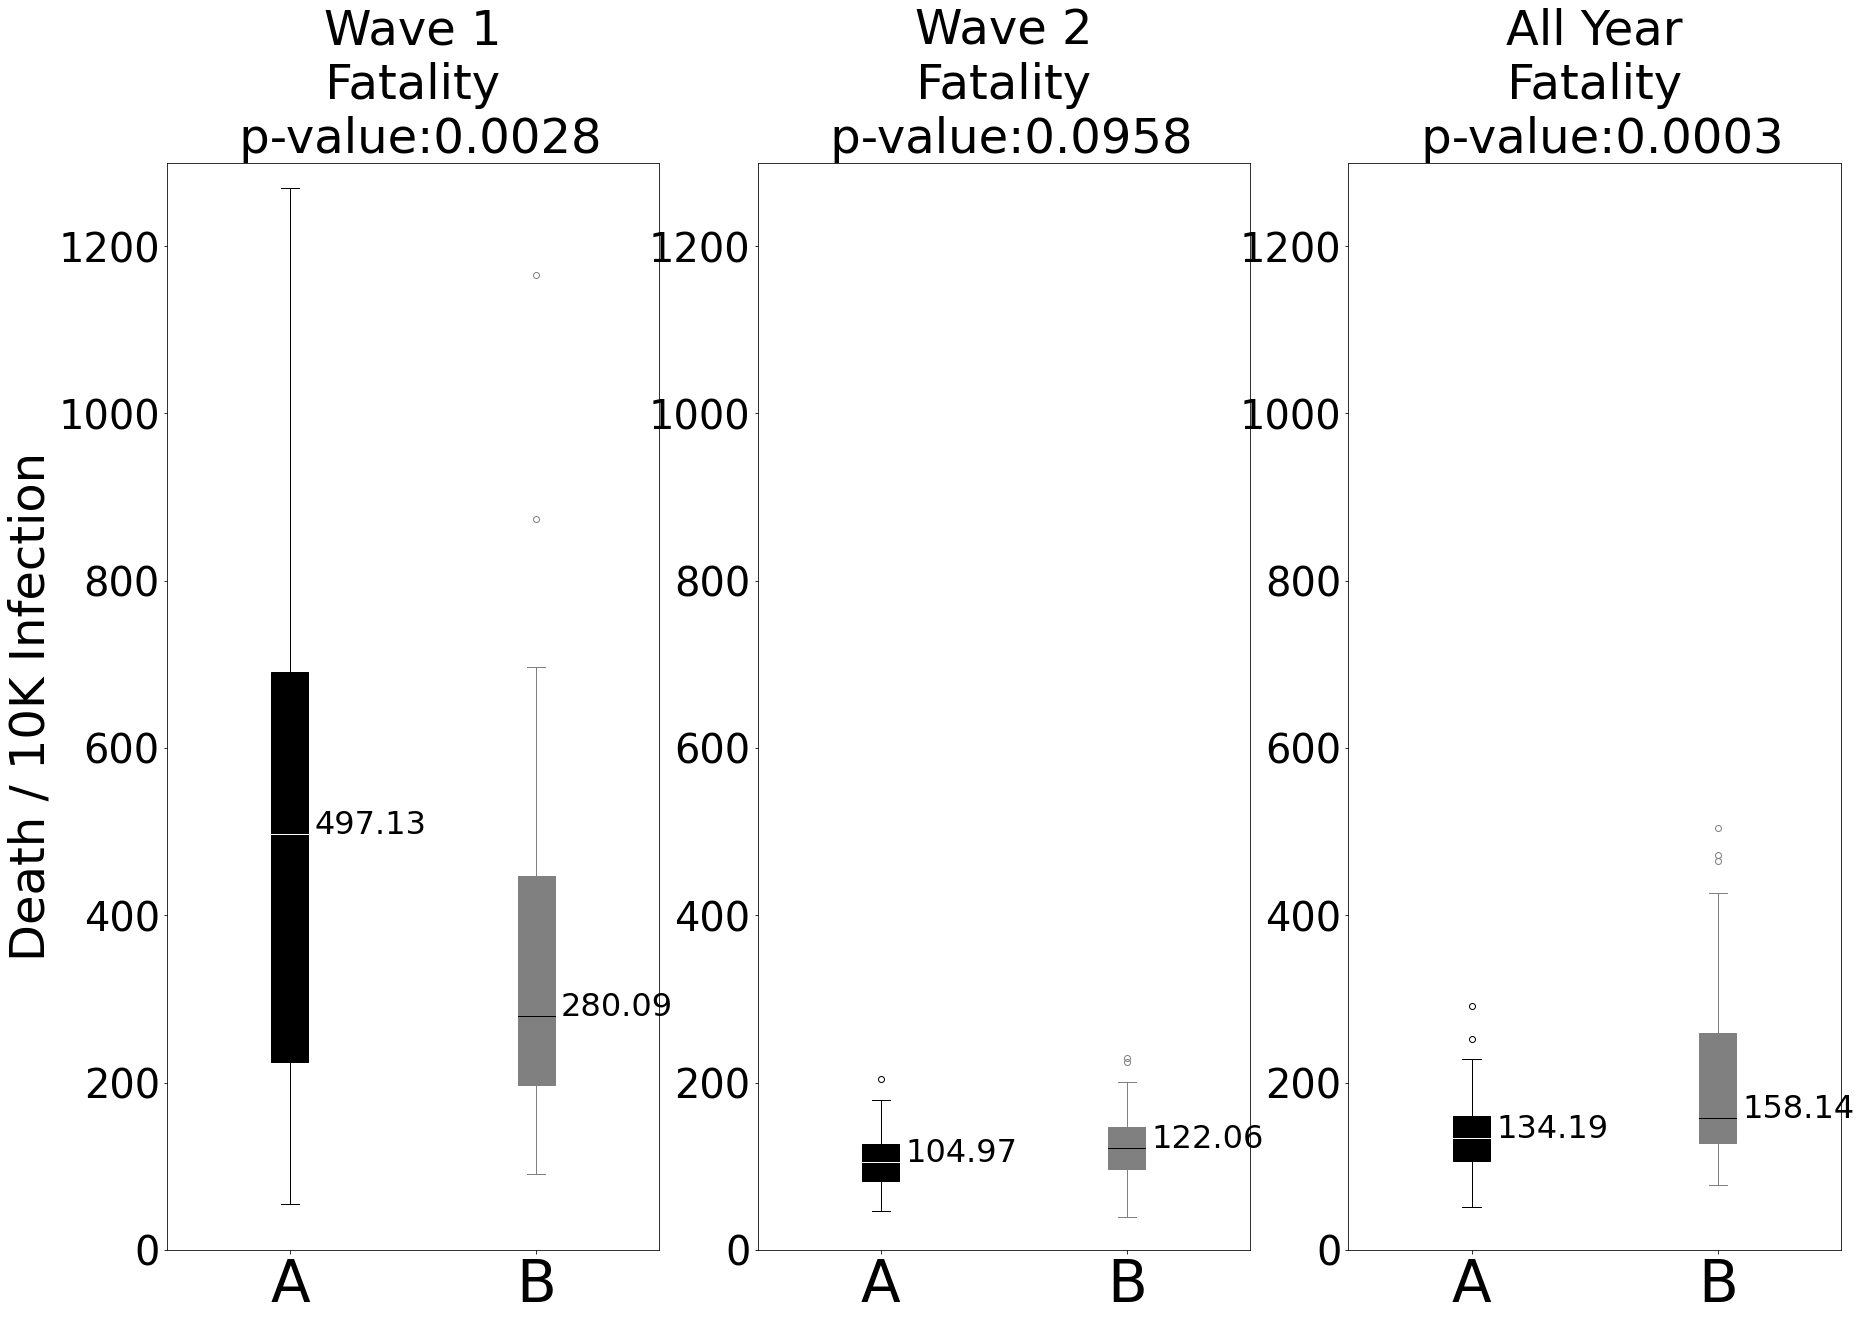

In [ ]:

rindex = [1, 2, 3]
region = ['Wave 1', 'Wave 2', 'All Year']

fig, ax = plt.subplots(1, 3,figsize=(30,20))

for i in rindex:
  if i == 1:
    rdata = wave1_data
  elif i == 2:
    rdata = wave2_data
  else:
    rdata = whole_data

  para = 'deaths cases 10k'

  maincount = rdata[rdata['type'] == 0]
  buf100count = rdata[rdata['type'] == 1]

  q1cust1 = [np.quantile(maincount[para].to_list(), 0.25)]
  q1cust2 = [np.quantile(buf100count[para].to_list(), 0.25)]
  q2cust1 = [np.quantile(maincount[para].to_list(), 0.5)]
  q2cust2 = [np.quantile(buf100count[para].to_list(), 0.5)]
  q3cust1 = [np.quantile(maincount[para].to_list(), 0.75)]
  q3cust2 = [np.quantile(buf100count[para].to_list(), 0.75)]

  pdata = []
  pdata.append(maincount[para].tolist())
  pdata.append(buf100count[para].tolist())
  c = 'black'
  ax[i-1].boxplot(pdata[0], labels = ['A'], positions = [1], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='white'))
  
  c = 'grey'
  ax[i-1].boxplot(pdata[1], labels = ['B'], positions = [2], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black'))

  ax[i-1].text(1+0.1, q2cust1[0], str(round(q2cust1[0],2)), fontsize = 32)
  ax[i-1].text(2+0.1, q2cust2[0], str(round(q2cust2[0],2)), fontsize = 32)

  ax[i-1].tick_params(axis='y', which='major', labelsize=40)
  ax[i-1].tick_params(axis='x', which='major', labelsize=58)

  ax[i-1].margins(x=0.5, y=0.1)
  # ax[i-1].set_yscale('log')
  if i == 1: 
    ax[i-1].set_ylabel('Death / 10K Infection', fontsize = 48)
  ax[i-1].set_title(region[i-1], fontsize = 48)
  ax[i-1].set_ylim(0, 1300)
  
  ax[i-1].set_title( region[i-1] + '\n Fatality \n p-value:' + str(np.round(ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1], 4)), fontsize = 48)

  # ax[i-1].show()
  # print('Zone A ' + region[i], stats.normaltest(maincount[para].to_list()))
  # print('Zone B ' + region[i], stats.normaltest(buf100count[para].to_list()))
  print(para + ' ' + region[i-1], ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para]))
  print(para + ' ' + region[i-1] + 'mean Zone A ' + str(rdata[rdata['type'] == 0][para].mean()) + ',mean Zone B ' +  str(rdata[rdata['type'] == 1][para].mean()))
  print(para + ' ' + region[i-1] + 'std Zone A ' + str(rdata[rdata['type'] == 0][para].std()) + ',std Zone B ' +  str(rdata[rdata['type'] == 1][para].std()))
  stats_result = stats_result.append({'Name': para+' '+region[i-1], 'T-test Statistics': ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[0], 'T-test p-value': ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1], 'Mann-Whitney U test Statistics': mannwhitneyu(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[0], 'Mann-Whitney U test p-value': mannwhitneyu(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1]}, ignore_index=True)

plt.savefig("fatal.svg", format="svg")
# files.download("infect.svg")

pm25 All Year MannwhitneyuResult(statistic=1513.0, pvalue=0.2373893955292644)
pm25 All Yearmean Zone A 8.088950004195606,mean Zone B 7.881632591028638
pm25 All Yearstd Zone A 1.536161929672898,std Zone B 1.570270037057686
so2 All Year MannwhitneyuResult(statistic=1585.0, pvalue=0.37607379606017527)
so2 All Yearmean Zone A 1.867091755621601,mean Zone B 1.6025728854372905
so2 All Yearstd Zone A 2.6816626573620104,std Zone B 1.119727031875408
no2 All Year MannwhitneyuResult(statistic=1214.0, pvalue=0.008861938213476684)
no2 All Yearmean Zone A 21.349529752191078,mean Zone B 18.011408942590958
no2 All Yearstd Zone A 7.257009631751735,std Zone B 6.3373538079825265
ozone All Year MannwhitneyuResult(statistic=1427.0, pvalue=0.1167858009233726)
ozone All Yearmean Zone A 0.04733465900629235,mean Zone B 0.04624415467994823
ozone All Yearstd Zone A 0.00488877279010755,std Zone B 0.004183337386105944


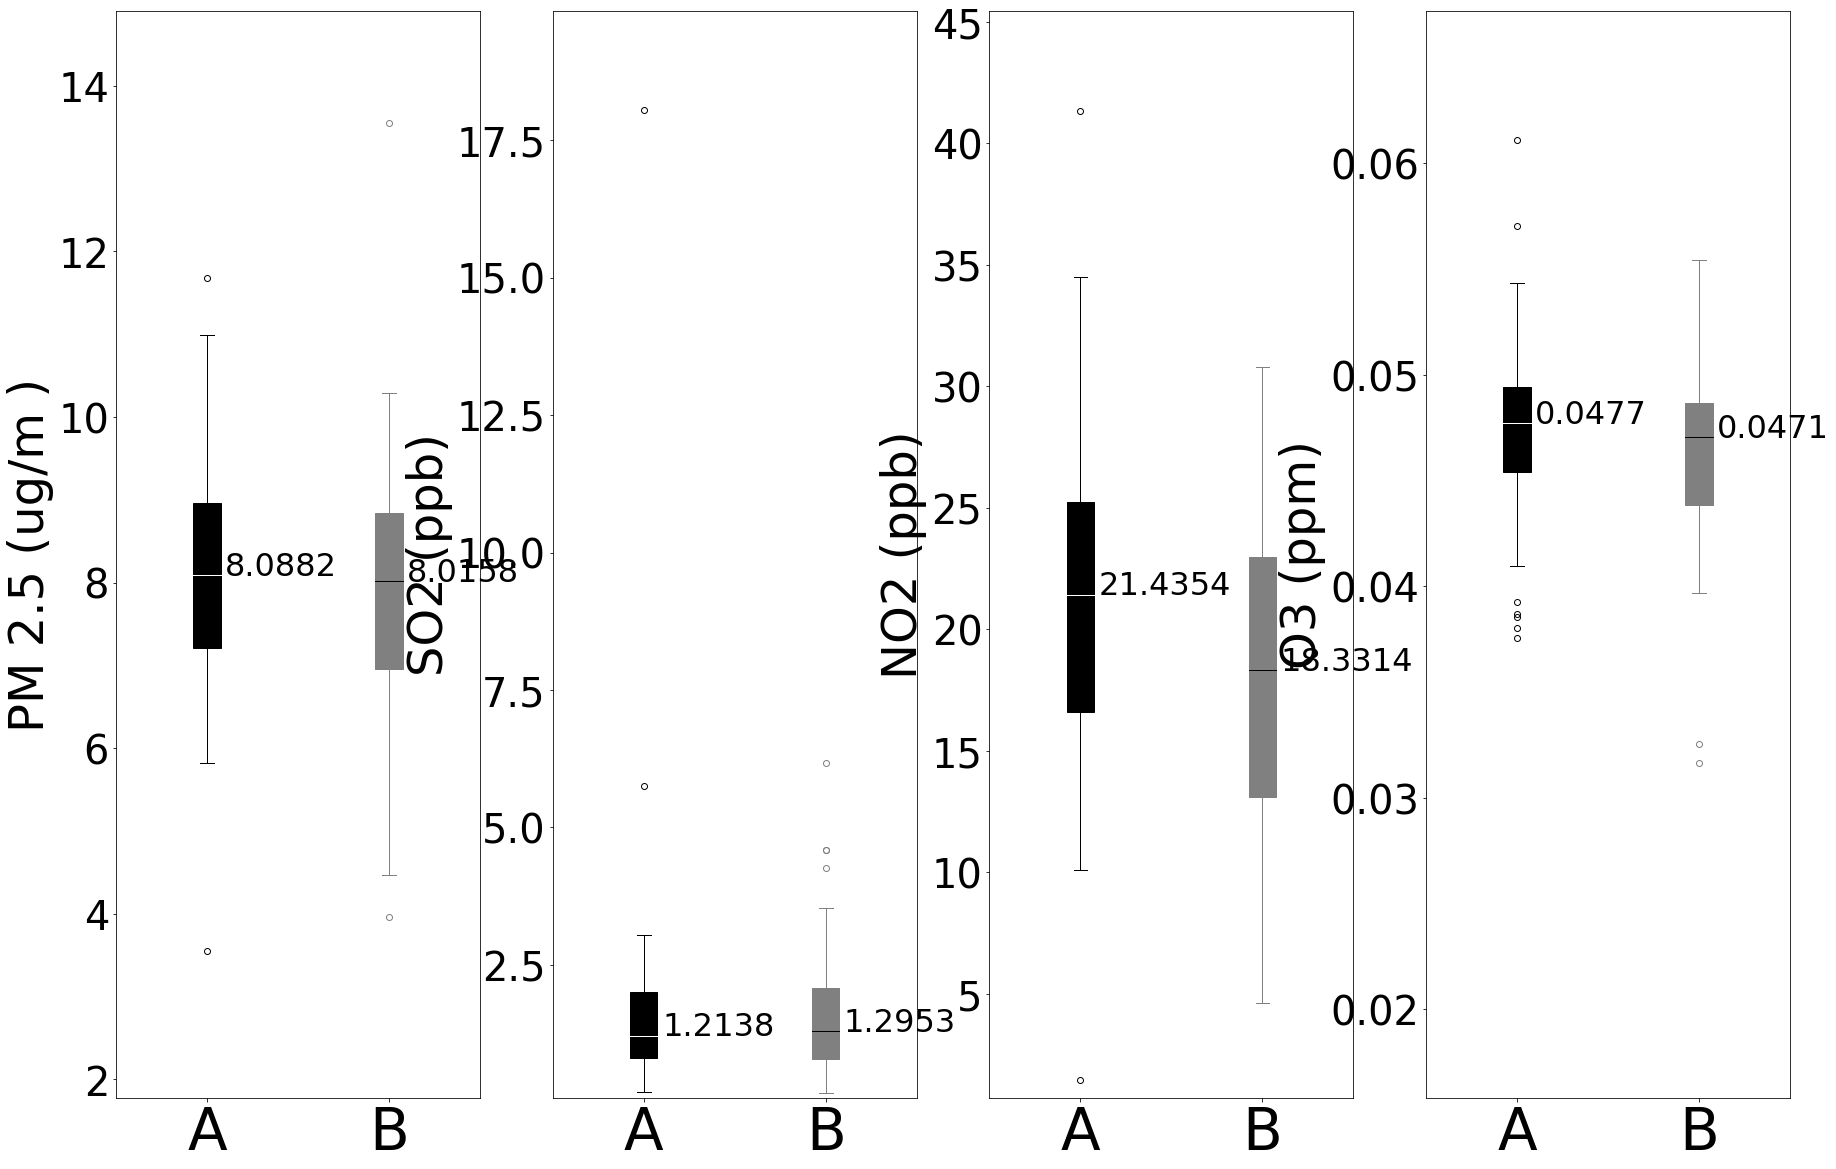

In [ ]:
rindex = [1, 2, 3, 4]
region = ['All Year', 'All Year', 'All Year', 'All Year']
labels = ['PM 2.5 (ug/m )', 'SO2 (ppb)', 'NO2 (ppb)', 'O3 (ppm)']

rdata = whole_data

fig, ax = plt.subplots(1, 4,figsize=(30,20))

for i in rindex:
  if i == 1:
    para = 'pm25'
  elif i == 2:
    para = 'so2'
  elif i == 3:
    para = 'no2'
  else:
    para = 'ozone'

  maincount = rdata[rdata['type'] == 0]
  buf100count = rdata[rdata['type'] == 1]

  q1cust1 = [np.quantile(maincount[para].to_list(), 0.25)]
  q1cust2 = [np.quantile(buf100count[para].to_list(), 0.25)]
  q2cust1 = [np.quantile(maincount[para].to_list(), 0.5)]
  q2cust2 = [np.quantile(buf100count[para].to_list(), 0.5)]
  q3cust1 = [np.quantile(maincount[para].to_list(), 0.75)]
  q3cust2 = [np.quantile(buf100count[para].to_list(), 0.75)]

  pdata = []
  pdata.append(maincount[para].tolist())
  pdata.append(buf100count[para].tolist())
  c = 'black'
  ax[i-1].boxplot(pdata[0], labels = ['A'], positions = [1], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='white'))
  
  c = 'grey'
  ax[i-1].boxplot(pdata[1], labels = ['B'], positions = [2], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black'))

  ax[i-1].text(1+0.1, q2cust1[0], str(round(q2cust1[0],4)), fontsize = 32)
  ax[i-1].text(2+0.1, q2cust2[0], str(round(q2cust2[0],4)), fontsize = 32)

  ax[i-1].tick_params(axis='y', which='major', labelsize=40)
  ax[i-1].tick_params(axis='x', which='major', labelsize=58)

  ax[i-1].margins(x=0.5, y=0.1)
  # ax[i-1].set_yscale('log')
  ax[i-1].set_ylabel(labels[i-1], fontsize = 48)
  ax[i-1].set_ylim(max(0, rdata[para].min() - (rdata[para].min()/2)), rdata[para].max() + (rdata[para].max()/10))
  # ax[i-1].show()
  # print('Zone A ' + region[i], stats.normaltest(maincount[para].to_list()))
  # print('Zone B ' + region[i], stats.normaltest(buf100count[para].to_list()))
  print(para + ' ' + region[i-1], mannwhitneyu(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para]))
  print(para + ' ' + region[i-1] + 'mean Zone A ' + str(rdata[rdata['type'] == 0][para].mean()) + ',mean Zone B ' +  str(rdata[rdata['type'] == 1][para].mean()))
  print(para + ' ' + region[i-1] + 'std Zone A ' + str(rdata[rdata['type'] == 0][para].std()) + ',std Zone B ' +  str(rdata[rdata['type'] == 1][para].std()))
  stats_result = stats_result.append({'Name': para+' '+region[i-1], 'T-test Statistics': ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[0], 'T-test p-value': ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1], 'Mann-Whitney U test Statistics': mannwhitneyu(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[0], 'Mann-Whitney U test p-value': mannwhitneyu(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1]}, ignore_index=True)

plt.savefig("pollutant.svg", format="svg")
# files.download("infect.svg")

pm25 All Year MannwhitneyuResult(statistic=1675.0, pvalue=0.3883626344958464)
pm25 All Yearmean Zone A 7.89643763879052,mean Zone B 8.036850378727769
pm25 All Yearstd Zone A 1.441010766717279,std Zone B 1.6888290389280758
so2 All Year MannwhitneyuResult(statistic=1361.0, pvalue=0.023867375991948724)
so2 All Yearmean Zone A 1.3849789862886681,mean Zone B 2.0808943429151756
so2 All Yearstd Zone A 0.8954862768164027,std Zone B 2.547417877774287
no2 All Year MannwhitneyuResult(statistic=1337.0, pvalue=0.017456632465162353)
no2 All Yearmean Zone A 20.527805305750263,mean Zone B 17.810780594254105
no2 All Yearstd Zone A 6.646816202478146,std Zone B 6.89481805368786
ozone All Year MannwhitneyuResult(statistic=1530.0, pvalue=0.14302310874575203)
ozone All Yearmean Zone A 0.047097388295814564,mean Zone B 0.04614166844420822
ozone All Yearstd Zone A 0.004107597536861539,std Zone B 0.004866176300508551


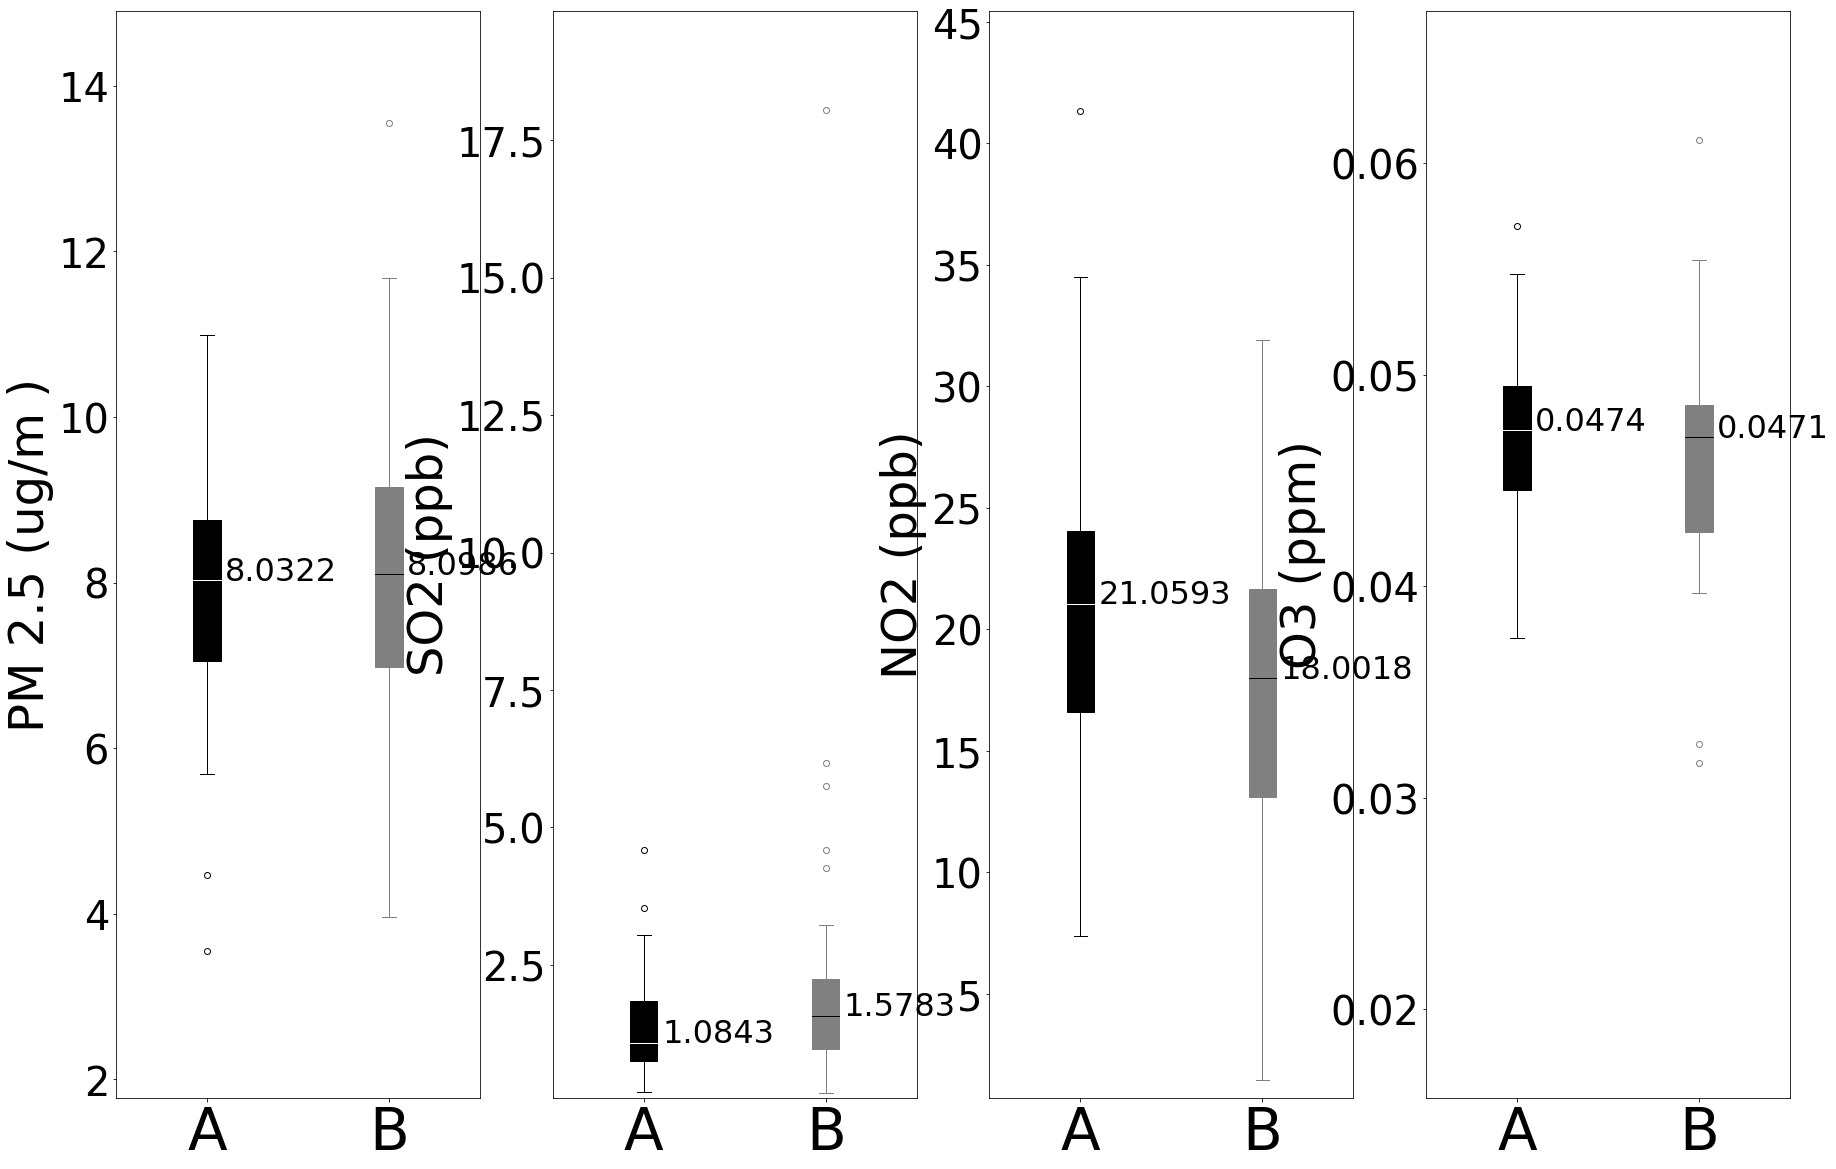

In [ ]:
rindex = [1, 2, 3, 4]
region = ['All Year', 'All Year', 'All Year', 'All Year']
labels = ['PM 2.5 (ug/m )', 'SO2 (ppb)', 'NO2 (ppb)', 'O3 (ppm)']

rdata = wave1_data

fig, ax = plt.subplots(1, 4,figsize=(30,20))

for i in rindex:
  if i == 1:
    para = 'pm25'
  elif i == 2:
    para = 'so2'
  elif i == 3:
    para = 'no2'
  else:
    para = 'ozone'

  maincount = rdata[rdata['type'] == 0]
  buf100count = rdata[rdata['type'] == 1]

  q1cust1 = [np.quantile(maincount[para].to_list(), 0.25)]
  q1cust2 = [np.quantile(buf100count[para].to_list(), 0.25)]
  q2cust1 = [np.quantile(maincount[para].to_list(), 0.5)]
  q2cust2 = [np.quantile(buf100count[para].to_list(), 0.5)]
  q3cust1 = [np.quantile(maincount[para].to_list(), 0.75)]
  q3cust2 = [np.quantile(buf100count[para].to_list(), 0.75)]

  pdata = []
  pdata.append(maincount[para].tolist())
  pdata.append(buf100count[para].tolist())
  c = 'black'
  ax[i-1].boxplot(pdata[0], labels = ['A'], positions = [1], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='white'))
  
  c = 'grey'
  ax[i-1].boxplot(pdata[1], labels = ['B'], positions = [2], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black'))

  ax[i-1].text(1+0.1, q2cust1[0], str(round(q2cust1[0],4)), fontsize = 32)
  ax[i-1].text(2+0.1, q2cust2[0], str(round(q2cust2[0],4)), fontsize = 32)

  ax[i-1].tick_params(axis='y', which='major', labelsize=40)
  ax[i-1].tick_params(axis='x', which='major', labelsize=58)

  ax[i-1].margins(x=0.5, y=0.1)
  # ax[i-1].set_yscale('log')
  ax[i-1].set_ylabel(labels[i-1], fontsize = 48)
  ax[i-1].set_ylim(max(0, rdata[para].min() - (rdata[para].min()/2)), rdata[para].max() + (rdata[para].max()/10))
  # ax[i-1].show()
  # print('Zone A ' + region[i], stats.normaltest(maincount[para].to_list()))
  # print('Zone B ' + region[i], stats.normaltest(buf100count[para].to_list()))
  print(para + ' ' + region[i-1], mannwhitneyu(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para]))
  print(para + ' ' + region[i-1] + 'mean Zone A ' + str(rdata[rdata['type'] == 0][para].mean()) + ',mean Zone B ' +  str(rdata[rdata['type'] == 1][para].mean()))
  print(para + ' ' + region[i-1] + 'std Zone A ' + str(rdata[rdata['type'] == 0][para].std()) + ',std Zone B ' +  str(rdata[rdata['type'] == 1][para].std()))
  stats_result = stats_result.append({'Name': para+' '+region[i-1], 'T-test Statistics': ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[0], 'T-test p-value': ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1], 'Mann-Whitney U test Statistics': mannwhitneyu(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[0], 'Mann-Whitney U test p-value': mannwhitneyu(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1]}, ignore_index=True)

plt.savefig("pollutant.svg", format="svg")
# files.download("infect.svg")

pm25 All Year MannwhitneyuResult(statistic=1315.0, pvalue=0.05744503160928734)
pm25 All Yearmean Zone A 8.315713919632199,mean Zone B 7.7644992724913235
pm25 All Yearstd Zone A 1.697964817988447,std Zone B 1.4428479804602323
so2 All Year MannwhitneyuResult(statistic=1556.0, pvalue=0.41215100790296655)
so2 All Yearmean Zone A 1.8950043992771122,mean Zone B 1.5975890114507307
so2 All Yearstd Zone A 2.763924793516642,std Zone B 1.1137637433179883
no2 All Year MannwhitneyuResult(statistic=1376.0, pvalue=0.10865171250899608)
no2 All Yearmean Zone A 20.36684002385452,mean Zone B 18.68624224547169
no2 All Yearstd Zone A 6.770782476631574,std Zone B 6.892621538531492
ozone All Year MannwhitneyuResult(statistic=1282.0, pvalue=0.0390287051390091)
ozone All Yearmean Zone A 0.0478391450485194,mean Zone B 0.04600840598528372
ozone All Yearstd Zone A 0.004767586453105235,std Zone B 0.004198641130803123


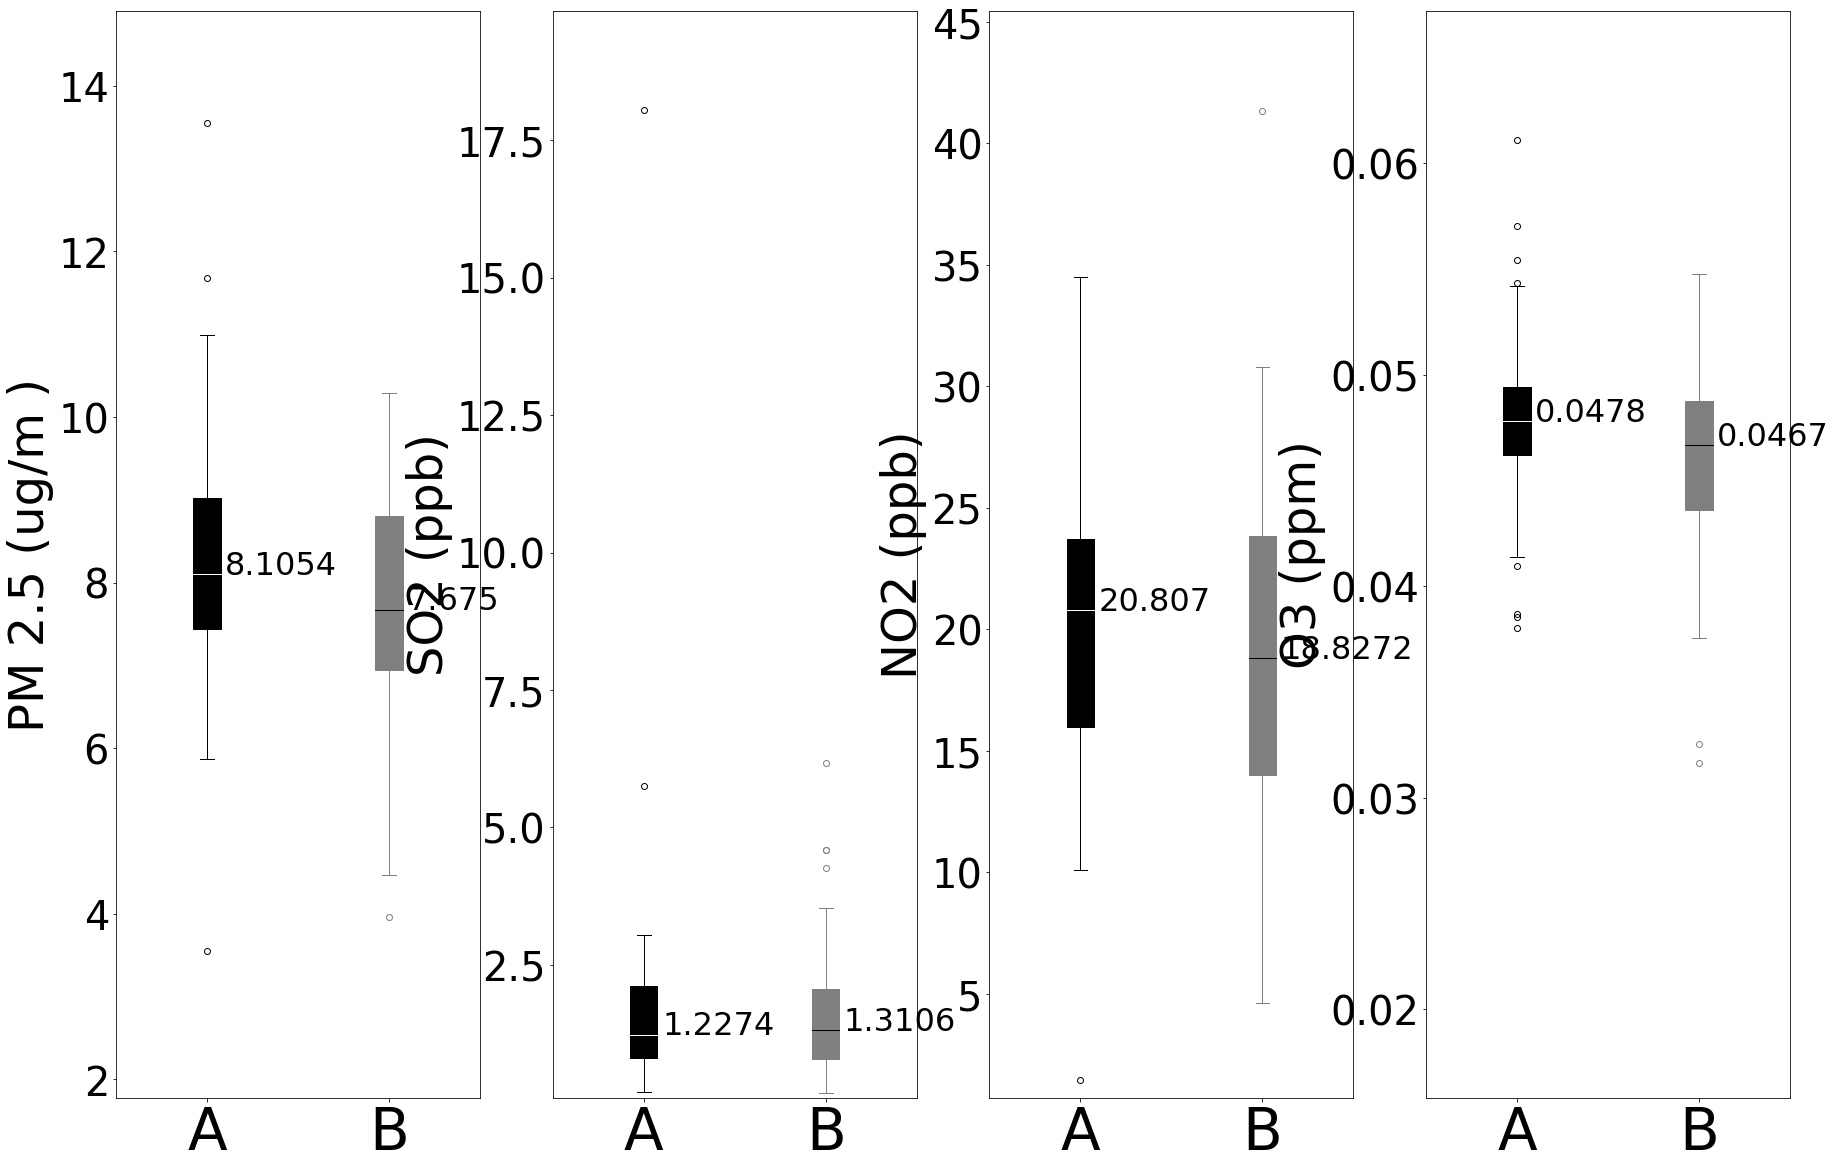

In [ ]:
rindex = [1, 2, 3, 4]
region = ['All Year', 'All Year', 'All Year', 'All Year']
labels = ['PM 2.5 (ug/m )', 'SO2 (ppb)', 'NO2 (ppb)', 'O3 (ppm)']

rdata = wave2_data

fig, ax = plt.subplots(1, 4,figsize=(30,20))

for i in rindex:
  if i == 1:
    para = 'pm25'
  elif i == 2:
    para = 'so2'
  elif i == 3:
    para = 'no2'
  else:
    para = 'ozone'

  maincount = rdata[rdata['type'] == 0]
  buf100count = rdata[rdata['type'] == 1]

  q1cust1 = [np.quantile(maincount[para].to_list(), 0.25)]
  q1cust2 = [np.quantile(buf100count[para].to_list(), 0.25)]
  q2cust1 = [np.quantile(maincount[para].to_list(), 0.5)]
  q2cust2 = [np.quantile(buf100count[para].to_list(), 0.5)]
  q3cust1 = [np.quantile(maincount[para].to_list(), 0.75)]
  q3cust2 = [np.quantile(buf100count[para].to_list(), 0.75)]

  pdata = []
  pdata.append(maincount[para].tolist())
  pdata.append(buf100count[para].tolist())
  c = 'black'
  ax[i-1].boxplot(pdata[0], labels = ['A'], positions = [1], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='white'))
  
  c = 'grey'
  ax[i-1].boxplot(pdata[1], labels = ['B'], positions = [2], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black'))

  ax[i-1].text(1+0.1, q2cust1[0], str(round(q2cust1[0],4)), fontsize = 32)
  ax[i-1].text(2+0.1, q2cust2[0], str(round(q2cust2[0],4)), fontsize = 32)

  ax[i-1].tick_params(axis='y', which='major', labelsize=40)
  ax[i-1].tick_params(axis='x', which='major', labelsize=58)

  ax[i-1].margins(x=0.5, y=0.1)
  # ax[i-1].set_yscale('log')
  ax[i-1].set_ylabel(labels[i-1], fontsize = 48)
  ax[i-1].set_ylim(max(0, rdata[para].min() - (rdata[para].min()/2)), rdata[para].max() + (rdata[para].max()/10))
  # ax[i-1].show()
  # print('Zone A ' + region[i], stats.normaltest(maincount[para].to_list()))
  # print('Zone B ' + region[i], stats.normaltest(buf100count[para].to_list()))
  print(para + ' ' + region[i-1], mannwhitneyu(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para]))
  print(para + ' ' + region[i-1] + 'mean Zone A ' + str(rdata[rdata['type'] == 0][para].mean()) + ',mean Zone B ' +  str(rdata[rdata['type'] == 1][para].mean()))
  print(para + ' ' + region[i-1] + 'std Zone A ' + str(rdata[rdata['type'] == 0][para].std()) + ',std Zone B ' +  str(rdata[rdata['type'] == 1][para].std()))
  stats_result = stats_result.append({'Name': para+' '+region[i-1], 'T-test Statistics': ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[0], 'T-test p-value': ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1], 'Mann-Whitney U test Statistics': mannwhitneyu(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[0], 'Mann-Whitney U test p-value': mannwhitneyu(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1]}, ignore_index=True)

plt.savefig("pollutant.svg", format="svg")
# files.download("infect.svg")

In [ ]:
stats_result.to_csv('t-test_figure1.csv')

### Correlation

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


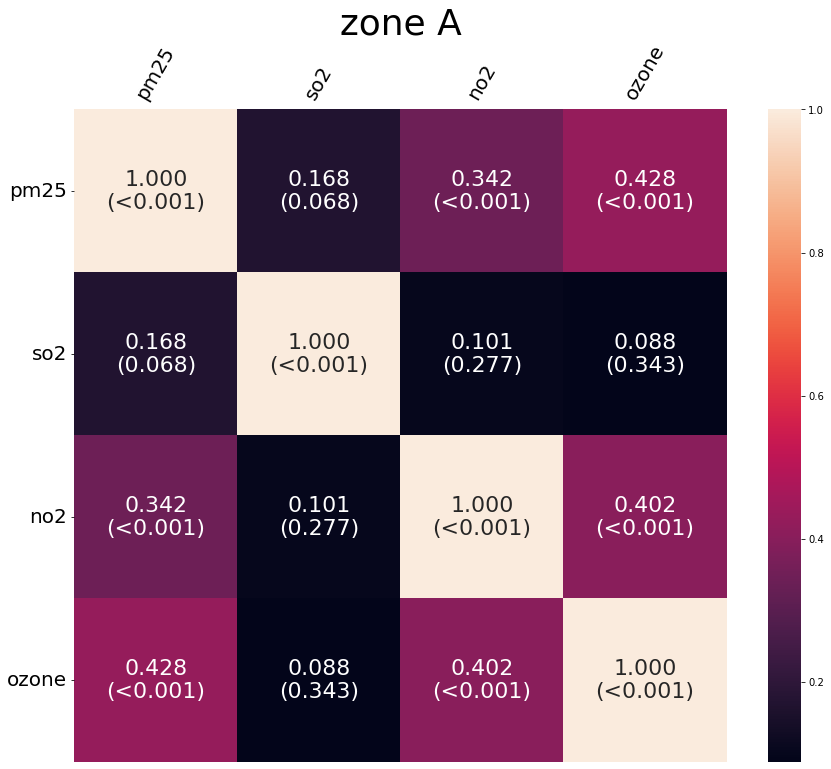

In [ ]:
import seaborn as sns
import statsmodels.formula.api as sm 

# print(rdata['type'].value_counts())
i = 1
fig, ax = plt.subplots(1, figsize=(15,12))
# sns.heatmap(corrdf, xticklabels=corrdf.columns.values, yticklabels=corrdf.columns.values, mask=pval)

rdata = whole_data

df = rdata[['pm25', 'so2', 'no2', 'ozone']]
corrdf = df.corr()

pval = [] 
for ii in range(df.shape[1]): # rows are the number of rows in the matrix.
    for jj in range(df.shape[1]):
        try:
            y = df.columns[ii]
            x = df.columns[jj]
            cval = stats.pearsonr(df[x],df[y])
            pval.append(round(cval[1], 3))
        except ValueError:
            pval.iloc[ii,jj]  = None
            
ax = sns.heatmap(corrdf, annot=True, fmt = '.3f', square=1, linewidths=0.0, annot_kws={"fontsize":22}, ax = ax, cbar=True)
n = 0
for j in range(n, len(ax.texts)): 
  if (str(pval[n]) != "0.0"):
    ax.texts[j].set_text(ax.texts[j].get_text() + "\n(" + str(pval[n]) + ")")
  else:
    ax.texts[j].set_text(ax.texts[j].get_text() + "\n(<0.001)")
  n += 1
  
ax.tick_params(axis='both', which='major', labelsize=30, labelbottom = False, bottom=False, top = False, labeltop=True)
ax.set_xticklabels(fontsize=20, labels = ['pm25', 'so2', 'no2', 'ozone'], rotation=60)
ax.set_yticklabels(fontsize=20, labels = ['pm25', 'so2', 'no2', 'ozone'], rotation=0)
ax.set_title('zone A', fontsize = 36)
# plt.subplot(int('14' + str(i)), sharex=ax[i-1])

plt.savefig("corr_infection_zoneA.svg", format="svg")
plt.savefig("corr_infection_zoneA.png")
# files.download("corr1.svg")
plt.show()

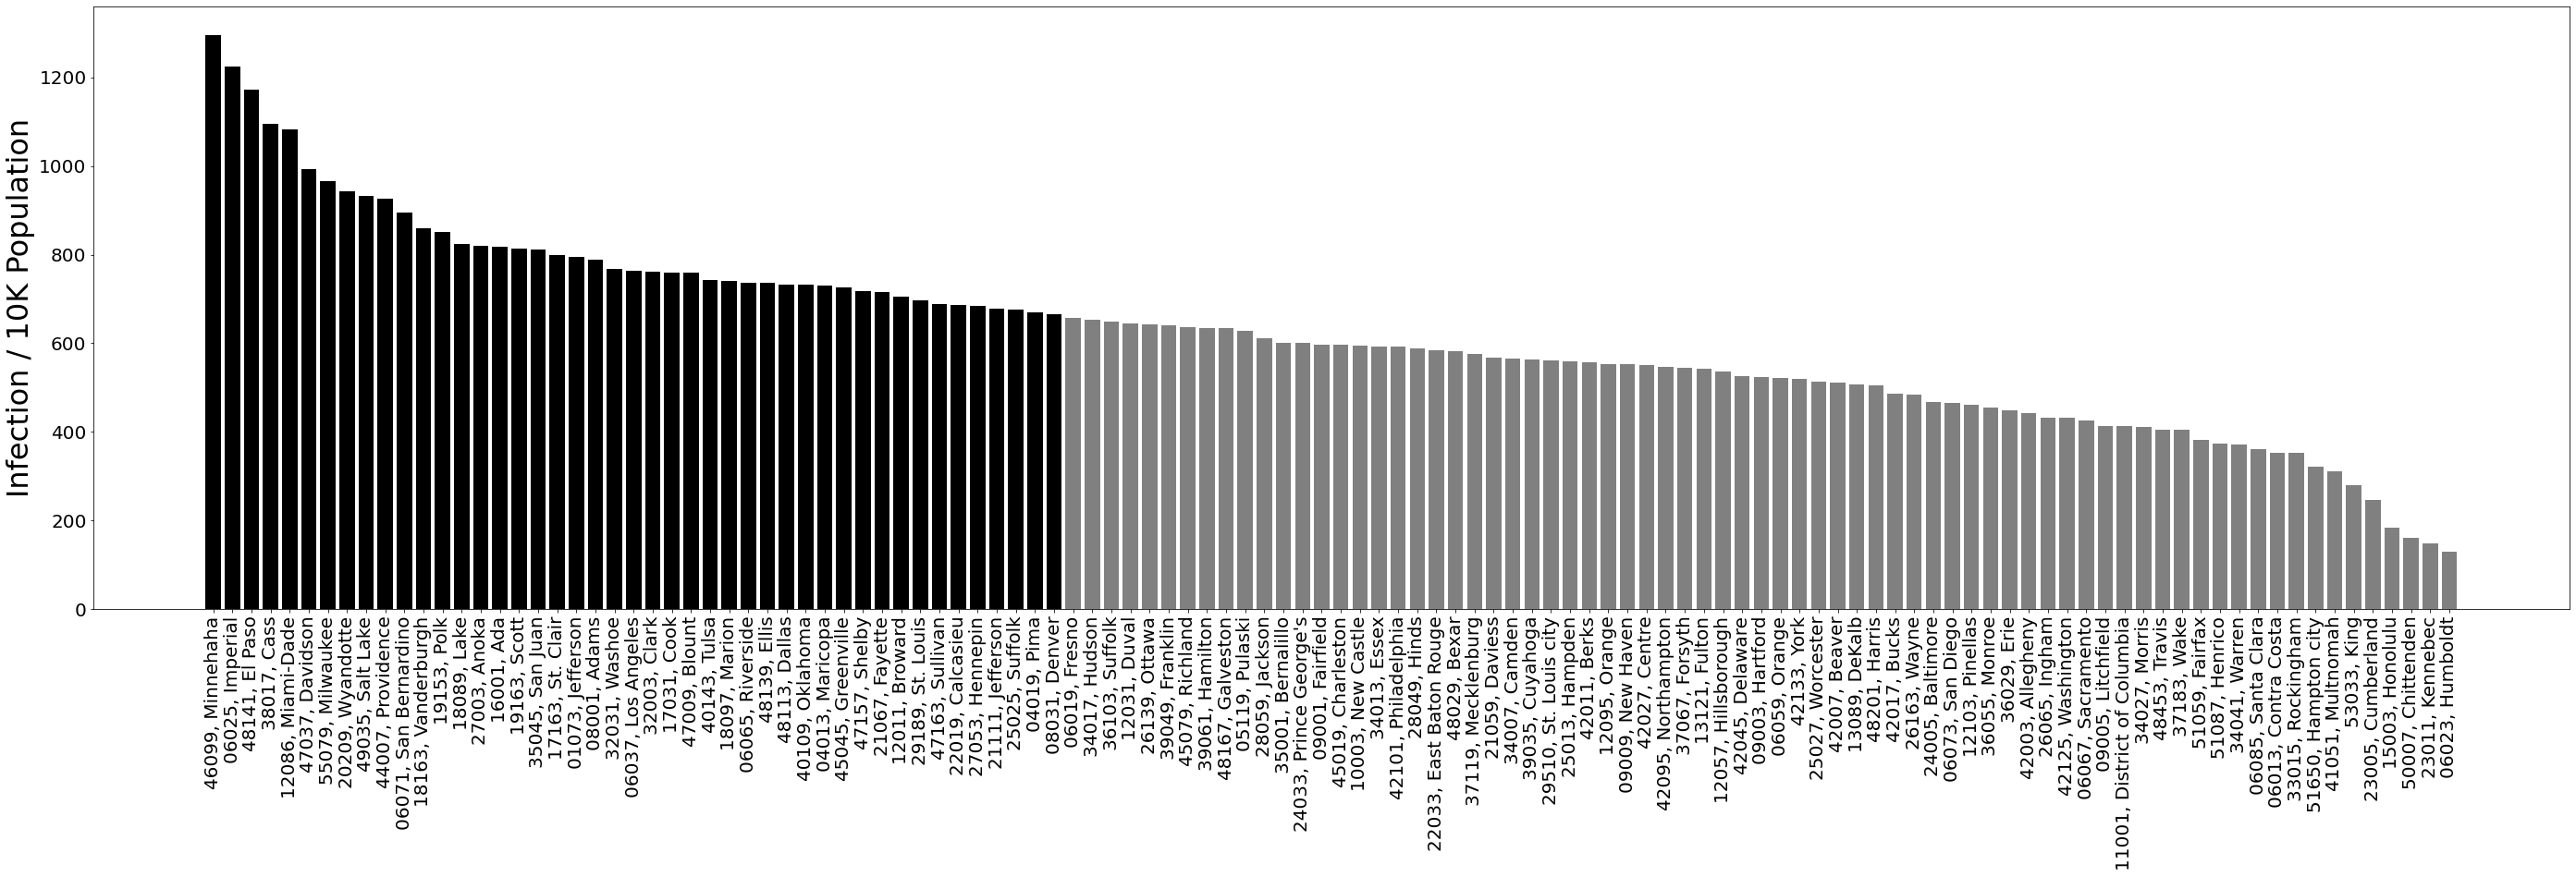

In [ ]:
rdata = whole_data.copy()

plt.figure(figsize=(48,12))

covid = pd.read_csv('/content/drive/My Drive/COVID19_Cities/Data/us-counties.csv')
covid = covid[covid['date'] == '2020-12-31']
covid = covid.drop(['date', 'cases', 'deaths'], axis = 1)
covid = covid.dropna()
covid['fips'] = covid['fips'].astype(int).astype(str).apply(lambda x: x.zfill(5)[0:5])

rdata = rdata.merge(covid, on='fips')
rdata['fips_county'] = rdata.apply(lambda x: x['fips'] + ', ' + x['county'], axis=1)
rdata['color'] = rdata['type'].apply(lambda x: 'black' if x == 0 else 'grey')

plt.bar(rdata['fips_county'], rdata['cases rate 10k'], color=rdata['color'])
plt.ylabel('Infection / 10K Population', fontsize = 32)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation=90)

plt.savefig("barplot_infact_wholedata.svg", format="svg")
plt.savefig("barplot_infact_wholedata.png")

### Time series

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Allyear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                
Dep. Variable:                            values   No. Observations:                   61
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 4)   Log Likelihood                 -89.263
Date:                           Tue, 22 Mar 2022   AIC                            190.526
Time:                                   16:39:06   BIC                            203.191
Sample:                               01-31-2015   HQIC                           195.490
                                    - 01-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.9297      2.047      2.896      0.004       1.917       9.942
ar.L1          0.4923      0.121      4.079

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                
Dep. Variable:                            values   No. Observations:                   61
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 4)   Log Likelihood                 -93.634
Date:                           Tue, 22 Mar 2022   AIC                            199.268
Time:                                   16:39:07   BIC                            211.933
Sample:                               01-31-2015   HQIC                           204.231
                                    - 01-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.1644      1.693      3.050      0.002       1.845       8.483
ar.L1          0.5672      0.153      3.711

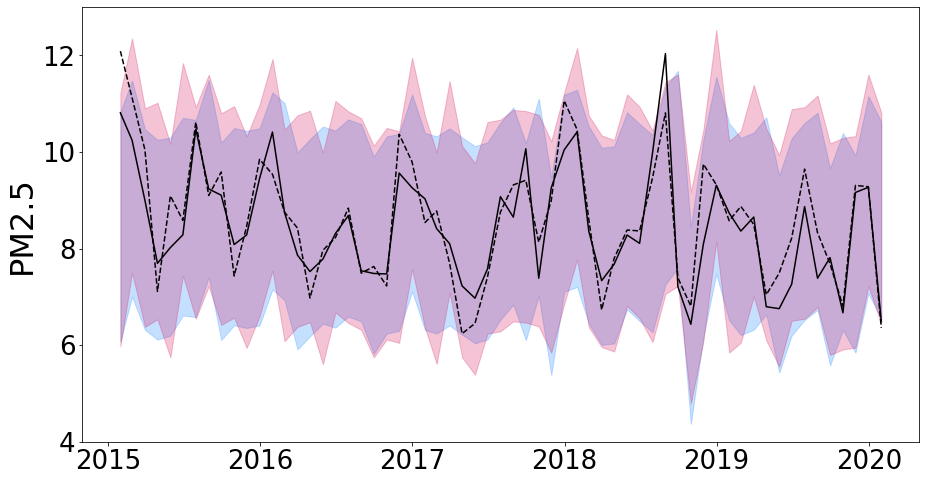

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
from sklearn import metrics
register_matplotlib_converters()

pm25 = pd.read_csv('/content/drive/MyDrive/COVID19_Cities/Data/timeseries data/pm25_timeseries_data.csv')

rdata = whole_data

type0_list = rdata[rdata['type'] == 0]['fips'].tolist()
type0_list = [e for e in type0_list if e not in ['35045', '17163', '48139', '16001', '22019']]

type1_list = rdata[rdata['type'] == 1]['fips'].tolist()
type1_list = [e for e in type1_list if e not in ['23011', '45079', '26065', '41051', '13121', '26139', '36029', '05119', '51087', '45019', '36103', '34027']]

pm25type0 = pm25[type0_list]
pm25type0['Date Local'] = pm25['Date Local']
groupedpm25type0 = pm25type0.groupby('Date Local').mean()
groupedpm25type0 = groupedpm25type0.mean(axis=1)

pm25type1 = pm25[type1_list]
pm25type1['Date Local'] = pm25['Date Local']
groupedpm25type1 = pm25type1.groupby('Date Local').mean()
groupedpm25type1 = groupedpm25type1.mean(axis=1)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
avgclust['values'] = groupedpm25type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Just an ARMA(p,q) model
model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
print(results1.summary())
epiact = avgclust
plt.figure(figsize = (15,8))
plt.plot(avgclust.index, avgclust['values'], color='black')
# plt.plot(results1.get_prediction().predicted_mean, color='red')
# print(results1.summary())
resultdf = results1.get_prediction(start=0).conf_int()

print('type0 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
print('type0 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
print('type0 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#1A85FF", 
                  alpha=0.25)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
avgclust['values'] = groupedpm25type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Just an ARMA(p,q) model
model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
print(results1.summary())
epiact = avgclust
plt.plot(avgclust.index, avgclust['values'], color='black', linestyle='dashed')
# plt.plot(results1.get_prediction().predicted_mean, color='orange')
# print(results1.summary())
resultdf = results1.get_prediction(start=0).conf_int()

print('type1 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
print('type1 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
print('type1 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#D41159", 
                  alpha=0.25)

plt.ylabel('PM2.5', fontsize = 32)
plt.tick_params(axis='both', labelsize = 26)

plt.ylim(4,13)

plt.savefig("arima_pm25_allyear.svg", format="svg")
plt.savefig("arima_pm25_allyear.png", format="png")
# files.download("arima_pm25.svg")

plt.show()

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# aic_bic = pd.DataFrame(columns=['p,d,q', 'aic', 'bic'])
# pdq = []
# aic = []
# bic = []
# log = []

# avgclust = pd.DataFrame()
# avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
# avgclust['values'] = groupedpm25type0.values.tolist()
# avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

# for p in range(0,4):
#   for d in range(0,4):
#     for q in range(0,4):
#       try:
#         model = SARIMAX(avgclust['values'], order=(p,d,q), trend='c', seasonal_order = (p,d,q, 4))
#         results = model.fit()
#         pdq.append(str(p) + ',' + str(d) + ',' + str(q))
#         aic.append(results.aic)
#         bic.append(results.bic)
#         log.append(results.llf_obs.sum())
#       except:
#         print(str(p) + ',' + str(d) + ',' + str(q))

# aic_bic['p,d,q'] = pdq
# aic_bic['aic'] = aic
# aic_bic['bic'] = bic
# aic_bic['log'] = log
# aic_bic.to_csv('pm25_allyear_zoneA_pdq.csv')
# aic_bic1 = aic_bic.copy()

# from statsmodels.tsa.statespace.sarimax import SARIMAX
# aic_bic = pd.DataFrame(columns=['p,d,q', 'aic', 'bic'])
# pdq = []
# aic = []
# bic = []
# log = []

# avgclust = pd.DataFrame()
# avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
# avgclust['values'] = groupedpm25type1.values.tolist()
# avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

# for p in range(0,4):
#   for d in range(0,4):
#     for q in range(0,4):
#       try:
#         model = SARIMAX(avgclust['values'], order=(p,d,q), trend='c', seasonal_order = (p,d,q, 4))
#         results = model.fit()
#         pdq.append(str(p) + ',' + str(d) + ',' + str(q))
#         aic.append(results.aic)
#         bic.append(results.bic)
#         log.append(results.llf_obs.sum())
#       except:
#         print(str(p) + ',' + str(d) + ',' + str(q))

# aic_bic['p,d,q'] = pdq
# aic_bic['aic'] = aic
# aic_bic['bic'] = bic
# aic_bic['log'] = log
# aic_bic.to_csv('pm25_allyear_zoneB_pdq.csv')
# aic_bic2 = aic_bic.copy()

pm2.5 Allyear Ttest_indResult(statistic=-0.6264297872932115, pvalue=0.5322229200785441)


<function matplotlib.pyplot.show>

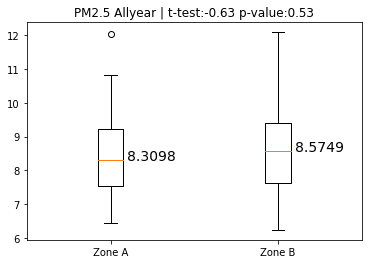

In [ ]:
avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
avgclust['values'] = groupedpm25type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

za = avgclust['values'].tolist()

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
avgclust['values'] = groupedpm25type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

zb = avgclust['values'].tolist()

print('pm2.5 Allyear', ttest_ind(za, zb))

plt.boxplot({'Zone A': za, 'Zone B': zb}.values())
plt.xticks(ticks=[1,2],labels=['Zone A', 'Zone B'])

mza = np.quantile(za, 0.5)
plt.text(1+0.1, mza, str(round(mza,4)), fontsize =14)
mzb = np.quantile(zb, 0.5)
plt.text(2+0.1, mzb, str(round(mzb,4)), fontsize =14)

plt.title('PM2.5 Allyear' + ' | t-test:' + str(np.round(ttest_ind(za, zb)[0],2)) + ' p-value:' + str(np.round(ttest_ind(za, zb)[1],2)))
plt.savefig("PM25_allyear.png", format="png")
plt.show

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                                 Statespace Model Results                                
Dep. Variable:                            values   No. Observations:                   61
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 4)   Log Likelihood                 -84.018
Date:                           Tue, 22 Mar 2022   AIC                            180.037
Time:                                   16:39:10   BIC                            192.702
Sample:                               01-31-2015   HQIC                           185.000
                                    - 01-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.2315      1.723      2.455      0.014       0.854       7.609
ar.L1          1.3164      0.128     10.250

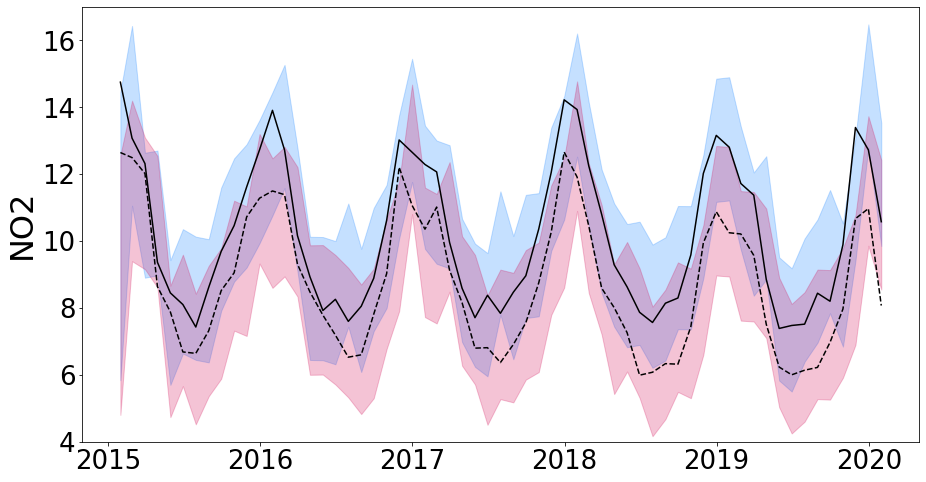

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
from sklearn import metrics
register_matplotlib_converters()

pm25 = pd.read_csv('/content/drive/MyDrive/COVID19_Cities/Data/timeseries data/no2_timeseries_data.csv')

rdata = whole_data

type0_list = rdata[rdata['type'] == 0]['fips'].tolist()
# type0_list = [e for e in type0_list if e not in ['35045', '17163', '48139', '16001', '22019']]

type1_list = rdata[rdata['type'] == 1]['fips'].tolist()
# type1_list = [e for e in type1_list if e not in ['23011', '45079', '26065', '41051', '13121', '26139', '36029', '05119', '51087', '45019', '36103', '34027']]

pm25type0 = pm25[type0_list]
pm25type0['Date Local'] = pm25['Date Local']
groupedpm25type0 = pm25type0.groupby('Date Local').mean()
groupedpm25type0 = groupedpm25type0.mean(axis=1)

pm25type1 = pm25[type1_list]
pm25type1['Date Local'] = pm25['Date Local']
groupedpm25type1 = pm25type1.groupby('Date Local').mean()
groupedpm25type1 = groupedpm25type1.mean(axis=1)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
avgclust['values'] = groupedpm25type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Just an ARMA(p,q) model
model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
print(results1.summary())
epiact = avgclust
plt.figure(figsize = (15,8))
plt.plot(avgclust.index, avgclust['values'], color='black')
# plt.plot(results1.get_prediction().predicted_mean, color='red')
# print(results1.summary())
resultdf = results1.get_prediction(start=0).conf_int()

print('type0 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
print('type0 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
print('type0 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#1A85FF", 
                  alpha=0.25)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
avgclust['values'] = groupedpm25type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Just an ARMA(p,q) model
model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
print(results1.summary())
epiact = avgclust
plt.plot(avgclust.index, avgclust['values'], color='black', linestyle='dashed')
# plt.plot(results1.get_prediction().predicted_mean, color='orange')
# print(results1.summary())
resultdf = results1.get_prediction(start=0).conf_int()

print('type1 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
print('type1 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
print('type1 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#D41159", 
                  alpha=0.25)

plt.ylabel('NO2', fontsize = 32)
plt.tick_params(axis='both', labelsize = 26)
plt.ylim(4,17)

plt.savefig("arima_no2_allyear.svg", format="svg")
plt.savefig("arima_no2_allyear.png", format="png")
# files.download("arima_pm25.svg")

plt.show()

NO2 Allyear Ttest_indResult(statistic=3.817086914727839, pvalue=0.00021506766097549303)


<function matplotlib.pyplot.show>

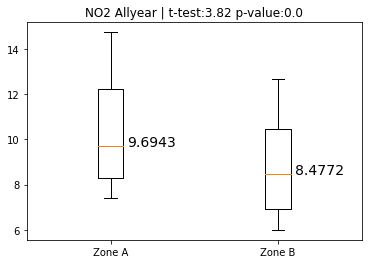

In [ ]:
avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
avgclust['values'] = groupedpm25type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

za = avgclust['values'].tolist()

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
avgclust['values'] = groupedpm25type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

zb = avgclust['values'].tolist()

print('NO2 Allyear', ttest_ind(za, zb))

plt.boxplot({'Zone A': za, 'Zone B': zb}.values())
plt.xticks(ticks=[1,2],labels=['Zone A', 'Zone B'])

mza = np.quantile(za, 0.5)
plt.text(1+0.1, mza, str(round(mza,4)), fontsize =14)
mzb = np.quantile(zb, 0.5)
plt.text(2+0.1, mzb, str(round(mzb,4)), fontsize =14)

plt.title('NO2 Allyear' + ' | t-test:' + str(np.round(ttest_ind(za, zb)[0],2)) + ' p-value:' + str(np.round(ttest_ind(za, zb)[1],2)))
plt.savefig("NO2_allyear.png", format="png")
plt.show

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# aic_bic = pd.DataFrame(columns=['p,d,q', 'aic', 'bic'])
# pdq = []
# aic = []
# bic = []
# log = []

# avgclust = pd.DataFrame()
# avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
# avgclust['values'] = groupedpm25type0.values.tolist()
# avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

# for p in range(0,4):
#   for d in range(0,4):
#     for q in range(0,4):
#       try:
#         model = SARIMAX(avgclust['values'], order=(p,d,q), trend='c', seasonal_order = (p,d,q, 4))
#         results = model.fit()
#         pdq.append(str(p) + ',' + str(d) + ',' + str(q))
#         aic.append(results.aic)
#         bic.append(results.bic)
#         log.append(results.llf_obs.sum())
#       except:
#         print(str(p) + ',' + str(d) + ',' + str(q))

# aic_bic['p,d,q'] = pdq
# aic_bic['aic'] = aic
# aic_bic['bic'] = bic
# aic_bic['log'] = log
# aic_bic.to_csv('no2_allyear_zoneA_pdq.csv')
# aic_bic1 = aic_bic.copy()

# from statsmodels.tsa.statespace.sarimax import SARIMAX
# aic_bic = pd.DataFrame(columns=['p,d,q', 'aic', 'bic'])
# pdq = []
# aic = []
# bic = []
# log = []

# avgclust = pd.DataFrame()
# avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
# avgclust['values'] = groupedpm25type1.values.tolist()
# avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

# for p in range(0,4):
#   for d in range(0,4):
#     for q in range(0,4):
#       try:
#         model = SARIMAX(avgclust['values'], order=(p,d,q), trend='c', seasonal_order = (p,d,q, 4))
#         results = model.fit()
#         pdq.append(str(p) + ',' + str(d) + ',' + str(q))
#         aic.append(results.aic)
#         bic.append(results.bic)
#         log.append(results.llf_obs.sum())
#       except:
#         print(str(p) + ',' + str(d) + ',' + str(q))

# aic_bic['p,d,q'] = pdq
# aic_bic['aic'] = aic
# aic_bic['bic'] = bic
# aic_bic['log'] = log
# aic_bic.to_csv('no2_allyear_zoneB_pdq.csv')
# aic_bic2 = aic_bic.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                
Dep. Variable:                            values   No. Observations:                   61
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 4)   Log Likelihood                  66.400
Date:                           Tue, 22 Mar 2022   AIC                           -120.799
Time:                                   16:39:14   BIC                           -108.134
Sample:                               01-31-2015   HQIC                          -115.835
                                    - 01-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0362      0.030      1.213      0.225      -0.022       0.095
ar.L1          0.8603      0.163      5.272

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                
Dep. Variable:                            values   No. Observations:                   61
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 4)   Log Likelihood                  54.113
Date:                           Tue, 22 Mar 2022   AIC                            -96.226
Time:                                   16:39:15   BIC                            -83.561
Sample:                               01-31-2015   HQIC                           -91.262
                                    - 01-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0750      0.045      1.651      0.099      -0.014       0.164
ar.L1          0.8883      0.110      8.066

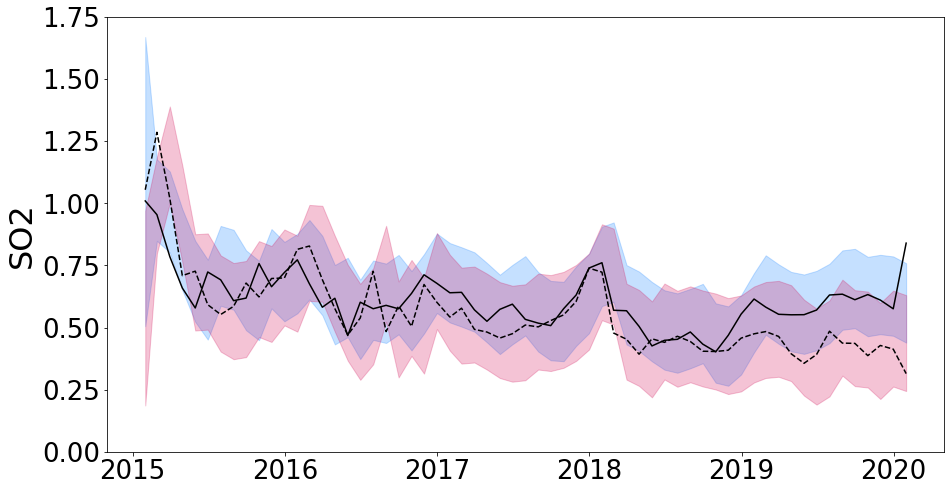

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
from sklearn import metrics
register_matplotlib_converters()

pm25 = pd.read_csv('/content/drive/MyDrive/COVID19_Cities/Data/timeseries data/so2_timeseries_data.csv')

rdata = whole_data

type0_list = rdata[rdata['type'] == 0]['fips'].tolist()
# type0_list = [e for e in type0_list if e not in ['35045', '17163', '48139', '16001', '22019']]

type1_list = rdata[rdata['type'] == 1]['fips'].tolist()
# type1_list = [e for e in type1_list if e not in ['23011', '45079', '26065', '41051', '13121', '26139', '36029', '05119', '51087', '45019', '36103', '34027']]

pm25type0 = pm25[type0_list]
pm25type0['Date Local'] = pm25['Date Local']
groupedpm25type0 = pm25type0.groupby('Date Local').mean()
groupedpm25type0 = groupedpm25type0.mean(axis=1)

pm25type1 = pm25[type1_list]
pm25type1['Date Local'] = pm25['Date Local']
groupedpm25type1 = pm25type1.groupby('Date Local').mean()
groupedpm25type1 = groupedpm25type1.mean(axis=1)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
avgclust['values'] = groupedpm25type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Just an ARMA(p,q) model
model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
print(results1.summary())
epiact = avgclust
plt.figure(figsize = (15,8))
plt.plot(avgclust.index, avgclust['values'], color='black')
# plt.plot(results1.get_prediction().predicted_mean, color='red')
# print(results1.summary())
resultdf = results1.get_prediction(start=0).conf_int()

print('type0 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
print('type0 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
print('type0 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#1A85FF", 
                  alpha=0.25)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
avgclust['values'] = groupedpm25type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Just an ARMA(p,q) model
model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
print(results1.summary())
epiact = avgclust
plt.plot(avgclust.index, avgclust['values'], color='black', linestyle='dashed')
# plt.plot(results1.get_prediction().predicted_mean, color='orange')
# print(results1.summary())
resultdf = results1.get_prediction(start=0).conf_int()

print('type1 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
print('type1 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
print('type1 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#D41159", 
                  alpha=0.25)

plt.ylabel('SO2', fontsize = 32)
plt.tick_params(axis='both', labelsize = 26)
plt.ylim(0.0,1.75)

plt.savefig("arima_so2_allyear.svg", format="svg")
plt.savefig("arima_so2_allyear.png", format="png")
# files.download("arima_pm25.svg")

plt.show()

SO2 Allyear Ttest_indResult(statistic=1.9229380262003453, pvalue=0.056857411288733284)


<function matplotlib.pyplot.show>

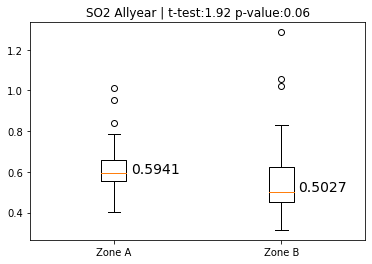

In [ ]:
avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
avgclust['values'] = groupedpm25type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

za = avgclust['values'].tolist()

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
avgclust['values'] = groupedpm25type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

zb = avgclust['values'].tolist()

print('SO2 Allyear', ttest_ind(za, zb))

plt.boxplot({'Zone A': za, 'Zone B': zb}.values())
plt.xticks(ticks=[1,2],labels=['Zone A', 'Zone B'])

mza = np.quantile(za, 0.5)
plt.text(1+0.1, mza, str(round(mza,4)), fontsize =14)
mzb = np.quantile(zb, 0.5)
plt.text(2+0.1, mzb, str(round(mzb,4)), fontsize =14)

plt.title('SO2 Allyear' + ' | t-test:' + str(np.round(ttest_ind(za, zb)[0],2)) + ' p-value:' + str(np.round(ttest_ind(za, zb)[1],2)))
plt.savefig("SO2_allyear.png", format="png")
plt.show

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# aic_bic = pd.DataFrame(columns=['p,d,q', 'aic', 'bic'])
# pdq = []
# aic = []
# bic = []
# log = []

# avgclust = pd.DataFrame()
# avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
# avgclust['values'] = groupedpm25type0.values.tolist()
# avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

# for p in range(0,4):
#   for d in range(0,4):
#     for q in range(0,4):
#       try:
#         model = SARIMAX(avgclust['values'], order=(p,d,q), trend='c', seasonal_order = (p,d,q, 4))
#         results = model.fit()
#         pdq.append(str(p) + ',' + str(d) + ',' + str(q))
#         aic.append(results.aic)
#         bic.append(results.bic)
#         log.append(results.llf_obs.sum())
#       except:
#         print(str(p) + ',' + str(d) + ',' + str(q))

# aic_bic['p,d,q'] = pdq
# aic_bic['aic'] = aic
# aic_bic['bic'] = bic
# aic_bic['log'] = log
# aic_bic.to_csv('so2_allyear_zoneA_pdq.csv')
# aic_bic1 = aic_bic.copy()

# from statsmodels.tsa.statespace.sarimax import SARIMAX
# aic_bic = pd.DataFrame(columns=['p,d,q', 'aic', 'bic'])
# pdq = []
# aic = []
# bic = []
# log = []

# avgclust = pd.DataFrame()
# avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
# avgclust['values'] = groupedpm25type1.values.tolist()
# avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

# for p in range(0,4):
#   for d in range(0,4):
#     for q in range(0,4):
#       try:
#         model = SARIMAX(avgclust['values'], order=(p,d,q), trend='c', seasonal_order = (p,d,q, 4))
#         results = model.fit()
#         pdq.append(str(p) + ',' + str(d) + ',' + str(q))
#         aic.append(results.aic)
#         bic.append(results.bic)
#         log.append(results.llf_obs.sum())
#       except:
#         print(str(p) + ',' + str(d) + ',' + str(q))

# aic_bic['p,d,q'] = pdq
# aic_bic['aic'] = aic
# aic_bic['bic'] = bic
# aic_bic['log'] = log
# aic_bic.to_csv('so2_allyear_zoneB_pdq.csv')
# aic_bic2 = aic_bic.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                 Statespace Model Results                                
Dep. Variable:                            values   No. Observations:                   61
Model:             SARIMAX(3, 0, 0)x(3, 0, 0, 4)   Log Likelihood                 288.265
Date:                           Tue, 22 Mar 2022   AIC                           -560.530
Time:                                   16:39:17   BIC                           -543.643
Sample:                               01-31-2015   HQIC                          -553.912
                                    - 01-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0120      0.005      2.621      0.009       0.003       0.021
ar.L1          1.2779      0.185      6.909

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                 Statespace Model Results                                
Dep. Variable:                            values   No. Observations:                   61
Model:             SARIMAX(3, 0, 0)x(3, 0, 0, 4)   Log Likelihood                 275.706
Date:                           Tue, 22 Mar 2022   AIC                           -535.412
Time:                                   16:39:18   BIC                           -518.525
Sample:                               01-31-2015   HQIC                          -528.794
                                    - 01-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0134      0.005      2.481      0.013       0.003       0.024
ar.L1          1.0606      0.163      6.498

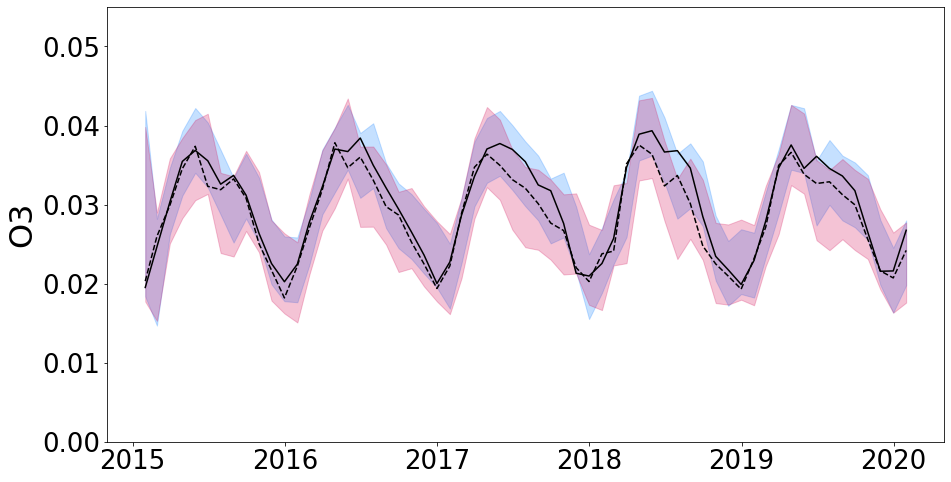

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
from sklearn import metrics
register_matplotlib_converters()

pm25 = pd.read_csv('/content/drive/MyDrive/COVID19_Cities/Data/timeseries data/ozone_timeseries_data.csv')

rdata = whole_data

type0_list = rdata[rdata['type'] == 0]['fips'].tolist()
# type0_list = [e for e in type0_list if e not in ['35045', '17163', '48139', '16001', '22019']]

type1_list = rdata[rdata['type'] == 1]['fips'].tolist()
# type1_list = [e for e in type1_list if e not in ['23011', '45079', '26065', '41051', '13121', '26139', '36029', '05119', '51087', '45019', '36103', '34027']]

pm25type0 = pm25[type0_list]
pm25type0['Date Local'] = pm25['Date Local']
groupedpm25type0 = pm25type0.groupby('Date Local').mean()
groupedpm25type0 = groupedpm25type0.mean(axis=1)

pm25type1 = pm25[type1_list]
pm25type1['Date Local'] = pm25['Date Local']
groupedpm25type1 = pm25type1.groupby('Date Local').mean()
groupedpm25type1 = groupedpm25type1.mean(axis=1)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
avgclust['values'] = groupedpm25type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Just an ARMA(p,q) model
model = SARIMAX(avgclust['values'], order=(3,0,0), trend='c', seasonal_order = (3, 0, 0, 4))
results1 = model.fit()
print(results1.summary())
epiact = avgclust
plt.figure(figsize = (15,8))
plt.plot(avgclust.index, avgclust['values'], color='black')
# plt.plot(results1.get_prediction().predicted_mean, color='red')
# print(results1.summary())
resultdf = results1.get_prediction(start=0).conf_int()

print('type0 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
print('type0 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
print('type0 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#1A85FF", 
                  alpha=0.25)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
avgclust['values'] = groupedpm25type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Just an ARMA(p,q) model
model = SARIMAX(avgclust['values'], order=(3,0,0), trend='c', seasonal_order = (3, 0, 0, 4))
results1 = model.fit()
print(results1.summary())
epiact = avgclust
plt.plot(avgclust.index, avgclust['values'], color='black', linestyle='dashed')
# plt.plot(results1.get_prediction().predicted_mean, color='orange')
# print(results1.summary())
resultdf = results1.get_prediction(start=0).conf_int()

print('type1 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
print('type1 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
print('type1 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#D41159", 
                  alpha=0.25)

plt.ylabel('O3', fontsize = 32)
plt.tick_params(axis='both', labelsize = 26)
plt.ylim(0.00,0.055)

plt.savefig("arima_o3_allyear.svg", format="svg")
plt.savefig("arima_o3_allyear.png", format="png")
# files.download("arima_pm25.svg")

plt.show()

O3 Allyear Ttest_indResult(statistic=1.1544715947567392, pvalue=0.2506007770490264)


<function matplotlib.pyplot.show>

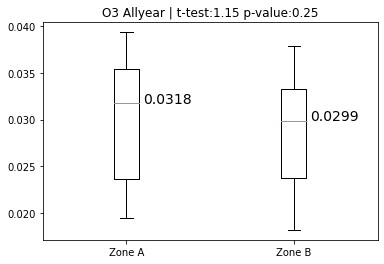

In [ ]:
avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
avgclust['values'] = groupedpm25type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

za = avgclust['values'].tolist()

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
avgclust['values'] = groupedpm25type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

zb = avgclust['values'].tolist()

print('O3 Allyear', ttest_ind(za, zb))

plt.boxplot({'Zone A': za, 'Zone B': zb}.values())
plt.xticks(ticks=[1,2],labels=['Zone A', 'Zone B'])

mza = np.quantile(za, 0.5)
plt.text(1+0.1, mza, str(round(mza,4)), fontsize =14)
mzb = np.quantile(zb, 0.5)
plt.text(2+0.1, mzb, str(round(mzb,4)), fontsize =14)

plt.title('O3 Allyear' + ' | t-test:' + str(np.round(ttest_ind(za, zb)[0],2)) + ' p-value:' + str(np.round(ttest_ind(za, zb)[1],2)))
plt.savefig("O3_allyear.png", format="png")
plt.show

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# aic_bic = pd.DataFrame(columns=['p,d,q', 'aic', 'bic'])
# pdq = []
# aic = []
# bic = []
# log = []

# avgclust = pd.DataFrame()
# avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
# avgclust['values'] = groupedpm25type0.values.tolist()
# avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

# for p in range(0,4):
#   for d in range(0,4):
#     for q in range(0,4):
#       try:
#         model = SARIMAX(avgclust['values'], order=(p,d,q), trend='c', seasonal_order = (p,d,q, 4))
#         results = model.fit()
#         pdq.append(str(p) + ',' + str(d) + ',' + str(q))
#         aic.append(results.aic)
#         bic.append(results.bic)
#         log.append(results.llf_obs.sum())
#       except:
#         print(str(p) + ',' + str(d) + ',' + str(q))

# aic_bic['p,d,q'] = pdq
# aic_bic['aic'] = aic
# aic_bic['bic'] = bic
# aic_bic['log'] = log
# aic_bic.to_csv('o3_allyear_zoneA_pdq.csv')
# aic_bic1 = aic_bic.copy()

# from statsmodels.tsa.statespace.sarimax import SARIMAX
# aic_bic = pd.DataFrame(columns=['p,d,q', 'aic', 'bic'])
# pdq = []
# aic = []
# bic = []
# log = []

# avgclust = pd.DataFrame()
# avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
# avgclust['values'] = groupedpm25type1.values.tolist()
# avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

# for p in range(0,4):
#   for d in range(0,4):
#     for q in range(0,4):
#       try:
#         model = SARIMAX(avgclust['values'], order=(p,d,q), trend='c', seasonal_order = (p,d,q, 4))
#         results = model.fit()
#         pdq.append(str(p) + ',' + str(d) + ',' + str(q))
#         aic.append(results.aic)
#         bic.append(results.bic)
#         log.append(results.llf_obs.sum())
#       except:
#         print(str(p) + ',' + str(d) + ',' + str(q))

# aic_bic['p,d,q'] = pdq
# aic_bic['aic'] = aic
# aic_bic['bic'] = bic
# aic_bic['log'] = log
# aic_bic.to_csv('o3_allyear_zoneB_pdq.csv')
# aic_bic2 = aic_bic.copy()

#### Wave1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                                 Statespace Model Results                                
Dep. Variable:                            values   No. Observations:                   61
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 4)   Log Likelihood                 -95.264
Date:                           Tue, 22 Mar 2022   AIC                            202.528
Time:                                   16:39:21   BIC                            215.194
Sample:                               01-31-2015   HQIC                           207.492
                                    - 01-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.5035      1.756      2.564      0.010       1.061       7.946
ar.L1          0.6537      0.171      3.823

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                
Dep. Variable:                            values   No. Observations:                   61
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 4)   Log Likelihood                 -92.877
Date:                           Tue, 22 Mar 2022   AIC                            197.754
Time:                                   16:39:22   BIC                            210.420
Sample:                               01-31-2015   HQIC                           202.718
                                    - 01-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.8837      2.411      2.441      0.015       1.159      10.608
ar.L1          0.4325      0.140      3.096

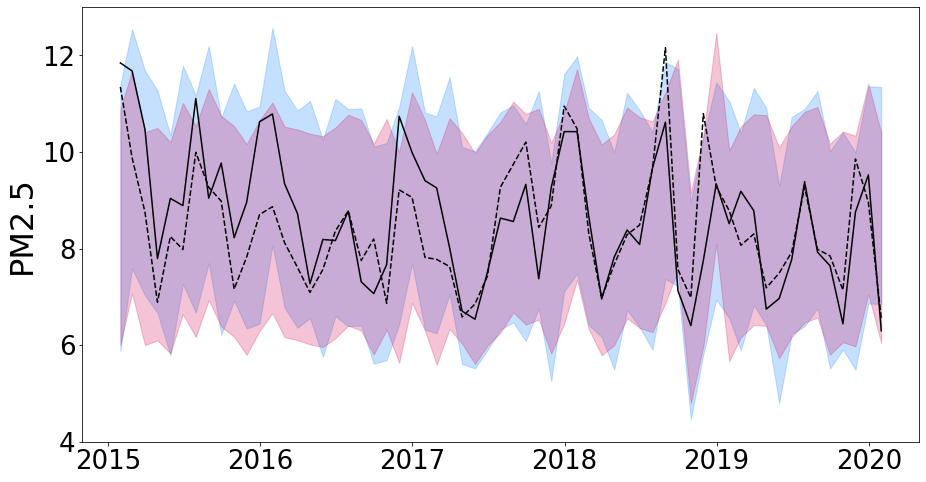

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
from sklearn import metrics
register_matplotlib_converters()

pm25 = pd.read_csv('/content/drive/MyDrive/COVID19_Cities/Data/timeseries data/pm25_timeseries_data.csv')

rdata = wave1_data

type0_list = rdata[rdata['type'] == 0]['fips'].tolist()
type0_list = [e for e in type0_list if e not in ['35045', '45079', '17163', '36029', '51087', '45019', '36103', '34027']]

type1_list = rdata[rdata['type'] == 1]['fips'].tolist()
type1_list = [e for e in type1_list if e not in ['23011', '26065', '13121', '26139', '05119', '48139', '16001', '22019', '41051']]

pm25type0 = pm25[type0_list]
pm25type0['Date Local'] = pm25['Date Local']
groupedpm25type0 = pm25type0.groupby('Date Local').mean()
groupedpm25type0 = groupedpm25type0.mean(axis=1)

pm25type1 = pm25[type1_list]
pm25type1['Date Local'] = pm25['Date Local']
groupedpm25type1 = pm25type1.groupby('Date Local').mean()
groupedpm25type1 = groupedpm25type1.mean(axis=1)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
avgclust['values'] = groupedpm25type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Just an ARMA(p,q) model
model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
print(results1.summary())
epiact = avgclust
plt.figure(figsize = (15,8))
plt.plot(avgclust.index, avgclust['values'], color='black')
# plt.plot(results1.get_prediction().predicted_mean, color='red')
# print(results1.summary())
resultdf = results1.get_prediction(start=0).conf_int()

print('type0 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
print('type0 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
print('type0 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

# plt.plot(resultdf.index, resultdf['lower values'], color='grey')
# plt.plot(resultdf.index, resultdf['upper values'], color='grey')
plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#1A85FF", 
                  alpha=0.25)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
avgclust['values'] = groupedpm25type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Just an ARMA(p,q) model
model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
print(results1.summary())
epiact = avgclust
plt.plot(avgclust.index, avgclust['values'], color='black', linestyle='dashed')
# plt.plot(results1.get_prediction().predicted_mean, color='orange')
# print(results1.summary())
resultdf = results1.get_prediction(start=0).conf_int()

print('type1 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
print('type1 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
print('type1 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

# plt.plot(resultdf.index, resultdf['lower values'], color='grey', linestyle='dashed')
# plt.plot(resultdf.index, resultdf['upper values'], color='grey', linestyle='dashed')
plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#D41159", 
                  alpha=0.25)

plt.ylabel('PM2.5', fontsize = 32)
plt.tick_params(axis='both', labelsize = 26)
plt.ylim(4,13)

plt.savefig("arima_pm25_wave1.svg", format="svg")
plt.savefig("arima_pm25_wave1.png", format="png")
# files.download("arima_pm25.svg")

plt.show()

PM25 Allyear Ttest_indResult(statistic=0.8050102845276873, pvalue=0.4224058791893279)


<function matplotlib.pyplot.show>

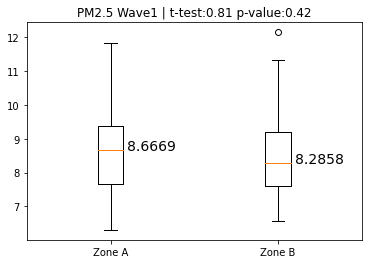

In [ ]:
avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
avgclust['values'] = groupedpm25type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

za = avgclust['values'].tolist()

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
avgclust['values'] = groupedpm25type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

zb = avgclust['values'].tolist()

print('PM25 Allyear', ttest_ind(za, zb))

plt.boxplot({'Zone A': za, 'Zone B': zb}.values())
plt.xticks(ticks=[1,2],labels=['Zone A', 'Zone B'])

mza = np.quantile(za, 0.5)
plt.text(1+0.1, mza, str(round(mza,4)), fontsize =14)
mzb = np.quantile(zb, 0.5)
plt.text(2+0.1, mzb, str(round(mzb,4)), fontsize =14)

plt.title('PM2.5 Wave1' + ' | t-test:' + str(np.round(ttest_ind(za, zb)[0],2)) + ' p-value:' + str(np.round(ttest_ind(za, zb)[1],2)))
plt.savefig("PM25_wave1.png", format="png")
plt.show

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# aic_bic = pd.DataFrame(columns=['p,d,q', 'aic', 'bic'])
# pdq = []
# aic = []
# bic = []
# log = []

# avgclust = pd.DataFrame()
# avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
# avgclust['values'] = groupedpm25type0.values.tolist()
# avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

# for p in range(0,4):
#   for d in range(0,4):
#     for q in range(0,4):
#       try:
#         model = SARIMAX(avgclust['values'], order=(p,d,q), trend='c', seasonal_order = (p,d,q, 4))
#         results = model.fit()
#         pdq.append(str(p) + ',' + str(d) + ',' + str(q))
#         aic.append(results.aic)
#         bic.append(results.bic)
#         log.append(results.llf_obs.sum())
#       except:
#         print(str(p) + ',' + str(d) + ',' + str(q))

# aic_bic['p,d,q'] = pdq
# aic_bic['aic'] = aic
# aic_bic['bic'] = bic
# aic_bic['log'] = log
# aic_bic.to_csv('pm25_wave1_zoneA_pdq.csv')
# aic_bic1 = aic_bic.copy()

# from statsmodels.tsa.statespace.sarimax import SARIMAX
# aic_bic = pd.DataFrame(columns=['p,d,q', 'aic', 'bic'])
# pdq = []
# aic = []
# bic = []
# log = []

# avgclust = pd.DataFrame()
# avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
# avgclust['values'] = groupedpm25type1.values.tolist()
# avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

# for p in range(0,4):
#   for d in range(0,4):
#     for q in range(0,4):
#       try:
#         model = SARIMAX(avgclust['values'], order=(p,d,q), trend='c', seasonal_order = (p,d,q, 4))
#         results = model.fit()
#         pdq.append(str(p) + ',' + str(d) + ',' + str(q))
#         aic.append(results.aic)
#         bic.append(results.bic)
#         log.append(results.llf_obs.sum())
#       except:
#         print(str(p) + ',' + str(d) + ',' + str(q))

# aic_bic['p,d,q'] = pdq
# aic_bic['aic'] = aic
# aic_bic['bic'] = bic
# aic_bic['log'] = log
# aic_bic.to_csv('pm25_wave1_zoneB_pdq.csv')
# aic_bic2 = aic_bic.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                                 Statespace Model Results                                
Dep. Variable:                            values   No. Observations:                   61
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 4)   Log Likelihood                 -87.627
Date:                           Tue, 22 Mar 2022   AIC                            187.254
Time:                                   16:39:24   BIC                            199.919
Sample:                               01-31-2015   HQIC                           192.218
                                    - 01-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.8471      1.454      2.645      0.008       0.997       6.697
ar.L1          1.3158      0.118     11.193

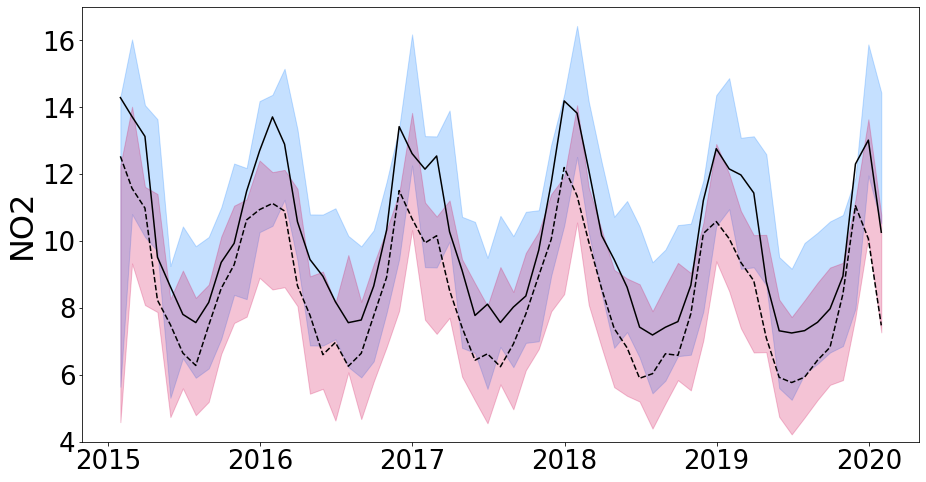

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
from sklearn import metrics
register_matplotlib_converters()

pm25 = pd.read_csv('/content/drive/MyDrive/COVID19_Cities/Data/timeseries data/no2_timeseries_data.csv')

rdata = wave1_data

type0_list = rdata[rdata['type'] == 0]['fips'].tolist()
# type0_list = [e for e in type0_list if e not in ['35045', '17163', '48139', '16001', '22019']]

type1_list = rdata[rdata['type'] == 1]['fips'].tolist()
# type1_list = [e for e in type1_list if e not in ['23011', '45079', '26065', '41051', '13121', '26139', '36029', '05119', '51087', '45019', '36103', '34027']]

pm25type0 = pm25[type0_list]
pm25type0['Date Local'] = pm25['Date Local']
groupedpm25type0 = pm25type0.groupby('Date Local').mean()
groupedpm25type0 = groupedpm25type0.mean(axis=1)

pm25type1 = pm25[type1_list]
pm25type1['Date Local'] = pm25['Date Local']
groupedpm25type1 = pm25type1.groupby('Date Local').mean()
groupedpm25type1 = groupedpm25type1.mean(axis=1)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
avgclust['values'] = groupedpm25type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Just an ARMA(p,q) model
model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
print(results1.summary())
epiact = avgclust
plt.figure(figsize = (15,8))
plt.plot(avgclust.index, avgclust['values'], color='black')
# plt.plot(results1.get_prediction().predicted_mean, color='red')
# print(results1.summary())
resultdf = results1.get_prediction(start=0).conf_int()

print('type0 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
print('type0 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
print('type0 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#1A85FF", 
                  alpha=0.25)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
avgclust['values'] = groupedpm25type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Just an ARMA(p,q) model
model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
print(results1.summary())
epiact = avgclust
plt.plot(avgclust.index, avgclust['values'], color='black', linestyle='dashed')
# plt.plot(results1.get_prediction().predicted_mean, color='orange')
# print(results1.summary())
resultdf = results1.get_prediction(start=0).conf_int()

print('type1 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
print('type1 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
print('type1 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#D41159", 
                  alpha=0.25)

plt.ylabel('NO2', fontsize = 32)
plt.tick_params(axis='both', labelsize = 26)
plt.ylim(4,17)

plt.savefig("arima_no2_wave1.svg", format="svg")
plt.savefig("arima_no2_wave1.png", format="png")
# files.download("arima_pm25.svg")

plt.show()

NO2 Wave1 Ttest_indResult(statistic=4.170062655379892, pvalue=5.782576240882869e-05)


<function matplotlib.pyplot.show>

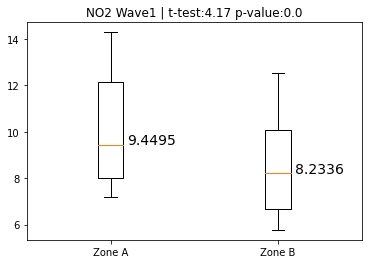

In [ ]:
avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
avgclust['values'] = groupedpm25type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

za = avgclust['values'].tolist()

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
avgclust['values'] = groupedpm25type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

zb = avgclust['values'].tolist()

print('NO2 Wave1', ttest_ind(za, zb))

plt.boxplot({'Zone A': za, 'Zone B': zb}.values())
plt.xticks(ticks=[1,2],labels=['Zone A', 'Zone B'])

mza = np.quantile(za, 0.5)
plt.text(1+0.1, mza, str(round(mza,4)), fontsize =14)
mzb = np.quantile(zb, 0.5)
plt.text(2+0.1, mzb, str(round(mzb,4)), fontsize =14)

plt.title('NO2 Wave1' + ' | t-test:' + str(np.round(ttest_ind(za, zb)[0],2)) + ' p-value:' + str(np.round(ttest_ind(za, zb)[1],2)))
plt.savefig("NO2_wave1.png", format="png")
plt.show

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# aic_bic = pd.DataFrame(columns=['p,d,q', 'aic', 'bic'])
# pdq = []
# aic = []
# bic = []
# log = []

# avgclust = pd.DataFrame()
# avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
# avgclust['values'] = groupedpm25type0.values.tolist()
# avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

# for p in range(0,4):
#   for d in range(0,4):
#     for q in range(0,4):
#       try:
#         model = SARIMAX(avgclust['values'], order=(p,d,q), trend='c', seasonal_order = (p,d,q, 4))
#         results = model.fit()
#         pdq.append(str(p) + ',' + str(d) + ',' + str(q))
#         aic.append(results.aic)
#         bic.append(results.bic)
#         log.append(results.llf_obs.sum())
#       except:
#         print(str(p) + ',' + str(d) + ',' + str(q))

# aic_bic['p,d,q'] = pdq
# aic_bic['aic'] = aic
# aic_bic['bic'] = bic
# aic_bic['log'] = log
# aic_bic.to_csv('no2_wave1_zoneA_pdq.csv')
# aic_bic1 = aic_bic.copy()

# from statsmodels.tsa.statespace.sarimax import SARIMAX
# aic_bic = pd.DataFrame(columns=['p,d,q', 'aic', 'bic'])
# pdq = []
# aic = []
# bic = []
# log = []

# avgclust = pd.DataFrame()
# avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
# avgclust['values'] = groupedpm25type1.values.tolist()
# avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

# for p in range(0,4):
#   for d in range(0,4):
#     for q in range(0,4):
#       try:
#         model = SARIMAX(avgclust['values'], order=(p,d,q), trend='c', seasonal_order = (p,d,q, 4))
#         results = model.fit()
#         pdq.append(str(p) + ',' + str(d) + ',' + str(q))
#         aic.append(results.aic)
#         bic.append(results.bic)
#         log.append(results.llf_obs.sum())
#       except:
#         print(str(p) + ',' + str(d) + ',' + str(q))

# aic_bic['p,d,q'] = pdq
# aic_bic['aic'] = aic
# aic_bic['bic'] = bic
# aic_bic['log'] = log
# aic_bic.to_csv('no2_wave1_zoneB_pdq.csv')
# aic_bic2 = aic_bic.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                
Dep. Variable:                            values   No. Observations:                   61
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 4)   Log Likelihood                  75.131
Date:                           Tue, 22 Mar 2022   AIC                           -138.261
Time:                                   16:39:29   BIC                           -125.596
Sample:                               01-31-2015   HQIC                          -133.297
                                    - 01-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1009      0.057      1.781      0.075      -0.010       0.212
ar.L1          1.0186      0.107      9.551

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                
Dep. Variable:                            values   No. Observations:                   61
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 4)   Log Likelihood                  56.506
Date:                           Tue, 22 Mar 2022   AIC                           -101.012
Time:                                   16:39:30   BIC                            -88.347
Sample:                               01-31-2015   HQIC                           -96.049
                                    - 01-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1294      0.058      2.233      0.026       0.016       0.243
ar.L1          0.9197      0.111      8.304

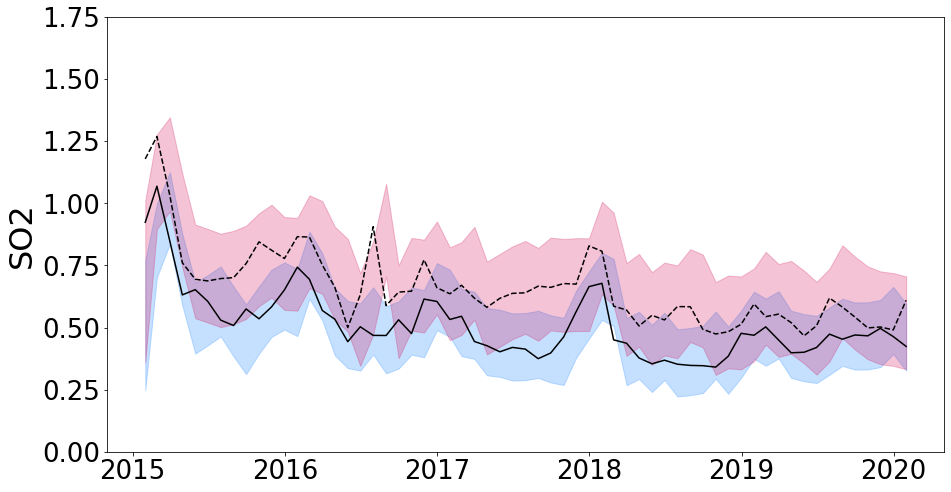

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
from sklearn import metrics
register_matplotlib_converters()

pm25 = pd.read_csv('/content/drive/MyDrive/COVID19_Cities/Data/timeseries data/so2_timeseries_data.csv')

rdata = wave1_data

type0_list = rdata[rdata['type'] == 0]['fips'].tolist()
# type0_list = [e for e in type0_list if e not in ['35045', '17163', '48139', '16001', '22019']]

type1_list = rdata[rdata['type'] == 1]['fips'].tolist()
# type1_list = [e for e in type1_list if e not in ['23011', '45079', '26065', '41051', '13121', '26139', '36029', '05119', '51087', '45019', '36103', '34027']]

pm25type0 = pm25[type0_list]
pm25type0['Date Local'] = pm25['Date Local']
groupedpm25type0 = pm25type0.groupby('Date Local').mean()
groupedpm25type0 = groupedpm25type0.mean(axis=1)

pm25type1 = pm25[type1_list]
pm25type1['Date Local'] = pm25['Date Local']
groupedpm25type1 = pm25type1.groupby('Date Local').mean()
groupedpm25type1 = groupedpm25type1.mean(axis=1)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
avgclust['values'] = groupedpm25type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Just an ARMA(p,q) model
model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
print(results1.summary())
epiact = avgclust
plt.figure(figsize = (15,8))
plt.plot(avgclust.index, avgclust['values'], color='black')
# plt.plot(results1.get_prediction().predicted_mean, color='red')
# print(results1.summary())
resultdf = results1.get_prediction(start=0).conf_int()

print('type0 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
print('type0 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
print('type0 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#1A85FF", 
                  alpha=0.25)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
avgclust['values'] = groupedpm25type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Just an ARMA(p,q) model
model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
print(results1.summary())
epiact = avgclust
plt.plot(avgclust.index, avgclust['values'], color='black', linestyle='dashed')
# plt.plot(results1.get_prediction().predicted_mean, color='orange')
# print(results1.summary())
resultdf = results1.get_prediction(start=0).conf_int()

print('type1 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
print('type1 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
print('type1 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#D41159", 
                  alpha=0.25)

plt.ylabel('SO2', fontsize = 32)
plt.tick_params(axis='both', labelsize = 26)
plt.ylim(0.0,1.75)

plt.savefig("arima_so2_wave1.svg", format="svg")
plt.savefig("arima_so2_wave1.png", format="png")
# files.download("arima_pm25.svg")

plt.show()

SO2 Wave1 Ttest_indResult(statistic=-5.489332929603376, pvalue=2.2872797906885341e-07)


<function matplotlib.pyplot.show>

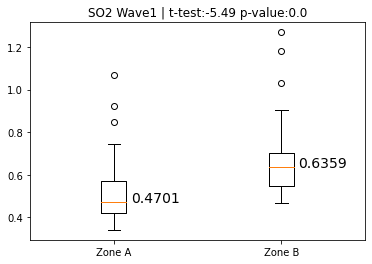

In [ ]:
avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
avgclust['values'] = groupedpm25type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

za = avgclust['values'].tolist()

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
avgclust['values'] = groupedpm25type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

zb = avgclust['values'].tolist()

print('SO2 Wave1', ttest_ind(za, zb))

plt.boxplot({'Zone A': za, 'Zone B': zb}.values())
plt.xticks(ticks=[1,2],labels=['Zone A', 'Zone B'])

mza = np.quantile(za, 0.5)
plt.text(1+0.1, mza, str(round(mza,4)), fontsize =14)
mzb = np.quantile(zb, 0.5)
plt.text(2+0.1, mzb, str(round(mzb,4)), fontsize =14)

plt.title('SO2 Wave1' + ' | t-test:' + str(np.round(ttest_ind(za, zb)[0],2)) + ' p-value:' + str(np.round(ttest_ind(za, zb)[1],2)))
plt.savefig("SO2_wave1.png", format="png")
plt.show

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# aic_bic = pd.DataFrame(columns=['p,d,q', 'aic', 'bic'])
# pdq = []
# aic = []
# bic = []
# log = []

# avgclust = pd.DataFrame()
# avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
# avgclust['values'] = groupedpm25type0.values.tolist()
# avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

# for p in range(0,4):
#   for d in range(0,4):
#     for q in range(0,4):
#       try:
#         model = SARIMAX(avgclust['values'], order=(p,d,q), trend='c', seasonal_order = (p,d,q, 4))
#         results = model.fit()
#         pdq.append(str(p) + ',' + str(d) + ',' + str(q))
#         aic.append(results.aic)
#         bic.append(results.bic)
#         log.append(results.llf_obs.sum())
#       except:
#         print(str(p) + ',' + str(d) + ',' + str(q))

# aic_bic['p,d,q'] = pdq
# aic_bic['aic'] = aic
# aic_bic['bic'] = bic
# aic_bic['log'] = log
# aic_bic.to_csv('so2_wave1_zoneA_pdq.csv')
# aic_bic1 = aic_bic.copy()

# from statsmodels.tsa.statespace.sarimax import SARIMAX
# aic_bic = pd.DataFrame(columns=['p,d,q', 'aic', 'bic'])
# pdq = []
# aic = []
# bic = []
# log = []

# avgclust = pd.DataFrame()
# avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
# avgclust['values'] = groupedpm25type1.values.tolist()
# avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

# for p in range(0,4):
#   for d in range(0,4):
#     for q in range(0,4):
#       try:
#         model = SARIMAX(avgclust['values'], order=(p,d,q), trend='c', seasonal_order = (p,d,q, 4))
#         results = model.fit()
#         pdq.append(str(p) + ',' + str(d) + ',' + str(q))
#         aic.append(results.aic)
#         bic.append(results.bic)
#         log.append(results.llf_obs.sum())
#       except:
#         print(str(p) + ',' + str(d) + ',' + str(q))

# aic_bic['p,d,q'] = pdq
# aic_bic['aic'] = aic
# aic_bic['bic'] = bic
# aic_bic['log'] = log
# aic_bic.to_csv('so2_wave1_zoneB_pdq.csv')
# aic_bic2 = aic_bic.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                 Statespace Model Results                                
Dep. Variable:                            values   No. Observations:                   61
Model:             SARIMAX(3, 0, 0)x(3, 0, 0, 4)   Log Likelihood                 278.700
Date:                           Tue, 22 Mar 2022   AIC                           -541.401
Time:                                   16:39:32   BIC                           -524.514
Sample:                               01-31-2015   HQIC                          -534.783
                                    - 01-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0130      0.005      2.675      0.007       0.003       0.022
ar.L1          1.1091      0.174      6.364

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                 Statespace Model Results                                
Dep. Variable:                            values   No. Observations:                   61
Model:             SARIMAX(3, 0, 0)x(3, 0, 0, 4)   Log Likelihood                 285.576
Date:                           Tue, 22 Mar 2022   AIC                           -555.153
Time:                                   16:39:33   BIC                           -538.266
Sample:                               01-31-2015   HQIC                          -548.534
                                    - 01-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0122      0.005      2.559      0.010       0.003       0.022
ar.L1          1.2559      0.179      7.028

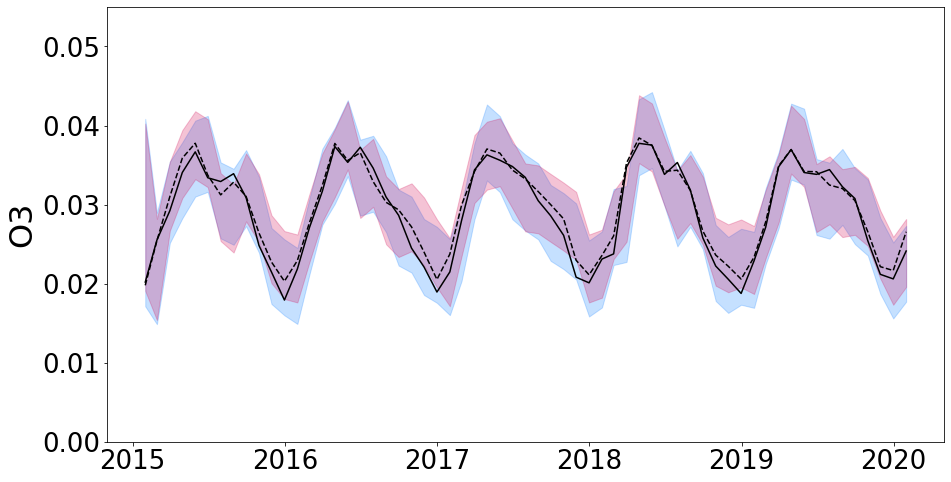

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
from sklearn import metrics
register_matplotlib_converters()

pm25 = pd.read_csv('/content/drive/MyDrive/COVID19_Cities/Data/timeseries data/ozone_timeseries_data.csv')

rdata = wave1_data

type0_list = rdata[rdata['type'] == 0]['fips'].tolist()
# type0_list = [e for e in type0_list if e not in ['35045', '17163', '48139', '16001', '22019']]

type1_list = rdata[rdata['type'] == 1]['fips'].tolist()
# type1_list = [e for e in type1_list if e not in ['23011', '45079', '26065', '41051', '13121', '26139', '36029', '05119', '51087', '45019', '36103', '34027']]

pm25type0 = pm25[type0_list]
pm25type0['Date Local'] = pm25['Date Local']
groupedpm25type0 = pm25type0.groupby('Date Local').mean()
groupedpm25type0 = groupedpm25type0.mean(axis=1)

pm25type1 = pm25[type1_list]
pm25type1['Date Local'] = pm25['Date Local']
groupedpm25type1 = pm25type1.groupby('Date Local').mean()
groupedpm25type1 = groupedpm25type1.mean(axis=1)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
avgclust['values'] = groupedpm25type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Just an ARMA(p,q) model
model = SARIMAX(avgclust['values'], order=(3,0,0), trend='c', seasonal_order = (3, 0, 0, 4))
results1 = model.fit()
print(results1.summary())
epiact = avgclust
plt.figure(figsize = (15,8))
plt.plot(avgclust.index, avgclust['values'], color='black')
# plt.plot(results1.get_prediction().predicted_mean, color='red')
# print(results1.summary())
resultdf = results1.get_prediction(start=0).conf_int()

print('type0 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
print('type0 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
print('type0 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#1A85FF", 
                  alpha=0.25)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
avgclust['values'] = groupedpm25type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Just an ARMA(p,q) model
model = SARIMAX(avgclust['values'], order=(3,0,0), trend='c', seasonal_order = (3, 0, 0, 4))
results1 = model.fit()
print(results1.summary())
epiact = avgclust
plt.plot(avgclust.index, avgclust['values'], color='black', linestyle='dashed')
# plt.plot(results1.get_prediction().predicted_mean, color='orange')
# print(results1.summary())
resultdf = results1.get_prediction(start=0).conf_int()

print('type1 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
print('type1 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
print('type1 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#D41159", 
                  alpha=0.25)

plt.ylabel('O3', fontsize = 32)
plt.tick_params(axis='both', labelsize = 26)
plt.ylim(0.00,0.055)

plt.savefig("arima_o3_wave1.svg", format="svg")
plt.savefig("arima_o3_wave1.png", format="png")
# files.download("arima_pm25.svg")

plt.show()

O3 Wave1 Ttest_indResult(statistic=-0.635653580133465, pvalue=0.5262126126343274)


<function matplotlib.pyplot.show>

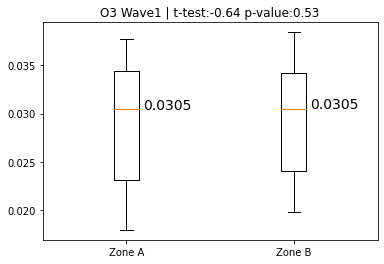

In [ ]:
avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
avgclust['values'] = groupedpm25type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

za = avgclust['values'].tolist()

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
avgclust['values'] = groupedpm25type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

zb = avgclust['values'].tolist()

print('O3 Wave1', ttest_ind(za, zb))

plt.boxplot({'Zone A': za, 'Zone B': zb}.values())
plt.xticks(ticks=[1,2],labels=['Zone A', 'Zone B'])

mza = np.quantile(za, 0.5)
plt.text(1+0.1, mza, str(round(mza,4)), fontsize =14)
mzb = np.quantile(zb, 0.5)
plt.text(2+0.1, mzb, str(round(mzb,4)), fontsize =14)

plt.title('O3 Wave1' + ' | t-test:' + str(np.round(ttest_ind(za, zb)[0],2)) + ' p-value:' + str(np.round(ttest_ind(za, zb)[1],2)))
plt.savefig("O3_wave1.png", format="png")
plt.show

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# aic_bic = pd.DataFrame(columns=['p,d,q', 'aic', 'bic'])
# pdq = []
# aic = []
# bic = []
# log = []

# avgclust = pd.DataFrame()
# avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
# avgclust['values'] = groupedpm25type0.values.tolist()
# avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

# for p in range(0,4):
#   for d in range(0,4):
#     for q in range(0,4):
#       try:
#         model = SARIMAX(avgclust['values'], order=(p,d,q), trend='c', seasonal_order = (p,d,q, 4))
#         results = model.fit()
#         pdq.append(str(p) + ',' + str(d) + ',' + str(q))
#         aic.append(results.aic)
#         bic.append(results.bic)
#         log.append(results.llf_obs.sum())
#       except:
#         print(str(p) + ',' + str(d) + ',' + str(q))

# aic_bic['p,d,q'] = pdq
# aic_bic['aic'] = aic
# aic_bic['bic'] = bic
# aic_bic['log'] = log
# aic_bic.to_csv('o3_wave1_zoneA_pdq.csv')
# aic_bic1 = aic_bic.copy()

# from statsmodels.tsa.statespace.sarimax import SARIMAX
# aic_bic = pd.DataFrame(columns=['p,d,q', 'aic', 'bic'])
# pdq = []
# aic = []
# bic = []
# log = []

# avgclust = pd.DataFrame()
# avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
# avgclust['values'] = groupedpm25type1.values.tolist()
# avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

# for p in range(0,4):
#   for d in range(0,4):
#     for q in range(0,4):
#       try:
#         model = SARIMAX(avgclust['values'], order=(p,d,q), trend='c', seasonal_order = (p,d,q, 4))
#         results = model.fit()
#         pdq.append(str(p) + ',' + str(d) + ',' + str(q))
#         aic.append(results.aic)
#         bic.append(results.bic)
#         log.append(results.llf_obs.sum())
#       except:
#         print(str(p) + ',' + str(d) + ',' + str(q))

# aic_bic['p,d,q'] = pdq
# aic_bic['aic'] = aic
# aic_bic['bic'] = bic
# aic_bic['log'] = log
# aic_bic.to_csv('o3_wave1_zoneB_pdq.csv')
# aic_bic2 = aic_bic.copy()

In [ ]:
# print(aic_bic1[aic_bic1['aic'] == aic_bic1['aic'].min()])
# print(aic_bic1[aic_bic1['bic'] == aic_bic1['bic'].min()])

# print(aic_bic2[aic_bic2['aic'] == aic_bic2['aic'].min()])
# print(aic_bic2[aic_bic2['bic'] == aic_bic2['bic'].min()])

# print(aic_bic1[aic_bic1['p,d,q'] == '2,0,0'])
# print(aic_bic2[aic_bic2['p,d,q'] == '2,0,0'])

#### Wave2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                                 Statespace Model Results                                
Dep. Variable:                            values   No. Observations:                   61
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 4)   Log Likelihood                 -94.150
Date:                           Tue, 22 Mar 2022   AIC                            200.301
Time:                                   16:39:36   BIC                            212.966
Sample:                               01-31-2015   HQIC                           205.264
                                    - 01-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.2835      1.984      2.663      0.008       1.394       9.173
ar.L1          0.5555      0.122      4.541

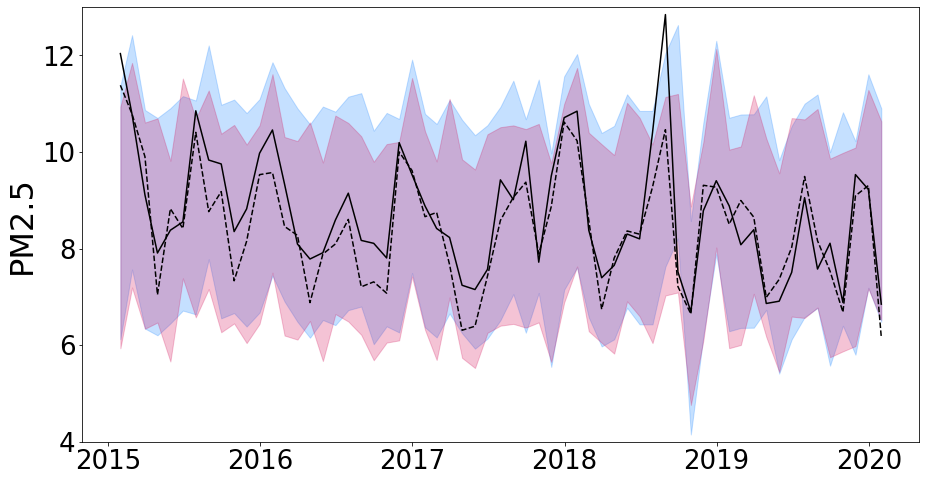

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
from sklearn import metrics
register_matplotlib_converters()

pm25 = pd.read_csv('/content/drive/MyDrive/COVID19_Cities/Data/timeseries data/pm25_timeseries_data.csv')

rdata = wave2_data

type0_list = rdata[rdata['type'] == 0]['fips'].tolist()
type0_list = [e for e in type0_list if e not in ['35045', '17163', '48139', '16001', '26139', '22019']]

type1_list = rdata[rdata['type'] == 1]['fips'].tolist()
type1_list = [e for e in type1_list if e not in ['23011', '45079', '26065', '41051', '13121', '26139', '36029', '05119', '51087', '45019', '36103', '34027']]

pm25type0 = pm25[type0_list]
pm25type0['Date Local'] = pm25['Date Local']
groupedpm25type0 = pm25type0.groupby('Date Local').mean()
groupedpm25type0 = groupedpm25type0.mean(axis=1)

pm25type1 = pm25[type1_list]
pm25type1['Date Local'] = pm25['Date Local']
groupedpm25type1 = pm25type1.groupby('Date Local').mean()
groupedpm25type1 = groupedpm25type1.mean(axis=1)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
avgclust['values'] = groupedpm25type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Just an ARMA(p,q) model
model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
print(results1.summary())
epiact = avgclust
plt.figure(figsize = (15,8))
plt.plot(avgclust.index, avgclust['values'], color='black')
# plt.plot(results1.get_prediction().predicted_mean, color='red')
# print(results1.summary())
resultdf = results1.get_prediction(start=0).conf_int()

print('type0 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
print('type0 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
print('type0 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#1A85FF", 
                  alpha=0.25)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
avgclust['values'] = groupedpm25type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Just an ARMA(p,q) model
model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
print(results1.summary())
epiact = avgclust
plt.plot(avgclust.index, avgclust['values'], color='black', linestyle='dashed')
# plt.plot(results1.get_prediction().predicted_mean, color='orange')
# print(results1.summary())
resultdf = results1.get_prediction(start=0).conf_int()

print('type1 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
print('type1 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
print('type1 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#D41159", 
                  alpha=0.25)

plt.ylabel('PM2.5', fontsize = 32)
plt.tick_params(axis='both', labelsize = 26)
plt.ylim(4,13)

plt.savefig("arima_pm25_wave2.svg", format="svg")
plt.savefig("arima_pm25_wave2.png", format="png")
# files.download("arima_pm25.svg")

plt.show()

PM2.5 Wave2 Ttest_indResult(statistic=1.3235707720886634, pvalue=0.18816170126650655)


<function matplotlib.pyplot.show>

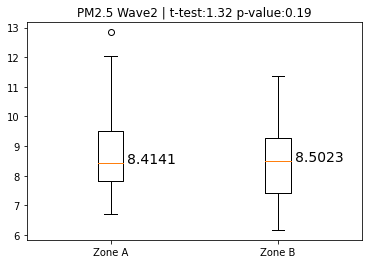

In [ ]:
avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
avgclust['values'] = groupedpm25type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

za = avgclust['values'].tolist()

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
avgclust['values'] = groupedpm25type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

zb = avgclust['values'].tolist()

print('PM2.5 Wave2', ttest_ind(za, zb))

plt.boxplot({'Zone A': za, 'Zone B': zb}.values())
plt.xticks(ticks=[1,2],labels=['Zone A', 'Zone B'])

mza = np.quantile(za, 0.5)
plt.text(1+0.1, mza, str(round(mza,4)), fontsize =14)
mzb = np.quantile(zb, 0.5)
plt.text(2+0.1, mzb, str(round(mzb,4)), fontsize =14)

plt.title('PM2.5 Wave2' + ' | t-test:' + str(np.round(ttest_ind(za, zb)[0],2)) + ' p-value:' + str(np.round(ttest_ind(za, zb)[1],2)))
plt.savefig("PM25_wave2.png", format="png")
plt.show

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# aic_bic = pd.DataFrame(columns=['p,d,q', 'aic', 'bic'])
# pdq = []
# aic = []
# bic = []
# log = []

# avgclust = pd.DataFrame()
# avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
# avgclust['values'] = groupedpm25type0.values.tolist()
# avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

# for p in range(0,4):
#   for d in range(0,4):
#     for q in range(0,4):
#       try:
#         model = SARIMAX(avgclust['values'], order=(p,d,q), trend='c', seasonal_order = (p,d,q, 4))
#         results = model.fit()
#         pdq.append(str(p) + ',' + str(d) + ',' + str(q))
#         aic.append(results.aic)
#         bic.append(results.bic)
#         log.append(results.llf_obs.sum())
#       except:
#         print(str(p) + ',' + str(d) + ',' + str(q))

# aic_bic['p,d,q'] = pdq
# aic_bic['aic'] = aic
# aic_bic['bic'] = bic
# aic_bic['log'] = log
# aic_bic.to_csv('pm25_wave2_zoneA_pdq.csv')
# aic_bic1 = aic_bic.copy()

# from statsmodels.tsa.statespace.sarimax import SARIMAX
# aic_bic = pd.DataFrame(columns=['p,d,q', 'aic', 'bic'])
# pdq = []
# aic = []
# bic = []
# log = []

# avgclust = pd.DataFrame()
# avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
# avgclust['values'] = groupedpm25type1.values.tolist()
# avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

# for p in range(0,4):
#   for d in range(0,4):
#     for q in range(0,4):
#       try:
#         model = SARIMAX(avgclust['values'], order=(p,d,q), trend='c', seasonal_order = (p,d,q, 4))
#         results = model.fit()
#         pdq.append(str(p) + ',' + str(d) + ',' + str(q))
#         aic.append(results.aic)
#         bic.append(results.bic)
#         log.append(results.llf_obs.sum())
#       except:
#         print(str(p) + ',' + str(d) + ',' + str(q))

# aic_bic['p,d,q'] = pdq
# aic_bic['aic'] = aic
# aic_bic['bic'] = bic
# aic_bic['log'] = log
# aic_bic.to_csv('pm25_wave2_zoneB_pdq.csv')
# aic_bic2 = aic_bic.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                                 Statespace Model Results                                
Dep. Variable:                            values   No. Observations:                   61
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 4)   Log Likelihood                 -84.702
Date:                           Tue, 22 Mar 2022   AIC                            181.404
Time:                                   16:39:40   BIC                            194.070
Sample:                               01-31-2015   HQIC                           186.368
                                    - 01-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.0312      1.746      2.309      0.021       0.610       7.453
ar.L1          1.2688      0.124     10.245

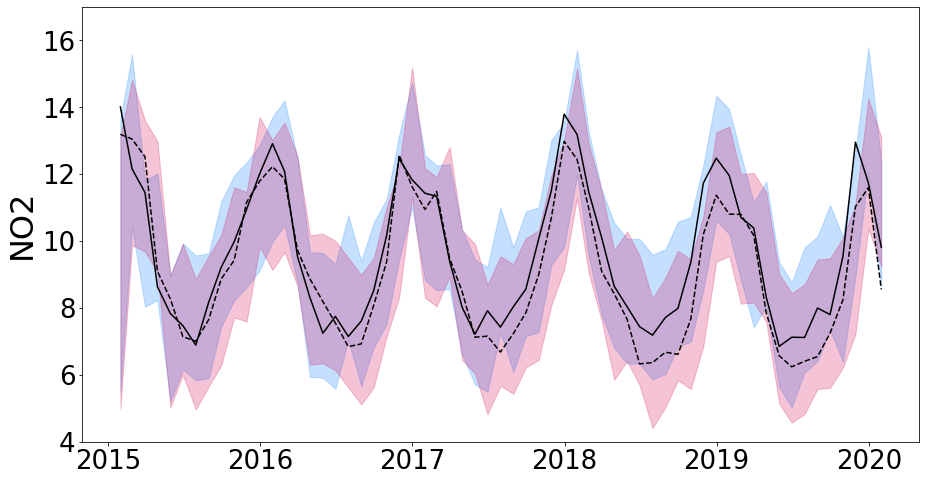

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
from sklearn import metrics
register_matplotlib_converters()

pm25 = pd.read_csv('/content/drive/MyDrive/COVID19_Cities/Data/timeseries data/no2_timeseries_data.csv')

rdata = wave2_data

type0_list = rdata[rdata['type'] == 0]['fips'].tolist()
# type0_list = [e for e in type0_list if e not in ['35045', '17163', '48139', '16001', '22019']]

type1_list = rdata[rdata['type'] == 1]['fips'].tolist()
# type1_list = [e for e in type1_list if e not in ['23011', '45079', '26065', '41051', '13121', '26139', '36029', '05119', '51087', '45019', '36103', '34027']]

pm25type0 = pm25[type0_list]
pm25type0['Date Local'] = pm25['Date Local']
groupedpm25type0 = pm25type0.groupby('Date Local').mean()
groupedpm25type0 = groupedpm25type0.mean(axis=1)

pm25type1 = pm25[type1_list]
pm25type1['Date Local'] = pm25['Date Local']
groupedpm25type1 = pm25type1.groupby('Date Local').mean()
groupedpm25type1 = groupedpm25type1.mean(axis=1)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
avgclust['values'] = groupedpm25type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Just an ARMA(p,q) model
model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
print(results1.summary())
epiact = avgclust
plt.figure(figsize = (15,8))
plt.plot(avgclust.index, avgclust['values'], color='black')
# plt.plot(results1.get_prediction().predicted_mean, color='red')
# print(results1.summary())
resultdf = results1.get_prediction(start=0).conf_int()

print('type0 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
print('type0 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
print('type0 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#1A85FF", 
                  alpha=0.25)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
avgclust['values'] = groupedpm25type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Just an ARMA(p,q) model
model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
print(results1.summary())
epiact = avgclust
plt.plot(avgclust.index, avgclust['values'], color='black', linestyle='dashed')
# plt.plot(results1.get_prediction().predicted_mean, color='orange')
# print(results1.summary())
resultdf = results1.get_prediction(start=0).conf_int()

print('type1 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
print('type1 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
print('type1 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#D41159", 
                  alpha=0.25)

plt.ylabel('NO2', fontsize = 32)
plt.tick_params(axis='both', labelsize = 26)
plt.ylim(4,17)

plt.savefig("arima_no2_wave2.svg", format="svg")
plt.savefig("arima_no2_wave2.png", format="png")
# files.download("arima_pm25.svg")

plt.show()

NO2 Wave2 Ttest_indResult(statistic=1.247293645664616, pvalue=0.21471862743883052)


<function matplotlib.pyplot.show>

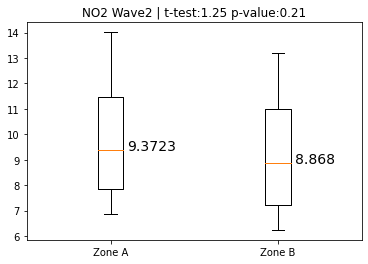

In [ ]:
avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
avgclust['values'] = groupedpm25type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

za = avgclust['values'].tolist()

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
avgclust['values'] = groupedpm25type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

zb = avgclust['values'].tolist()

print('NO2 Wave2', ttest_ind(za, zb))

plt.boxplot({'Zone A': za, 'Zone B': zb}.values())
plt.xticks(ticks=[1,2],labels=['Zone A', 'Zone B'])

mza = np.quantile(za, 0.5)
plt.text(1+0.1, mza, str(round(mza,4)), fontsize =14)
mzb = np.quantile(zb, 0.5)
plt.text(2+0.1, mzb, str(round(mzb,4)), fontsize =14)

plt.title('NO2 Wave2' + ' | t-test:' + str(np.round(ttest_ind(za, zb)[0],2)) + ' p-value:' + str(np.round(ttest_ind(za, zb)[1],2)))
plt.savefig("NO2_wave2.png", format="png")
plt.show

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# aic_bic = pd.DataFrame(columns=['p,d,q', 'aic', 'bic'])
# pdq = []
# aic = []
# bic = []
# log = []

# avgclust = pd.DataFrame()
# avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
# avgclust['values'] = groupedpm25type0.values.tolist()
# avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

# for p in range(0,4):
#   for d in range(0,4):
#     for q in range(0,4):
#       try:
#         model = SARIMAX(avgclust['values'], order=(p,d,q), trend='c', seasonal_order = (p,d,q, 4))
#         results = model.fit()
#         pdq.append(str(p) + ',' + str(d) + ',' + str(q))
#         aic.append(results.aic)
#         bic.append(results.bic)
#         log.append(results.llf_obs.sum())
#       except:
#         print(str(p) + ',' + str(d) + ',' + str(q))

# aic_bic['p,d,q'] = pdq
# aic_bic['aic'] = aic
# aic_bic['bic'] = bic
# aic_bic['log'] = log
# aic_bic.to_csv('no2_wave2_zoneA_pdq.csv')
# aic_bic1 = aic_bic.copy()

# from statsmodels.tsa.statespace.sarimax import SARIMAX
# aic_bic = pd.DataFrame(columns=['p,d,q', 'aic', 'bic'])
# pdq = []
# aic = []
# bic = []
# log = []

# avgclust = pd.DataFrame()
# avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
# avgclust['values'] = groupedpm25type1.values.tolist()
# avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

# for p in range(0,4):
#   for d in range(0,4):
#     for q in range(0,4):
#       try:
#         model = SARIMAX(avgclust['values'], order=(p,d,q), trend='c', seasonal_order = (p,d,q, 4))
#         results = model.fit()
#         pdq.append(str(p) + ',' + str(d) + ',' + str(q))
#         aic.append(results.aic)
#         bic.append(results.bic)
#         log.append(results.llf_obs.sum())
#       except:
#         print(str(p) + ',' + str(d) + ',' + str(q))

# aic_bic['p,d,q'] = pdq
# aic_bic['aic'] = aic
# aic_bic['bic'] = bic
# aic_bic['log'] = log
# aic_bic.to_csv('no2_wave2_zoneB_pdq.csv')
# aic_bic2 = aic_bic.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                
Dep. Variable:                            values   No. Observations:                   61
Model:             SARIMAX(3, 0, 1)x(3, 0, 1, 4)   Log Likelihood                  68.196
Date:                           Tue, 22 Mar 2022   AIC                           -116.393
Time:                                   16:39:45   BIC                            -95.284
Sample:                               01-31-2015   HQIC                          -108.120
                                    - 01-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0073      0.301      0.024      0.981      -0.582       0.597
ar.L1          0.3825      5.517      0.069

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                
Dep. Variable:                            values   No. Observations:                   61
Model:             SARIMAX(3, 0, 1)x(3, 0, 1, 4)   Log Likelihood                  56.996
Date:                           Tue, 22 Mar 2022   AIC                            -93.993
Time:                                   16:39:48   BIC                            -72.884
Sample:                               01-31-2015   HQIC                           -85.720
                                    - 01-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0631      0.200      0.315      0.753      -0.329       0.456
ar.L1          0.3405      3.512      0.097

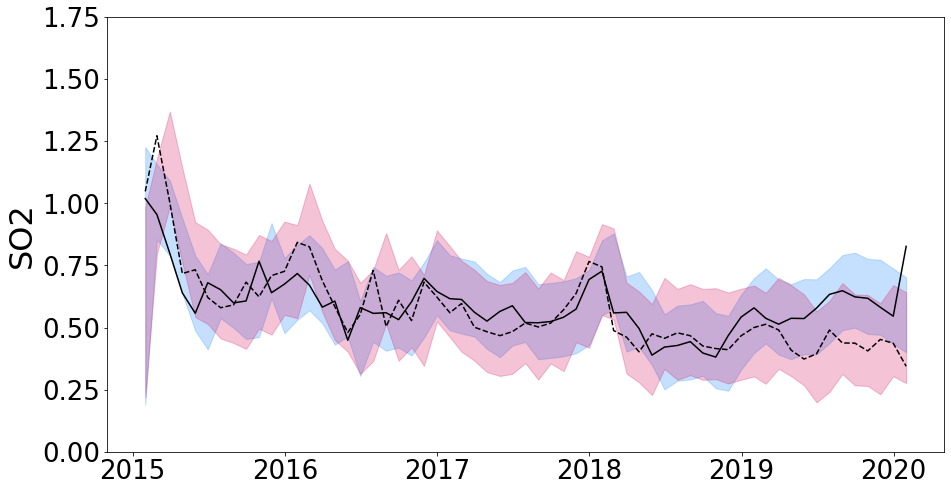

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
from sklearn import metrics
register_matplotlib_converters()

pm25 = pd.read_csv('/content/drive/MyDrive/COVID19_Cities/Data/timeseries data/so2_timeseries_data.csv')

rdata = wave2_data

type0_list = rdata[rdata['type'] == 0]['fips'].tolist()
# type0_list = [e for e in type0_list if e not in ['35045', '17163', '48139', '16001', '22019']]

type1_list = rdata[rdata['type'] == 1]['fips'].tolist()
# type1_list = [e for e in type1_list if e not in ['23011', '45079', '26065', '41051', '13121', '26139', '36029', '05119', '51087', '45019', '36103', '34027']]

pm25type0 = pm25[type0_list]
pm25type0['Date Local'] = pm25['Date Local']
groupedpm25type0 = pm25type0.groupby('Date Local').mean()
groupedpm25type0 = groupedpm25type0.mean(axis=1)

pm25type1 = pm25[type1_list]
pm25type1['Date Local'] = pm25['Date Local']
groupedpm25type1 = pm25type1.groupby('Date Local').mean()
groupedpm25type1 = groupedpm25type1.mean(axis=1)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
avgclust['values'] = groupedpm25type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Just an ARMA(p,q) model
model = SARIMAX(avgclust['values'], order=(3,0,1), trend='c', seasonal_order = (3, 0, 1, 4))
results1 = model.fit()
print(results1.summary())
epiact = avgclust
plt.figure(figsize = (15,8))
plt.plot(avgclust.index, avgclust['values'], color='black')
# plt.plot(results1.get_prediction().predicted_mean, color='red')
# print(results1.summary())
resultdf = results1.get_prediction(start=0).conf_int()

print('type0 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
print('type0 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
print('type0 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#1A85FF", 
                  alpha=0.25)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
avgclust['values'] = groupedpm25type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Just an ARMA(p,q) model
model = SARIMAX(avgclust['values'], order=(3,0,1), trend='c', seasonal_order = (3, 0, 1, 4))
results1 = model.fit()
print(results1.summary())
epiact = avgclust
plt.plot(avgclust.index, avgclust['values'], color='black', linestyle='dashed')
# plt.plot(results1.get_prediction().predicted_mean, color='orange')
# print(results1.summary())
resultdf = results1.get_prediction(start=0).conf_int()

print('type1 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
print('type1 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
print('type1 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#D41159", 
                  alpha=0.25)

plt.ylabel('SO2', fontsize = 32)
plt.tick_params(axis='both', labelsize = 26)
plt.ylim(0.0,1.75)

plt.savefig("arima_so2_wave2.svg", format="svg")
plt.savefig("arima_so2_wave2.png", format="png")
# files.download("arima_pm25.svg")

plt.show()

SO2 Wave2 Ttest_indResult(statistic=0.7776739951378303, pvalue=0.43829174292709583)


<function matplotlib.pyplot.show>

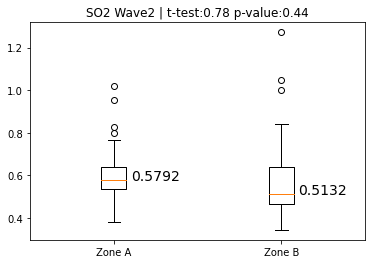

In [ ]:
avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
avgclust['values'] = groupedpm25type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

za = avgclust['values'].tolist()

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
avgclust['values'] = groupedpm25type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

zb = avgclust['values'].tolist()

print('SO2 Wave2', ttest_ind(za, zb))

plt.boxplot({'Zone A': za, 'Zone B': zb}.values())
plt.xticks(ticks=[1,2],labels=['Zone A', 'Zone B'])

mza = np.quantile(za, 0.5)
plt.text(1+0.1, mza, str(round(mza,4)), fontsize =14)
mzb = np.quantile(zb, 0.5)
plt.text(2+0.1, mzb, str(round(mzb,4)), fontsize =14)

plt.title('SO2 Wave2' + ' | t-test:' + str(np.round(ttest_ind(za, zb)[0],2)) + ' p-value:' + str(np.round(ttest_ind(za, zb)[1],2)))
plt.savefig("SO2_wave2.png", format="png")
plt.show

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# aic_bic = pd.DataFrame(columns=['p,d,q', 'aic', 'bic'])
# pdq = []
# aic = []
# bic = []
# log = []

# avgclust = pd.DataFrame()
# avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
# avgclust['values'] = groupedpm25type0.values.tolist()
# avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

# for p in range(0,4):
#   for d in range(0,4):
#     for q in range(0,4):
#       try:
#         model = SARIMAX(avgclust['values'], order=(p,d,q), trend='c', seasonal_order = (p,d,q, 4))
#         results = model.fit()
#         pdq.append(str(p) + ',' + str(d) + ',' + str(q))
#         aic.append(results.aic)
#         bic.append(results.bic)
#         log.append(results.llf_obs.sum())
#       except:
#         print(str(p) + ',' + str(d) + ',' + str(q))

# aic_bic['p,d,q'] = pdq
# aic_bic['aic'] = aic
# aic_bic['bic'] = bic
# aic_bic['log'] = log
# aic_bic.to_csv('so2_wave2_zoneA_pdq.csv')
# aic_bic1 = aic_bic.copy()

# from statsmodels.tsa.statespace.sarimax import SARIMAX
# aic_bic = pd.DataFrame(columns=['p,d,q', 'aic', 'bic'])
# pdq = []
# aic = []
# bic = []
# log = []

# avgclust = pd.DataFrame()
# avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
# avgclust['values'] = groupedpm25type1.values.tolist()
# avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

# for p in range(0,4):
#   for d in range(0,4):
#     for q in range(0,4):
#       try:
#         model = SARIMAX(avgclust['values'], order=(p,d,q), trend='c', seasonal_order = (p,d,q, 4))
#         results = model.fit()
#         pdq.append(str(p) + ',' + str(d) + ',' + str(q))
#         aic.append(results.aic)
#         bic.append(results.bic)
#         log.append(results.llf_obs.sum())
#       except:
#         print(str(p) + ',' + str(d) + ',' + str(q))

# aic_bic['p,d,q'] = pdq
# aic_bic['aic'] = aic
# aic_bic['bic'] = bic
# aic_bic['log'] = log
# aic_bic.to_csv('so2_wave2_zoneB_pdq.csv')
# aic_bic2 = aic_bic.copy()

In [ ]:
# print(aic_bic1[aic_bic1['aic'] == aic_bic1['aic'].min()])
# print(aic_bic1[aic_bic1['bic'] == aic_bic1['bic'].min()])

# print(aic_bic2[aic_bic2['aic'] == aic_bic2['aic'].min()])
# print(aic_bic2[aic_bic2['bic'] == aic_bic2['bic'].min()])

# print(aic_bic1[aic_bic1['p,d,q'] == '2,0,0'])
# print(aic_bic2[aic_bic2['p,d,q'] == '2,0,0'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                 Statespace Model Results                                
Dep. Variable:                            values   No. Observations:                   61
Model:             SARIMAX(3, 0, 0)x(3, 0, 0, 4)   Log Likelihood                 287.848
Date:                           Tue, 22 Mar 2022   AIC                           -559.696
Time:                                   16:39:50   BIC                           -542.809
Sample:                               01-31-2015   HQIC                          -553.078
                                    - 01-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0121      0.005      2.597      0.009       0.003       0.021
ar.L1          1.2892      0.183      7.048

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                
Dep. Variable:                            values   No. Observations:                   61
Model:             SARIMAX(3, 0, 0)x(3, 0, 0, 4)   Log Likelihood                 276.633
Date:                           Tue, 22 Mar 2022   AIC                           -537.266
Time:                                   16:39:52   BIC                           -520.379
Sample:                               01-31-2015   HQIC                          -530.647
                                    - 01-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0133      0.005      2.510      0.012       0.003       0.024
ar.L1          1.0661      0.166      6.426

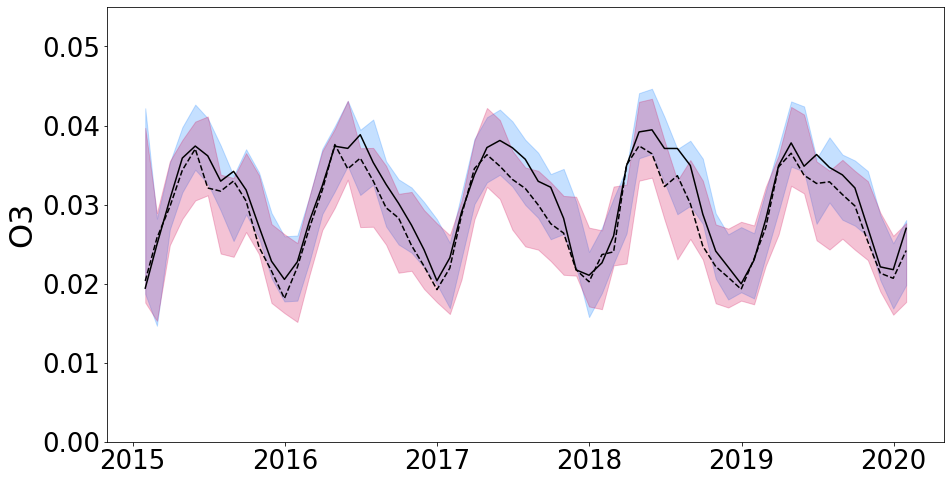

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
from sklearn import metrics
register_matplotlib_converters()

pm25 = pd.read_csv('/content/drive/MyDrive/COVID19_Cities/Data/timeseries data/ozone_timeseries_data.csv')

rdata = wave2_data

type0_list = rdata[rdata['type'] == 0]['fips'].tolist()
# type0_list = [e for e in type0_list if e not in ['35045', '17163', '48139', '16001', '22019']]

type1_list = rdata[rdata['type'] == 1]['fips'].tolist()
# type1_list = [e for e in type1_list if e not in ['23011', '45079', '26065', '41051', '13121', '26139', '36029', '05119', '51087', '45019', '36103', '34027']]

pm25type0 = pm25[type0_list]
pm25type0['Date Local'] = pm25['Date Local']
groupedpm25type0 = pm25type0.groupby('Date Local').mean()
groupedpm25type0 = groupedpm25type0.mean(axis=1)

pm25type1 = pm25[type1_list]
pm25type1['Date Local'] = pm25['Date Local']
groupedpm25type1 = pm25type1.groupby('Date Local').mean()
groupedpm25type1 = groupedpm25type1.mean(axis=1)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
avgclust['values'] = groupedpm25type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Just an ARMA(p,q) model
model = SARIMAX(avgclust['values'], order=(3,0,0), trend='c', seasonal_order = (3, 0, 0, 4))
results1 = model.fit()
print(results1.summary())
epiact = avgclust
plt.figure(figsize = (15,8))
plt.plot(avgclust.index, avgclust['values'], color='black')
# plt.plot(results1.get_prediction().predicted_mean, color='red')
# print(results1.summary())
resultdf = results1.get_prediction(start=0).conf_int()

print('type0 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
print('type0 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
print('type0 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#1A85FF", 
                  alpha=0.25)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
avgclust['values'] = groupedpm25type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Just an ARMA(p,q) model
model = SARIMAX(avgclust['values'], order=(3,0,0), trend='c', seasonal_order = (3, 0, 0, 4))
results1 = model.fit()
print(results1.summary())
epiact = avgclust
plt.plot(avgclust.index, avgclust['values'], color='black', linestyle='dashed')
# plt.plot(results1.get_prediction().predicted_mean, color='orange')
# print(results1.summary())
resultdf = results1.get_prediction(start=0).conf_int()

print('type1 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
print('type1 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
print('type1 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#D41159", 
                  alpha=0.25)

plt.ylabel('O3', fontsize = 32)
plt.tick_params(axis='both', labelsize = 26)
plt.ylim(0.00,0.055)

plt.savefig("arima_o3_wave2.svg", format="svg")
plt.savefig("arima_o3_wave2.png", format="png")
# files.download("arima_pm25.svg")

plt.show()

O3 Wave2 Ttest_indResult(statistic=1.6156931000967107, pvalue=0.10878684292126993)


<function matplotlib.pyplot.show>

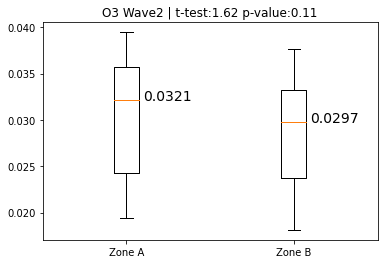

In [ ]:
avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
avgclust['values'] = groupedpm25type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

za = avgclust['values'].tolist()

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
avgclust['values'] = groupedpm25type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

zb = avgclust['values'].tolist()

print('O3 Wave2', ttest_ind(za, zb))

plt.boxplot({'Zone A': za, 'Zone B': zb}.values())
plt.xticks(ticks=[1,2],labels=['Zone A', 'Zone B'])

mza = np.quantile(za, 0.5)
plt.text(1+0.1, mza, str(round(mza,4)), fontsize =14)
mzb = np.quantile(zb, 0.5)
plt.text(2+0.1, mzb, str(round(mzb,4)), fontsize =14)

plt.title('O3 Wave2' + ' | t-test:' + str(np.round(ttest_ind(za, zb)[0],2)) + ' p-value:' + str(np.round(ttest_ind(za, zb)[1],2)))
plt.savefig("O3_wave2.png", format="png")
plt.show

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# aic_bic = pd.DataFrame(columns=['p,d,q', 'aic', 'bic'])
# pdq = []
# aic = []
# bic = []
# log = []

# avgclust = pd.DataFrame()
# avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
# avgclust['values'] = groupedpm25type0.values.tolist()
# avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

# for p in range(0,4):
#   for d in range(0,4):
#     for q in range(0,4):
#       try:
#         model = SARIMAX(avgclust['values'], order=(p,d,q), trend='c', seasonal_order = (p,d,q, 4))
#         results = model.fit()
#         pdq.append(str(p) + ',' + str(d) + ',' + str(q))
#         aic.append(results.aic)
#         bic.append(results.bic)
#         log.append(results.llf_obs.sum())
#       except:
#         print(str(p) + ',' + str(d) + ',' + str(q))

# aic_bic['p,d,q'] = pdq
# aic_bic['aic'] = aic
# aic_bic['bic'] = bic
# aic_bic['log'] = log
# aic_bic.to_csv('o3_wave2_zoneA_pdq.csv')
# aic_bic1 = aic_bic.copy()

# from statsmodels.tsa.statespace.sarimax import SARIMAX
# aic_bic = pd.DataFrame(columns=['p,d,q', 'aic', 'bic'])
# pdq = []
# aic = []
# bic = []
# log = []

# avgclust = pd.DataFrame()
# avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
# avgclust['values'] = groupedpm25type1.values.tolist()
# avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

# for p in range(0,4):
#   for d in range(0,4):
#     for q in range(0,4):
#       try:
#         model = SARIMAX(avgclust['values'], order=(p,d,q), trend='c', seasonal_order = (p,d,q, 4))
#         results = model.fit()
#         pdq.append(str(p) + ',' + str(d) + ',' + str(q))
#         aic.append(results.aic)
#         bic.append(results.bic)
#         log.append(results.llf_obs.sum())
#       except:
#         print(str(p) + ',' + str(d) + ',' + str(q))

# aic_bic['p,d,q'] = pdq
# aic_bic['aic'] = aic
# aic_bic['bic'] = bic
# aic_bic['log'] = log
# aic_bic.to_csv('o3_wave2_zoneB_pdq.csv')
# aic_bic2 = aic_bic.copy()

In [ ]:
# print(aic_bic1[aic_bic1['aic'] == aic_bic1['aic'].min()])
# print(aic_bic1[aic_bic1['bic'] == aic_bic1['bic'].min()])

# print(aic_bic2[aic_bic2['aic'] == aic_bic2['aic'].min()])
# print(aic_bic2[aic_bic2['bic'] == aic_bic2['bic'].min()])

# print(aic_bic1[aic_bic1['p,d,q'] == '2,0,0'])
# print(aic_bic2[aic_bic2['p,d,q'] == '2,0,0'])

#### sth else

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespac

                                 Statespace Model Results                                
Dep. Variable:                            values   No. Observations:                   61
Model:             SARIMAX(2, 0, 4)x(2, 0, 4, 4)   Log Likelihood                 -64.463
Date:                           Tue, 22 Mar 2022   AIC                            156.926
Time:                                   16:40:09   BIC                            186.478
Sample:                               01-31-2015   HQIC                           168.507
                                    - 01-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6651      2.930      0.568      0.570      -4.077       7.408
ar.L1          1.6889      0.039     43.849

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                
Dep. Variable:                            values   No. Observations:                   61
Model:             SARIMAX(2, 0, 4)x(2, 0, 4, 4)   Log Likelihood                 -79.096
Date:                           Tue, 22 Mar 2022   AIC                            186.192
Time:                                   16:40:15   BIC                            215.744
Sample:                               01-31-2015   HQIC                           197.774
                                    - 01-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0526      5.334      0.010      0.992     -10.402      10.507
ar.L1          1.6276      0.116     14.066

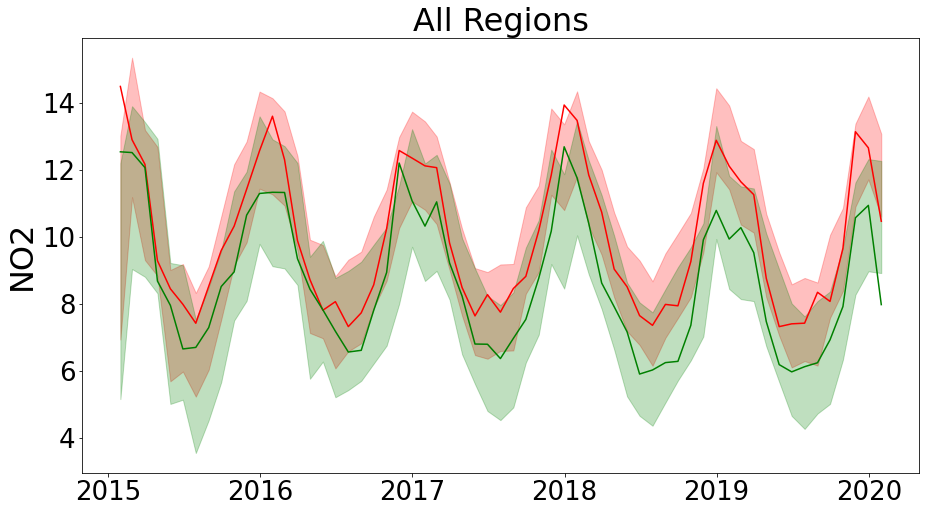

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

no2 = pd.read_csv("/content/drive/My Drive/COVID19_Cities/Data/no2_timeseries_2015_2019/no2_time_0.csv")
for i in range(1,35): 
  no2 = no2.append(pd.read_csv("/content/drive/My Drive/COVID19_Cities/Data/no2_timeseries_2015_2019/no2_time_"+str(i)+".csv"), ignore_index=True)
no2 = no2.drop('Unnamed: 0', axis=1)

rindex = [5]
region = ['', 'Northeast', 'Midwest', 'South', 'West', 'All Regions'] 
# print(rdata['type'].value_counts())

for i in rindex:
  if i != 5:
    rdata = cdata[cdata['region'] == i]
  else:
    rdata = cdata

  no2type0 = no2[rdata[rdata['type'] == 0]['fips'].tolist()]
  no2type0['date_gmt'] = no2['date_gmt']
  groupedno2type0 = no2type0.groupby('date_gmt').mean()
  groupedno2type0 = groupedno2type0.mean(axis=1)

  no2type1 = no2[rdata[rdata['type'] == 1]['fips'].tolist()]
  no2type1['date_gmt'] = no2['date_gmt']
  groupedno2type1 = no2type1.groupby('date_gmt').mean()
  groupedno2type1 = groupedno2type1.mean(axis=1)

  avgclust = pd.DataFrame()
  avgclust['datetime'] = pd.to_datetime(groupedno2type0.index)
  avgclust['values'] = groupedno2type0.values.tolist()
  avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

  from statsmodels.tsa.statespace.sarimax import SARIMAX
  # Just an ARMA(p,q) model
  if i == 2:
    model = SARIMAX(avgclust['values'], order=(2,0,4), trend='c', seasonal_order = (2, 0, 4, 4))
  else:
    model = SARIMAX(avgclust['values'], order=(2,0,4), trend='c', seasonal_order = (2, 0, 4, 4))
  results1 = model.fit()
  print(results1.summary())
  epiact = avgclust
  plt.figure(figsize = (15,8))
  plt.plot(avgclust.index, avgclust['values'], color='red')
  # plt.plot(results1.get_prediction().predicted_mean, color='red')
  # print(results1.summary())
  resultdf = results1.get_prediction(start=0).conf_int()

  print('type0 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
  print('type0 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
  print('type0 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

  plt.fill_between( resultdf.index, 
                    resultdf['lower values'], 
                    resultdf['upper values'], 
                    color="red", 
                    alpha=0.25)

  avgclust = pd.DataFrame()
  avgclust['datetime'] = pd.to_datetime(groupedno2type1.index)
  avgclust['values'] = groupedno2type1.values.tolist()
  avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

  from statsmodels.tsa.statespace.sarimax import SARIMAX
  # Just an ARMA(p,q) model
  if i == 2:
    model = SARIMAX(avgclust['values'], order=(2,0,4), trend='c', seasonal_order = (2, 0, 4, 4))
  else:
    model = SARIMAX(avgclust['values'], order=(2,0,4), trend='c', seasonal_order = (2, 0, 4, 4))
  results1 = model.fit()
  print(results1.summary())
  epiact = avgclust
  plt.plot(avgclust.index, avgclust['values'], color='green')
  # plt.plot(results1.get_prediction().predicted_mean, color='orange')
  # print(results1.summary())
  resultdf = results1.get_prediction(start=0).conf_int()

  print('type1 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
  print('type1 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
  print('type1 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

  plt.fill_between( resultdf.index, 
                    resultdf['lower values'], 
                    resultdf['upper values'], 
                    color="green", 
                    alpha=0.25)

  plt.ylabel('NO2', fontsize = 32)
  plt.title(region[i], fontsize = 32)
  plt.tick_params(axis='both', labelsize = 26)
  
  plt.savefig("arima_no2.svg", format="svg")
  # files.download("arima_no2.svg")

  plt.show()

In [ ]:
t = pd.DataFrame(groupedno2type0, columns=['no2 ZoneA'])
t2 = pd.DataFrame(groupedno2type1, columns=['no2 ZoneB'])
table = t.merge(t2, on='date_gmt')
table.to_csv('NO2_table.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                 Statespace Model Results                                
Dep. Variable:                            values   No. Observations:                   61
Model:             SARIMAX(5, 0, 1)x(5, 0, 1, 4)   Log Likelihood                 299.239
Date:                           Tue, 22 Mar 2022   AIC                           -570.478
Time:                                   16:40:28   BIC                           -540.925
Sample:                               01-31-2015   HQIC                          -558.896
                                    - 01-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0357      0.079      0.451      0.652      -0.120       0.191
ar.L1          0.6111      0.532      1.150

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                 Statespace Model Results                                
Dep. Variable:                            values   No. Observations:                   61
Model:             SARIMAX(5, 0, 1)x(5, 0, 1, 4)   Log Likelihood                 289.089
Date:                           Tue, 22 Mar 2022   AIC                           -550.179
Time:                                   16:40:31   BIC                           -520.627
Sample:                               01-31-2015   HQIC                          -538.597
                                    - 01-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0322      0.080      0.404      0.686      -0.124       0.189
ar.L1          0.5366      1.181      0.454

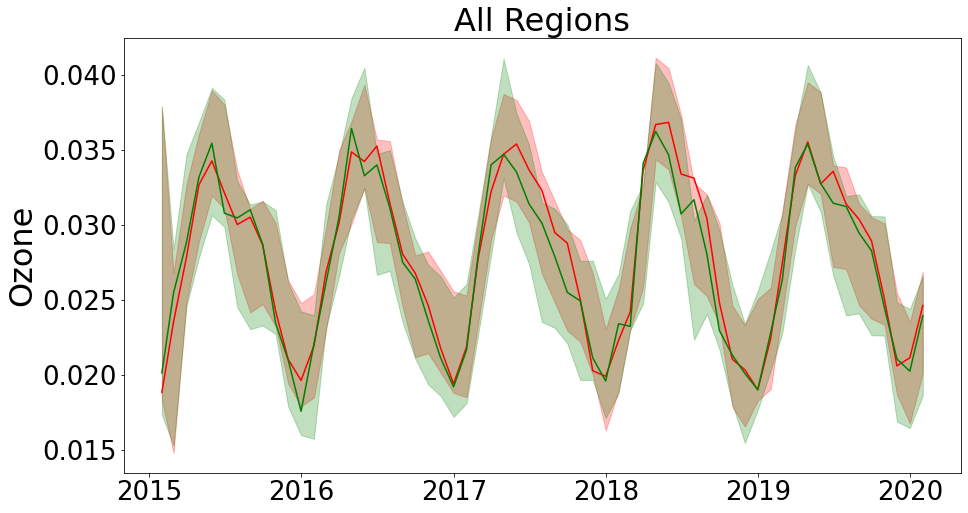

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

ozone = pd.read_csv("/content/drive/My Drive/COVID19_Cities/Data/ozone_timeseries_2015_2019/ozone_time_0.csv")
for i in range(1,35): 
  ozone = ozone.append(pd.read_csv("/content/drive/My Drive/COVID19_Cities/Data/ozone_timeseries_2015_2019/ozone_time_"+str(i)+".csv"), ignore_index=True)
ozone = ozone.drop('Unnamed: 0', axis=1)

rindex = [5]
region = ['', 'Northeast', 'Midwest', 'South', 'West', 'All Regions'] 
# print(rdata['type'].value_counts())

for i in rindex:
  if i != 5:
    rdata = cdata[cdata['region'] == i]
  else:
    rdata = cdata

  ozonetype0 = ozone[rdata[rdata['type'] == 0]['fips'].tolist()]
  ozonetype0['date_gmt'] = ozone['date_gmt']
  groupedozonetype0 = ozonetype0.groupby('date_gmt').mean()
  groupedozonetype0 = groupedozonetype0.mean(axis=1)

  ozonetype1 = ozone[rdata[rdata['type'] == 1]['fips'].tolist()]
  ozonetype1['date_gmt'] = ozone['date_gmt']
  groupedozonetype1 = ozonetype1.groupby('date_gmt').mean()
  groupedozonetype1 = groupedozonetype1.mean(axis=1)

  avgclust = pd.DataFrame()
  avgclust['datetime'] = pd.to_datetime(groupedozonetype0.index)
  avgclust['values'] = groupedozonetype0.values.tolist()
  avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

  from statsmodels.tsa.statespace.sarimax import SARIMAX
  # Just an ARMA(p,q) model
  model = SARIMAX(avgclust['values'], order=(5,0,1), trend='c', seasonal_order=(5,0,1,4))
  results1 = model.fit()
  print(results1.summary())
  epiact = avgclust
  plt.figure(figsize = (15,8))
  plt.plot(avgclust.index, avgclust['values'], color='red')
  # plt.plot(results1.get_prediction().predicted_mean, color='red')
  # print(results1.summary())
  resultdf = results1.get_prediction(start=0).conf_int()

  print('type0 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
  print('type0 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
  print('type0 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

  plt.fill_between( resultdf.index, 
                    resultdf['lower values'], 
                    resultdf['upper values'], 
                    color="red", 
                    alpha=0.25)

  avgclust = pd.DataFrame()
  avgclust['datetime'] = pd.to_datetime(groupedozonetype1.index)
  avgclust['values'] = groupedozonetype1.values.tolist()
  avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

  from statsmodels.tsa.statespace.sarimax import SARIMAX
  # Just an ARMA(p,q) model
  model = SARIMAX(avgclust['values'], order=(5,0,1), trend='c', seasonal_order=(5,0,1,4))
  results1 = model.fit()
  print(results1.summary())
  epiact = avgclust
  plt.plot(avgclust.index, avgclust['values'], color='green')
  # plt.plot(results1.get_prediction().predicted_mean, color='orange')
  # print(results1.summary())
  resultdf = results1.get_prediction(start=0).conf_int()

  print('type1 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
  print('type1 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
  print('type1 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

  plt.fill_between( resultdf.index, 
                    resultdf['lower values'], 
                    resultdf['upper values'], 
                    color="green", 
                    alpha=0.25)

  plt.ylabel('Ozone', fontsize = 32)
  plt.title(region[i], fontsize = 32)
  plt.tick_params(axis='both', labelsize = 26)
  
  plt.savefig("arima_ozone.svg", format="svg")
  # files.download("arima_ozone.svg")

  plt.show()
  '''type0 MAE: 0.0021251116943078203
type0 MSE: 7.18081882670693e-06
type0 RMSE: 0.046098933765411756
type1 MAE: 0.001434568590060933
type1 MSE: 3.72279695646683e-06
type1 RMSE: 0.037875699202271275'''

In [ ]:
t = pd.DataFrame(groupedozonetype0, columns=['Ozone ZoneA'])
t2 = pd.DataFrame(groupedozonetype1, columns=['Ozone ZoneB'])
table = t.merge(t2, on='date_gmt')
table.to_csv('Ozone_table.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                
Dep. Variable:                            values   No. Observations:                   61
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 4)   Log Likelihood                  66.388
Date:                           Tue, 22 Mar 2022   AIC                           -120.777
Time:                                   16:40:42   BIC                           -108.112
Sample:                               01-31-2015   HQIC                          -115.813
                                    - 01-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1592      0.065      2.443      0.015       0.031       0.287
ar.L1          0.9856      0.121      8.141

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                
Dep. Variable:                            values   No. Observations:                   61
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 4)   Log Likelihood                  60.568
Date:                           Tue, 22 Mar 2022   AIC                           -109.136
Time:                                   16:40:42   BIC                            -96.470
Sample:                               01-31-2015   HQIC                          -104.172
                                    - 01-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1552      0.065      2.386      0.017       0.028       0.283
ar.L1          0.9476      0.138      6.866

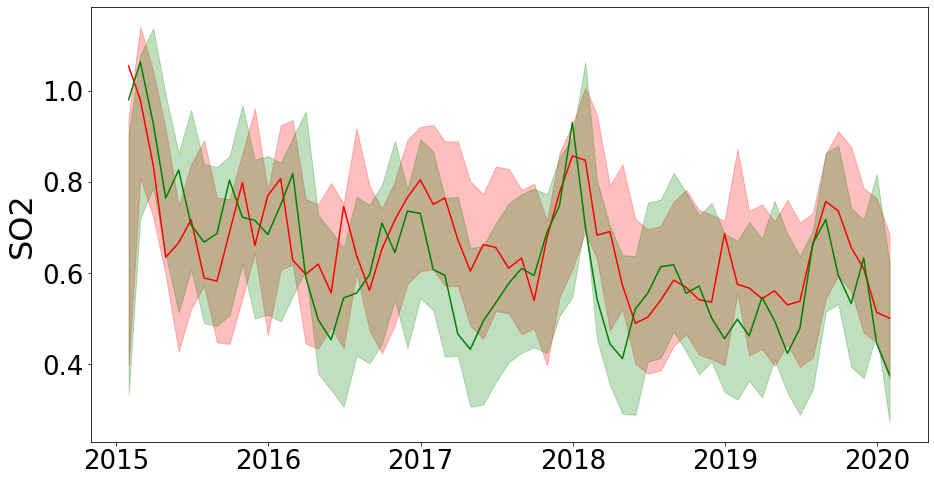

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

so2 = pd.read_csv("/content/drive/My Drive/COVID19_Cities/Data/so2_timeseries_2015_2019/so2_time_0.csv")
for i in range(1,35): 
  so2 = so2.append(pd.read_csv("/content/drive/My Drive/COVID19_Cities/Data/so2_timeseries_2015_2019/so2_time_"+str(i)+".csv"), ignore_index=True)
so2 = so2.drop('Unnamed: 0', axis=1)

rindex = [5]
region = ['', 'Northeast', 'Midwest', 'South', 'West', 'All Regions'] 
# print(rdata['type'].value_counts())

rdata = whole_data

so2type0 = so2[rdata[rdata['type'] == 0]['fips'].tolist()]
so2type0['date_gmt'] = so2['date_gmt']
groupedso2type0 = so2type0.groupby('date_gmt').mean()
groupedso2type0 = groupedso2type0.mean(axis=1)

so2type1 = so2[rdata[rdata['type'] == 1]['fips'].tolist()]
so2type1['date_gmt'] = so2['date_gmt']
groupedso2type1 = so2type1.groupby('date_gmt').mean()
groupedso2type1 = groupedso2type1.mean(axis=1)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedso2type0.index)
avgclust['values'] = groupedso2type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Just an ARMA(p,q) model
model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
print(results1.summary())
epiact = avgclust
plt.figure(figsize = (15,8))
plt.plot(avgclust.index, avgclust['values'], color='red')
# plt.plot(results1.get_prediction().predicted_mean, color='red')
# print(results1.summary())
resultdf = results1.get_prediction(start=0).conf_int()

print('type0 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
print('type0 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
print('type0 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="red", 
                  alpha=0.25)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedso2type1.index)
avgclust['values'] = groupedso2type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Just an ARMA(p,q) model
model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
print(results1.summary())
epiact = avgclust
plt.plot(avgclust.index, avgclust['values'], color='green')
# plt.plot(results1.get_prediction().predicted_mean, color='orange')
# print(results1.summary())
resultdf = results1.get_prediction(start=0).conf_int()

print('type1 MAE:', metrics.mean_absolute_error(avgclust, results1.predict(start=0)))
print('type1 MSE:', metrics.mean_squared_error(avgclust, results1.predict(start=0)))
print('type1 RMSE:', np.sqrt(metrics.mean_absolute_error(avgclust, results1.predict(start=0))))

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="green", 
                  alpha=0.25)

plt.ylabel('SO2', fontsize = 32)
plt.tick_params(axis='both', labelsize = 26)

plt.savefig("arima_so2.svg", format="svg")
# files.download("arima_so2.svg")

plt.show()

In [ ]:
t = pd.DataFrame(groupedso2type0, columns=['SO2 ZoneA'])
t2 = pd.DataFrame(groupedso2type1, columns=['SO2 ZoneB'])
table = t.merge(t2, on='date_gmt')
table.to_csv('SO2_table.csv')